In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

# FORMULA 1 MSC CRUISES UNITED STATES GRAND PRIX 2025
The United States Grand Prix is a motor racing event that has been held on and off since 1908, when it was known as the American Grand Prize. The Grand Prix later became part of the Formula One World Championship. As of 2023, the Grand Prix has been held 52 times at ten different locations. Since 2012, it has been held every year at the Circuit of the Americas in Austin, Texas, except in 2020.
Source: Wikipedia

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='USA').query("circuit_short_name== 'Austin'")

meeting_key  session_key location                 date_start  \
5         1271         9878   Austin  2025-10-17T17:30:00+00:00   
6         1271         9879   Austin  2025-10-17T21:30:00+00:00   
7         1271         9883   Austin  2025-10-18T17:00:00+00:00   
8         1271         9884   Austin  2025-10-18T21:00:00+00:00   

                    date_end session_type       session_name  country_key  \
5  2025-10-17T18:30:00+00:00     Practice         Practice 1           19   
6  2025-10-17T22:14:00+00:00   Qualifying  Sprint Qualifying           19   
7  2025-10-18T18:00:00+00:00         Race             Sprint           19   
8  2025-10-18T22:00:00+00:00   Qualifying         Qualifying           19   

  country_code   country_name  circuit_key circuit_short_name gmt_offset  year  
5          USA  United States            9             Austin  -05:00:00  2025  
6          USA  United States            9             Austin  -05:00:00  2025  
7          USA  United States            9             Austin  -05:00:00  2025  
8          USA  United States            9             Austin  -05:00:00  2025

## Free Practice 1
### Obtain setup

In [4]:
practice = libraryDataF1.obtain_information('laps',session_key=9878)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9878)
drivers = libraryDataF1.obtain_information('drivers',session_key=9878)

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

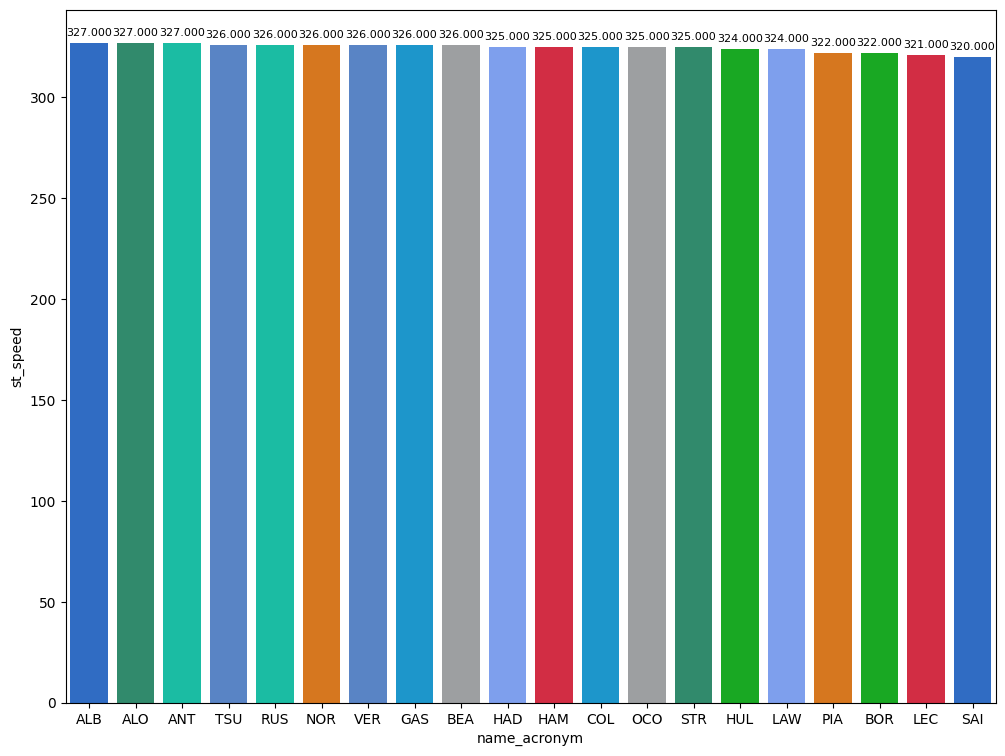

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

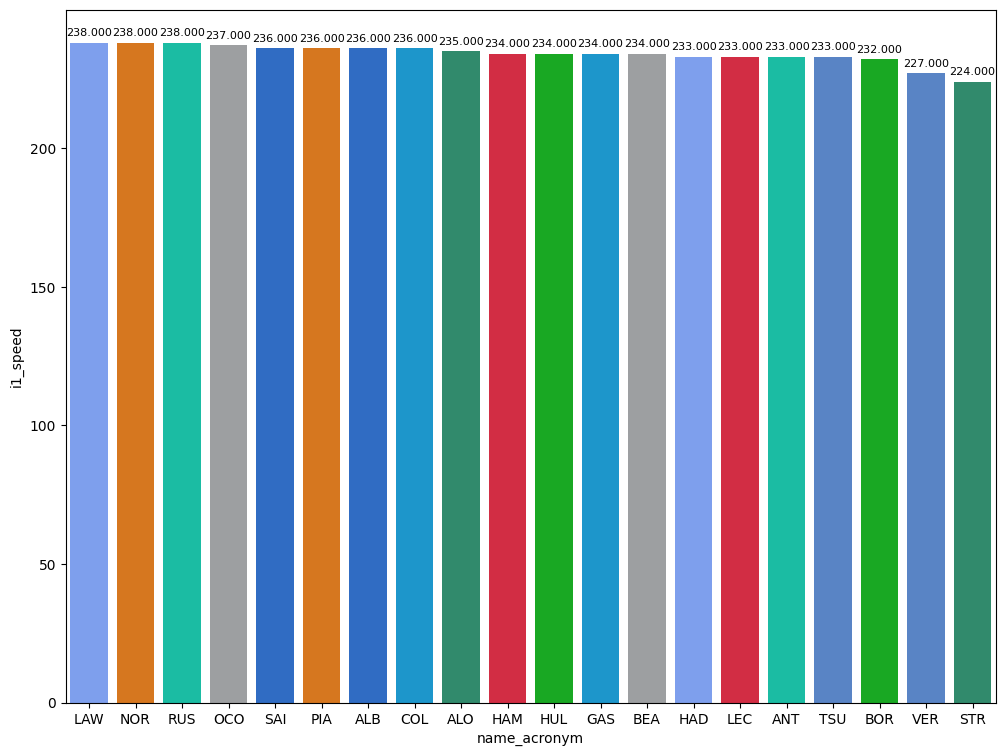

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

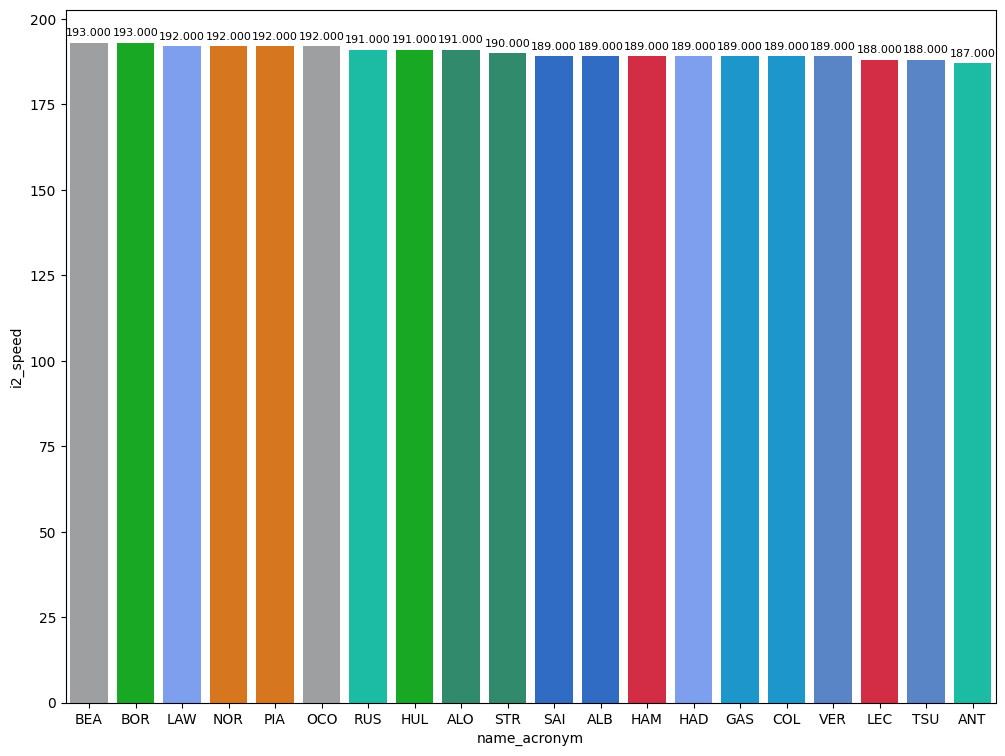

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [9]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
163  Lewis HAMILTON     HARD             25.395             38.151   
420  George RUSSELL   MEDIUM             25.502             37.648   
396    Lando NORRIS     SOFT             25.352             37.478   

     duration_sector_3  lap_duration  
163             31.311        94.857  
420             30.781        93.931  
396             30.464        93.294

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [10]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


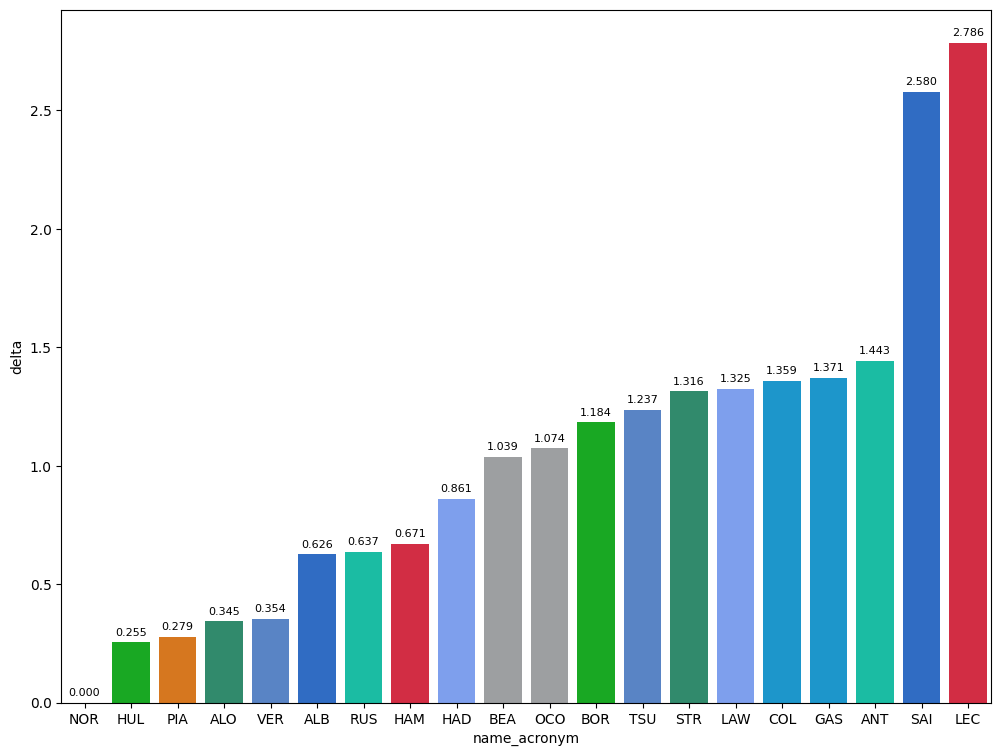

In [11]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

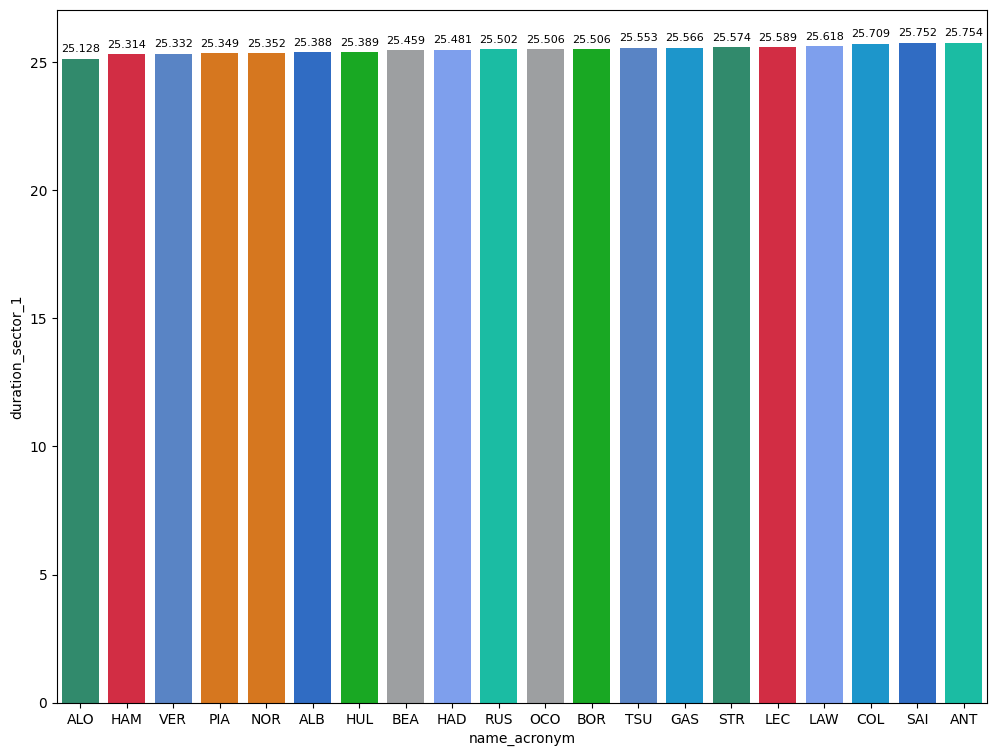

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

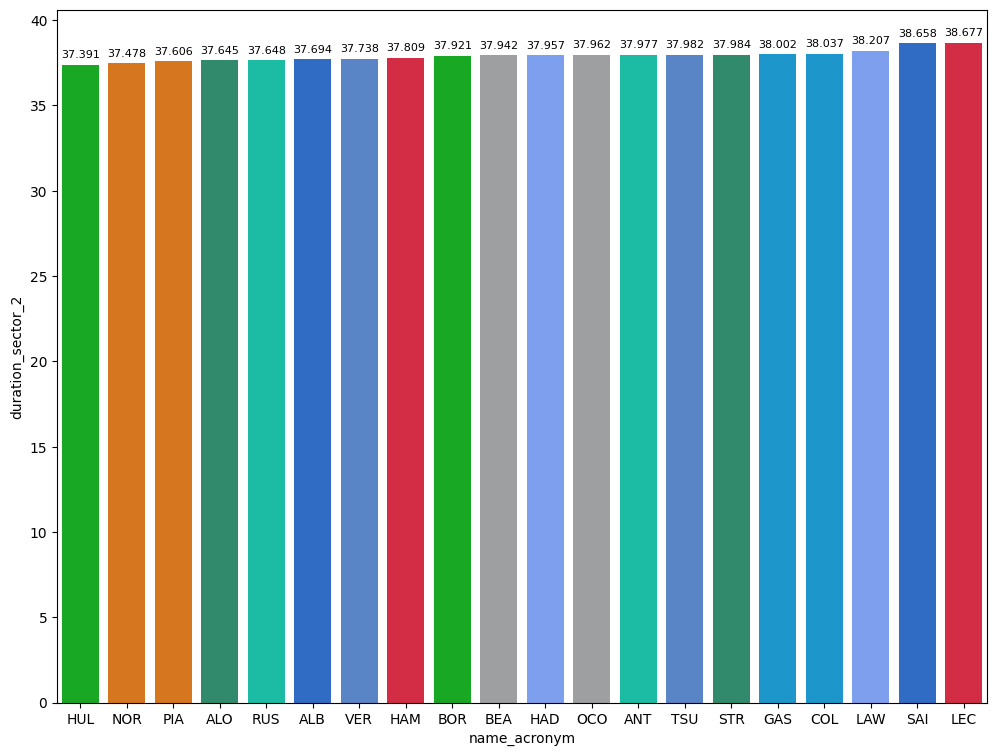

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

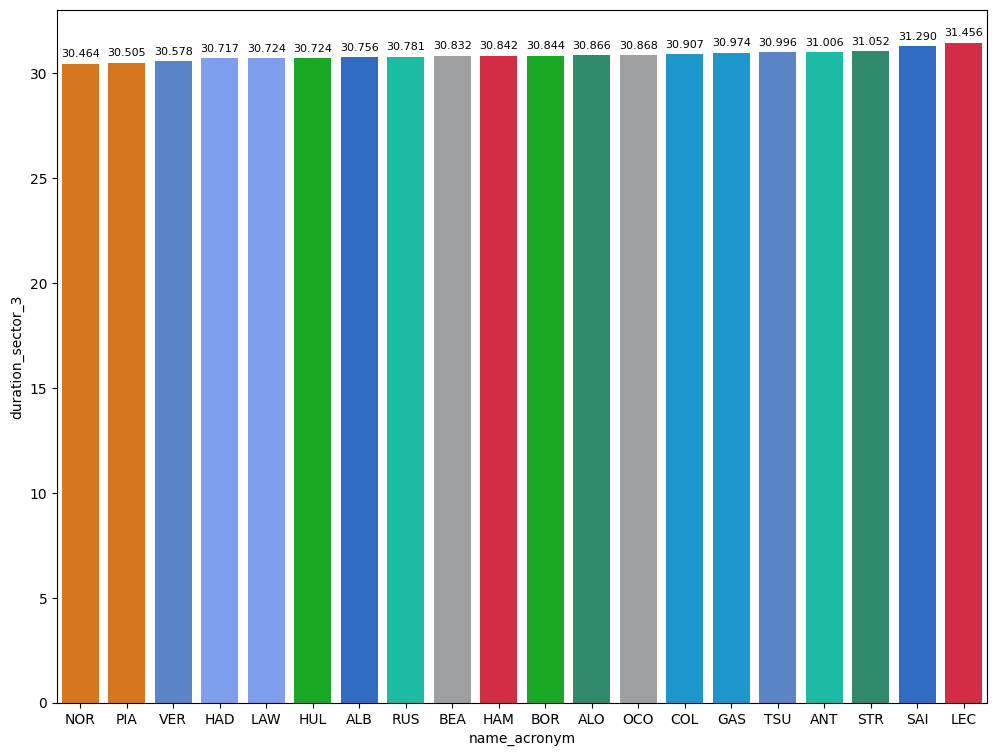

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [15]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 96 and lap_duration <=100").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
HARD          98.11993

### Long runs

In [16]:
MINIMUN_SECONDS = 96
MAXIMUM_SECONDS = 100

#### Red Bull Racing

In [17]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
12         1271         9878             1              1          1        9   
13         1271         9878             1             22          1        9   
30         1271         9878             2             22         10       17   
32         1271         9878             2              1         10       19   
56         1271         9878             3              1         20       26   
59         1271         9878             3             22         18       24   

   compound  tyre_age_at_start  
12     HARD                  0  
13     HARD                  0  
30     HARD                  9  
32     HARD                  9  
56     SOFT                  0  
59     SOFT                  0

In [18]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
20   Max VERSTAPPEN     HARD  2025-10-17T17:31:52.364000+00:00           2   
62   Max VERSTAPPEN     HARD  2025-10-17T17:36:17.905000+00:00           4   
196  Max VERSTAPPEN     HARD  2025-10-17T17:57:42.821000+00:00          11   
244  Max VERSTAPPEN     HARD  2025-10-17T18:02:48.151000+00:00          14   
260  Max VERSTAPPEN     HARD  2025-10-17T18:04:27.828000+00:00          15   
277  Max VERSTAPPEN     HARD  2025-10-17T18:06:07.349000+00:00          16   
294  Max VERSTAPPEN     HARD  2025-10-17T18:07:46.508000+00:00          17   
311  Max VERSTAPPEN     HARD  2025-10-17T18:09:25.366000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
20              26.655             40.054             32.088        98.797  
62              26.109             38.603             31.480        96.192  
196             27.041             40.071             32.712        99.824  
244             27.044             40.050             32.616        99.710  
260             26.788             40.085             32.558        99.431  
277             26.766             39.843             32.627        99.236  
294             26.742             39.720             32.421        98.883  
311             26.724             39.686             32.337        98.747

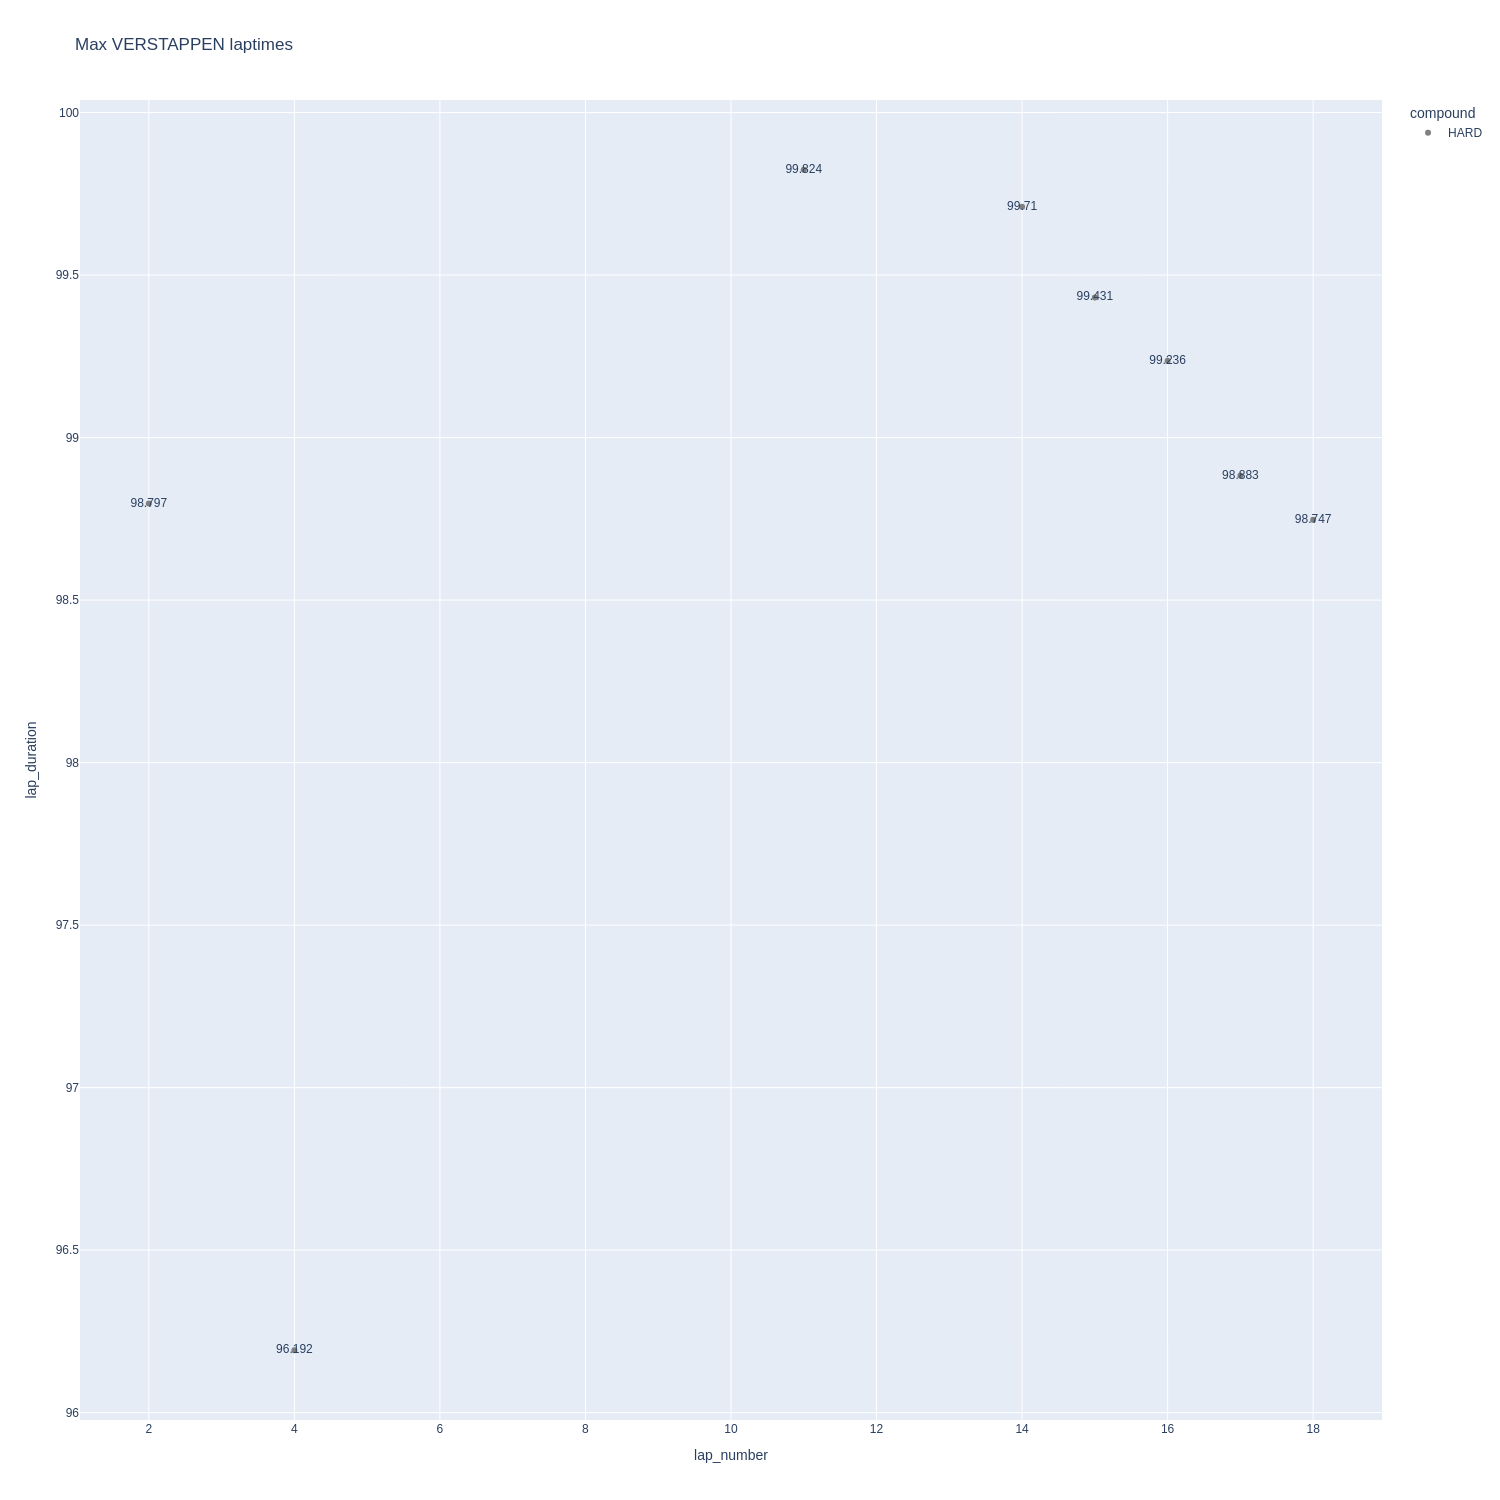

In [19]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

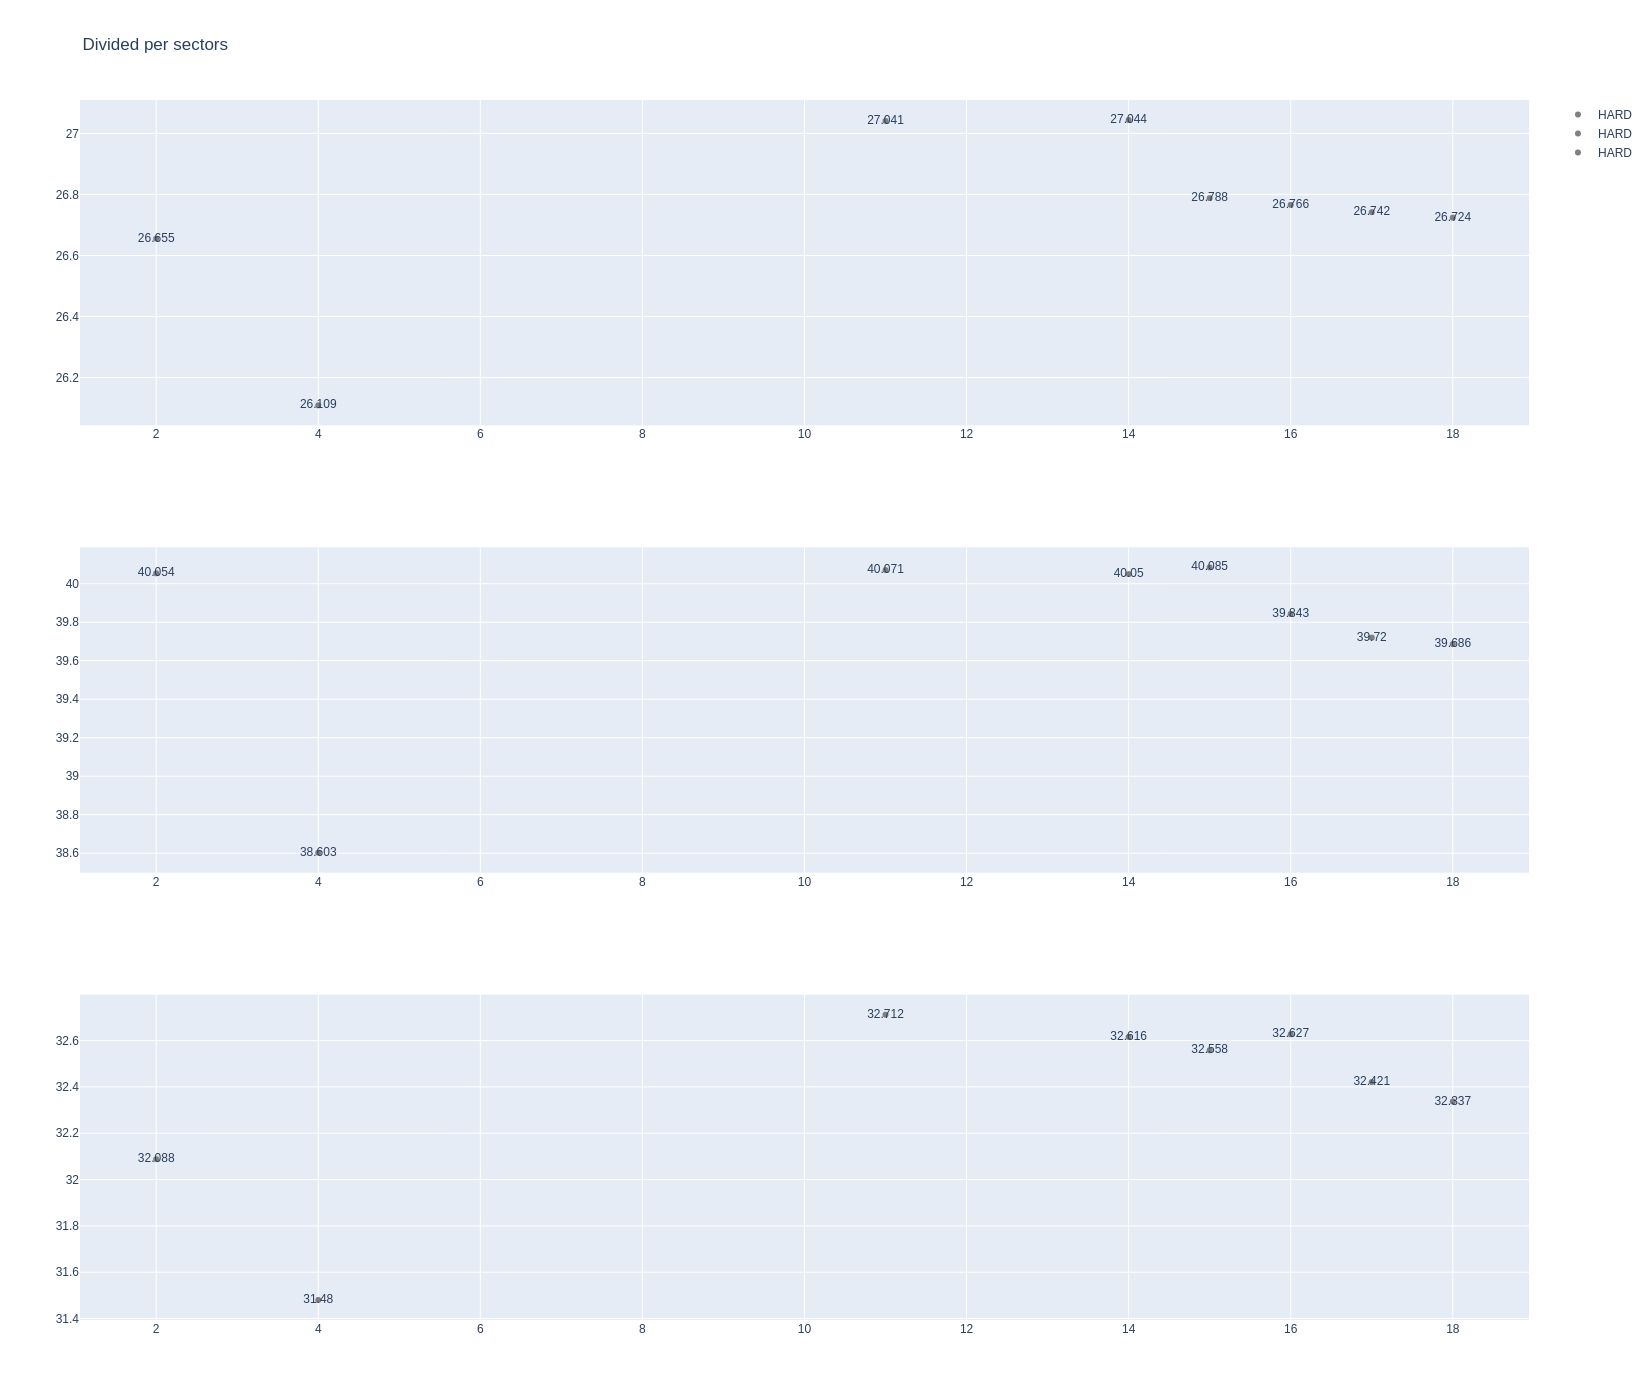

In [20]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [21]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
24   Yuki TSUNODA     HARD  2025-10-17T17:32:23.489000+00:00           2   
66   Yuki TSUNODA     HARD  2025-10-17T17:36:48.370000+00:00           4   
198  Yuki TSUNODA     HARD  2025-10-17T17:57:55.649000+00:00          11   
279  Yuki TSUNODA     HARD  2025-10-17T18:06:16.271000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              26.901             40.028             32.391        99.320  
66              25.986             38.751             31.777        96.514  
198             27.001             40.337             32.637        99.975  
279             26.801             40.132             32.745        99.678

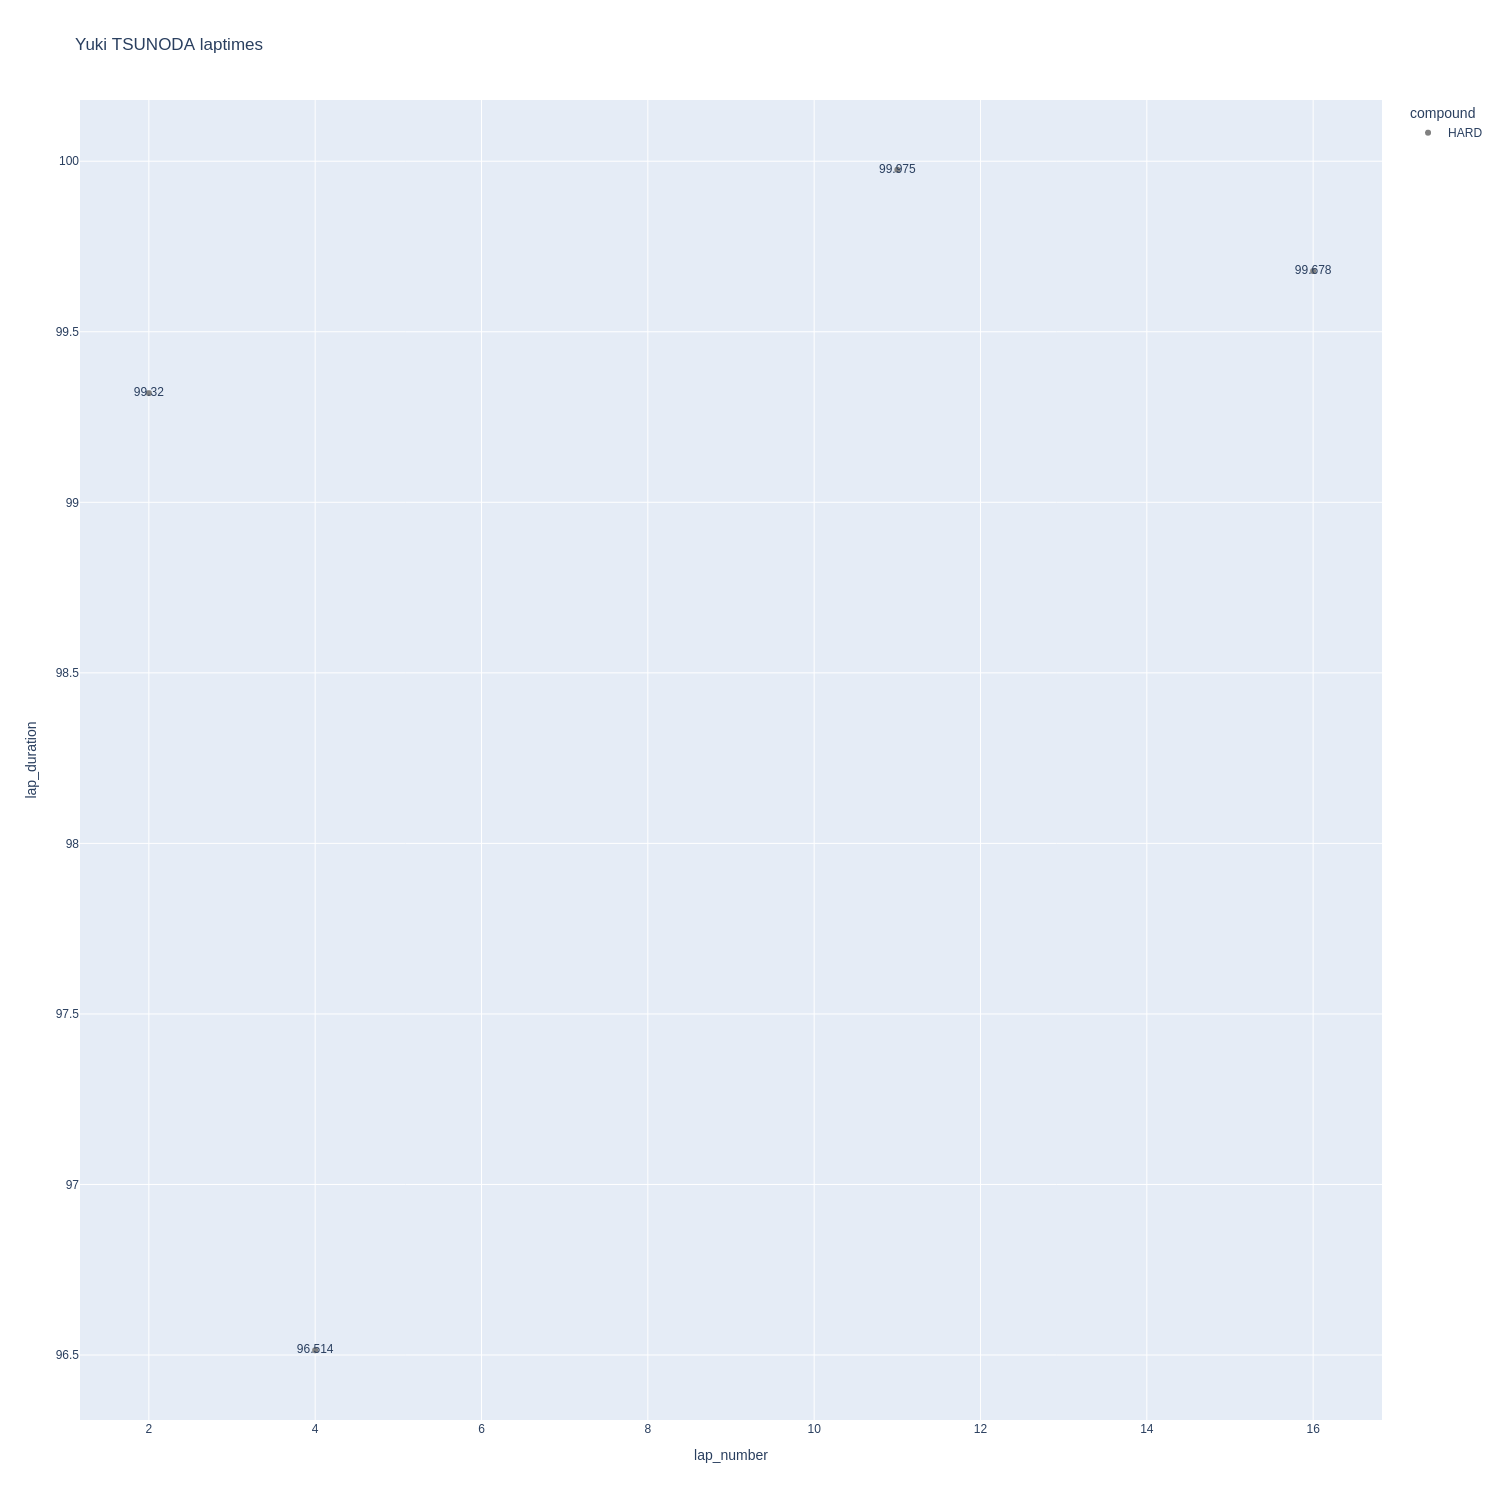

In [22]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

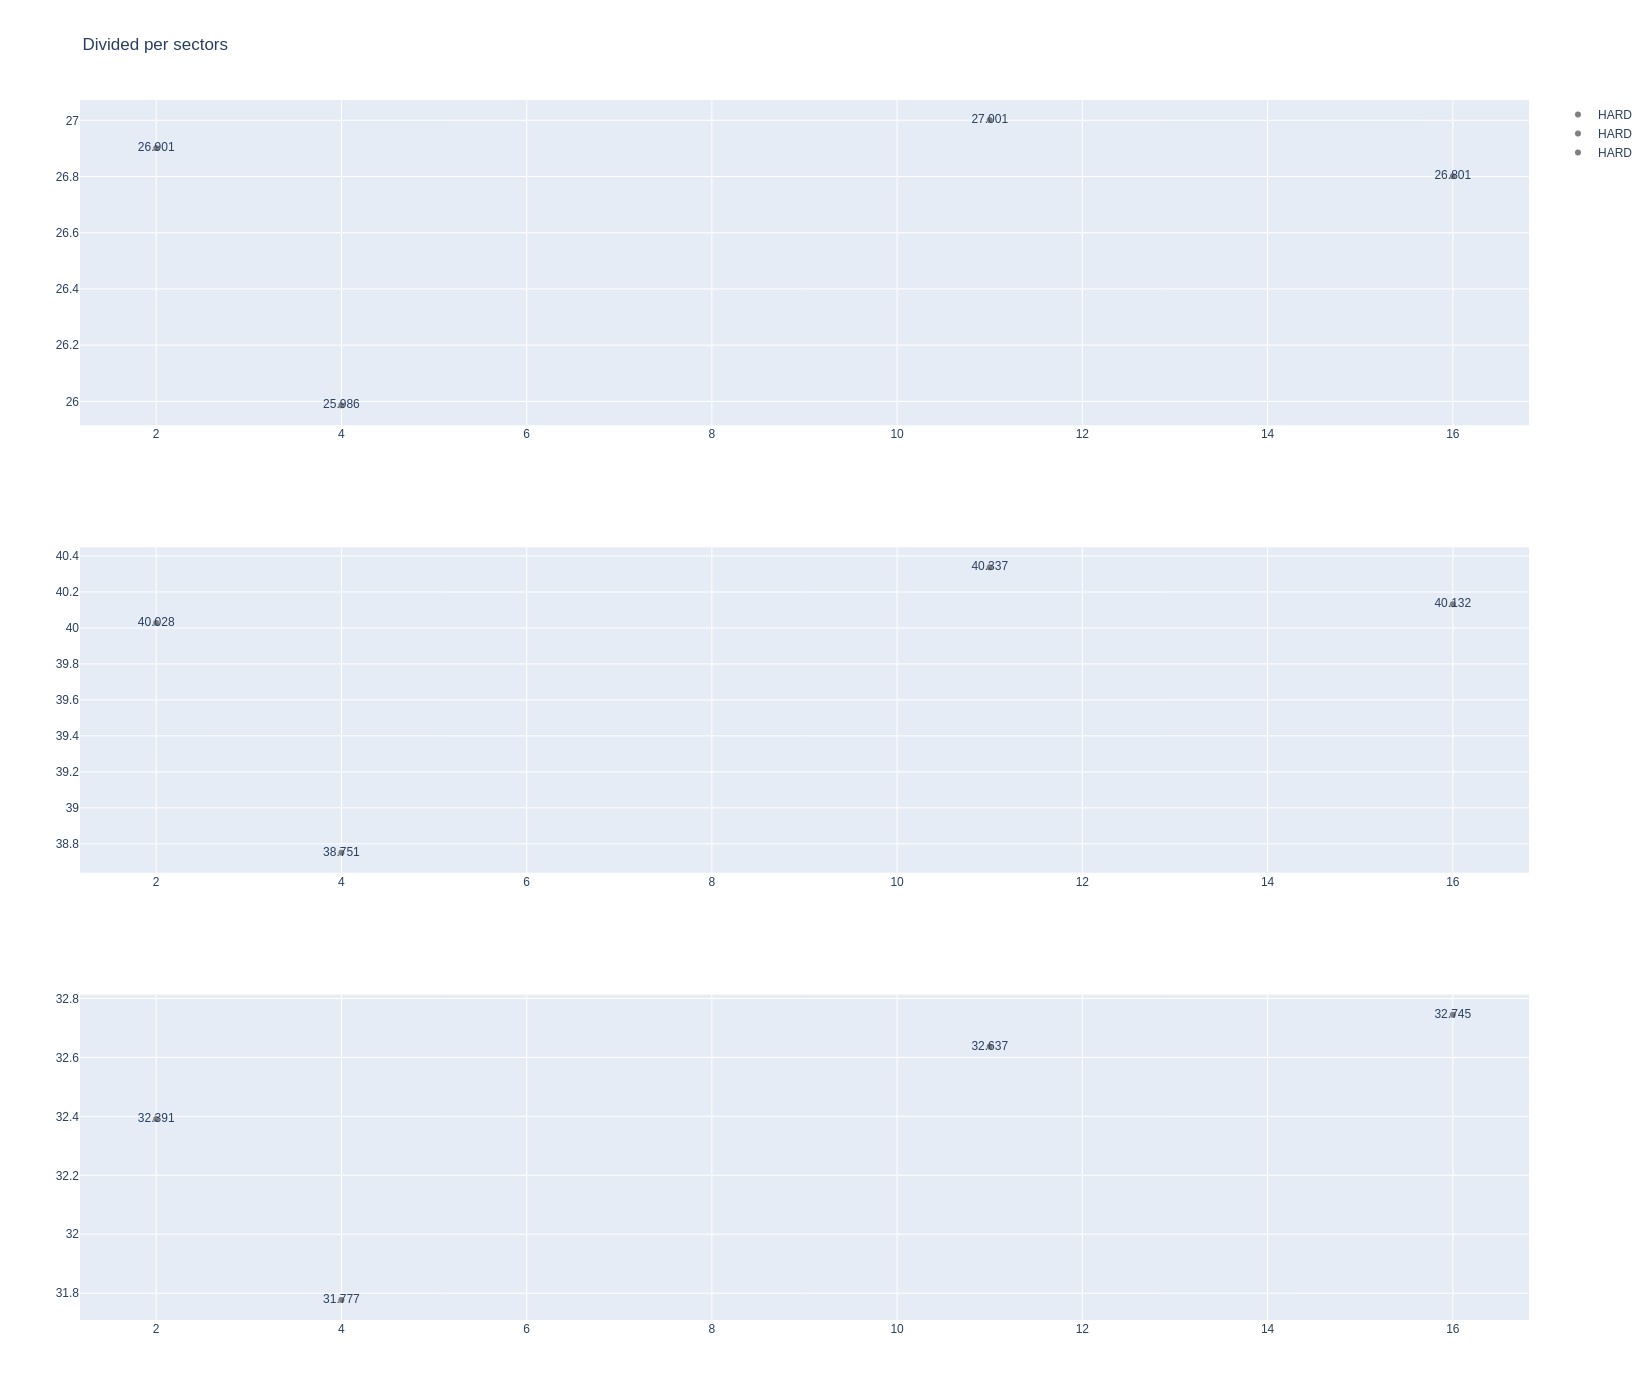

In [23]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [24]:
stintInformation.query('driver_number == 44 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
2          1271         9878             1             16          1        2   
22         1271         9878             1             44          1       10   
23         1271         9878             2             16          3        9   
35         1271         9878             3             16         10       17   
36         1271         9878             4             16         18       18   
38         1271         9878             2             44         11       18   
57         1271         9878             3             44         19       25   

   compound  tyre_age_at_start  
2      HARD                  0  
22     HARD                  0  
23     HARD                  2  
35     HARD                  9  
36   MEDIUM                  0  
38     HARD                  0  
57   MEDIUM                  0

In [25]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
79   Charles LECLERC     HARD  2025-10-17T17:37:57.198000+00:00           4   
136  Charles LECLERC     HARD  2025-10-17T17:44:20.999000+00:00           7   
259  Charles LECLERC     HARD  2025-10-17T18:04:26.859000+00:00          12   
298  Charles LECLERC     HARD  2025-10-17T18:08:07.569000+00:00          14   
315  Charles LECLERC     HARD  2025-10-17T18:09:44.903000+00:00          15   
330  Charles LECLERC     HARD  2025-10-17T18:11:22.730000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
79              26.032             39.123             31.811        96.966  
136             25.947             38.677             31.456        96.080  
259             25.677             38.814             31.591        96.082  
298             26.216             39.284             31.905        97.405  
315             26.347             39.456             32.020        97.823  
330             26.171             39.852             32.160        98.183

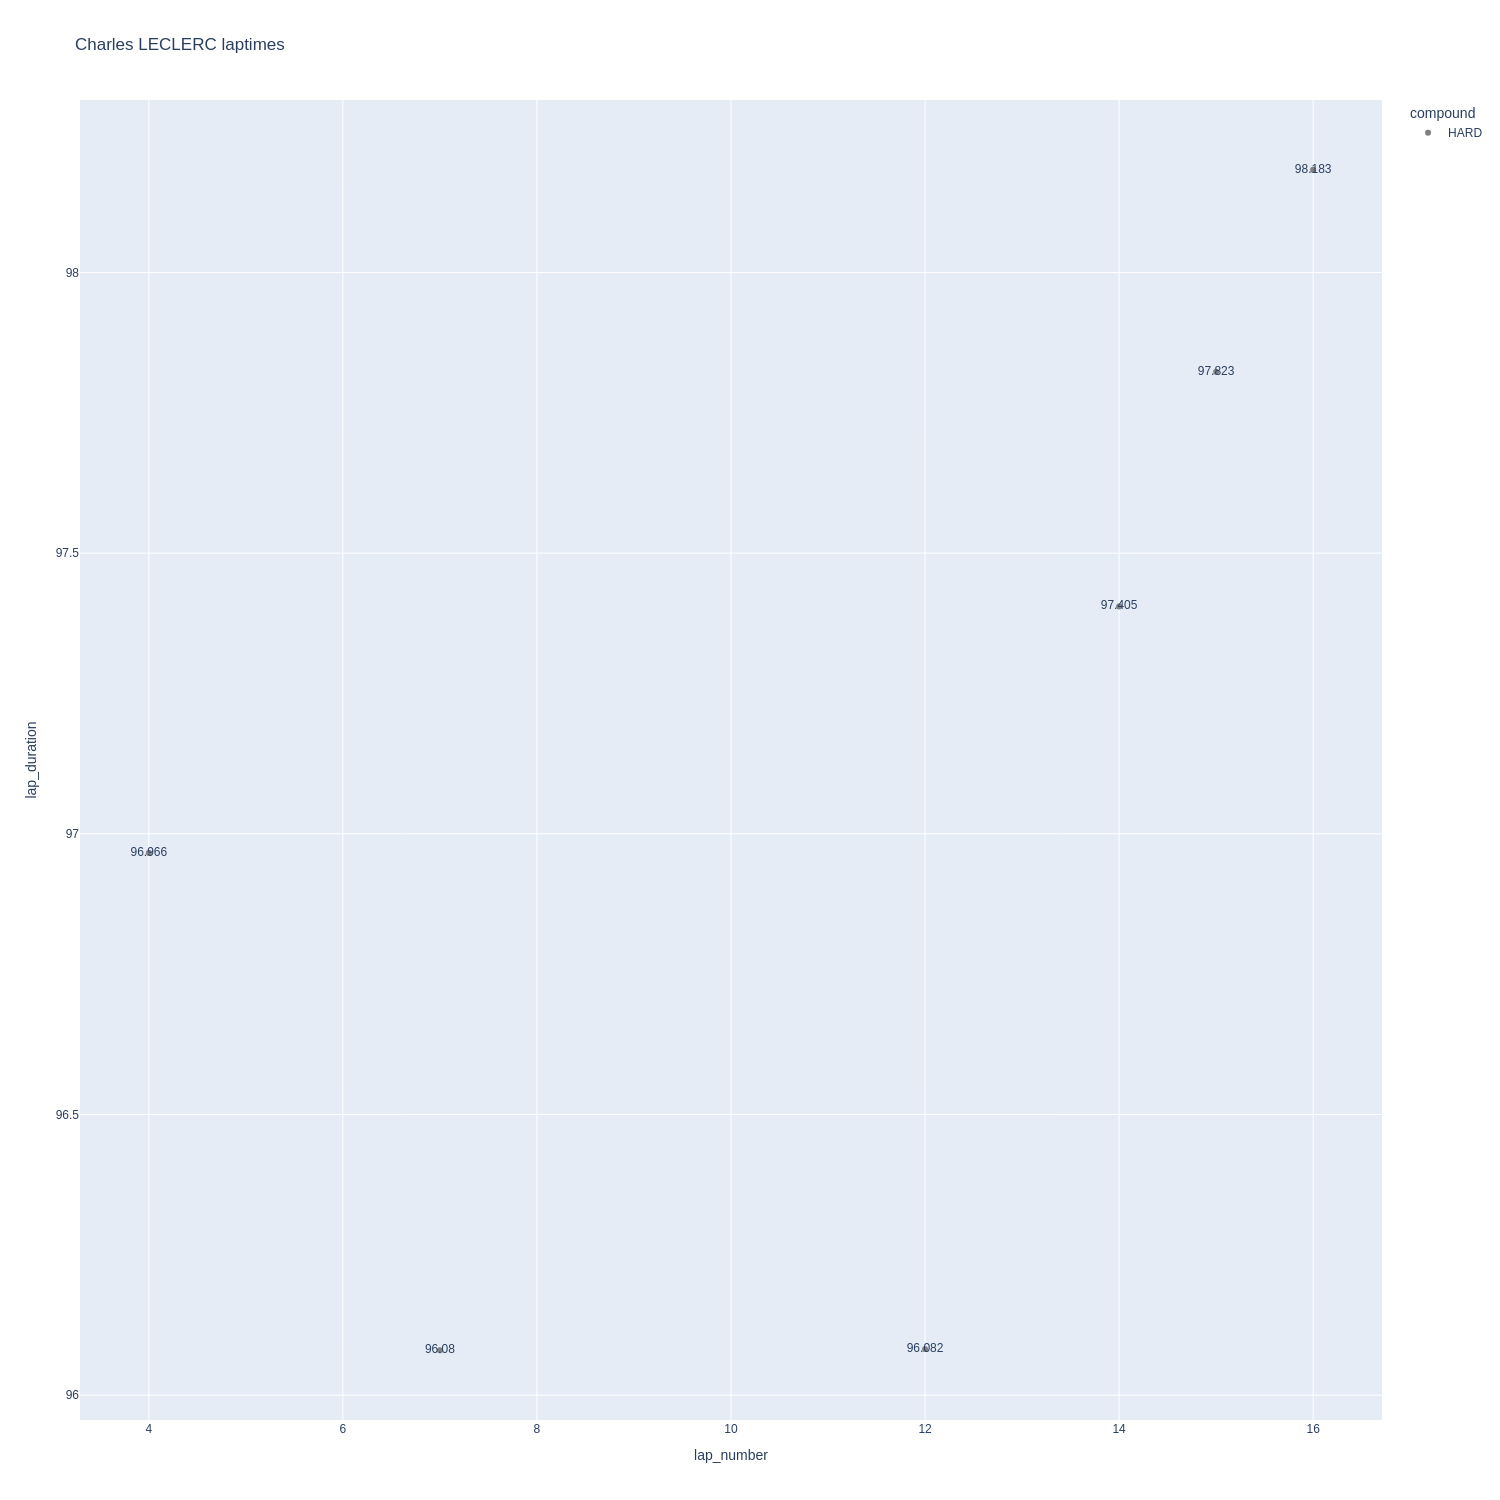

In [26]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

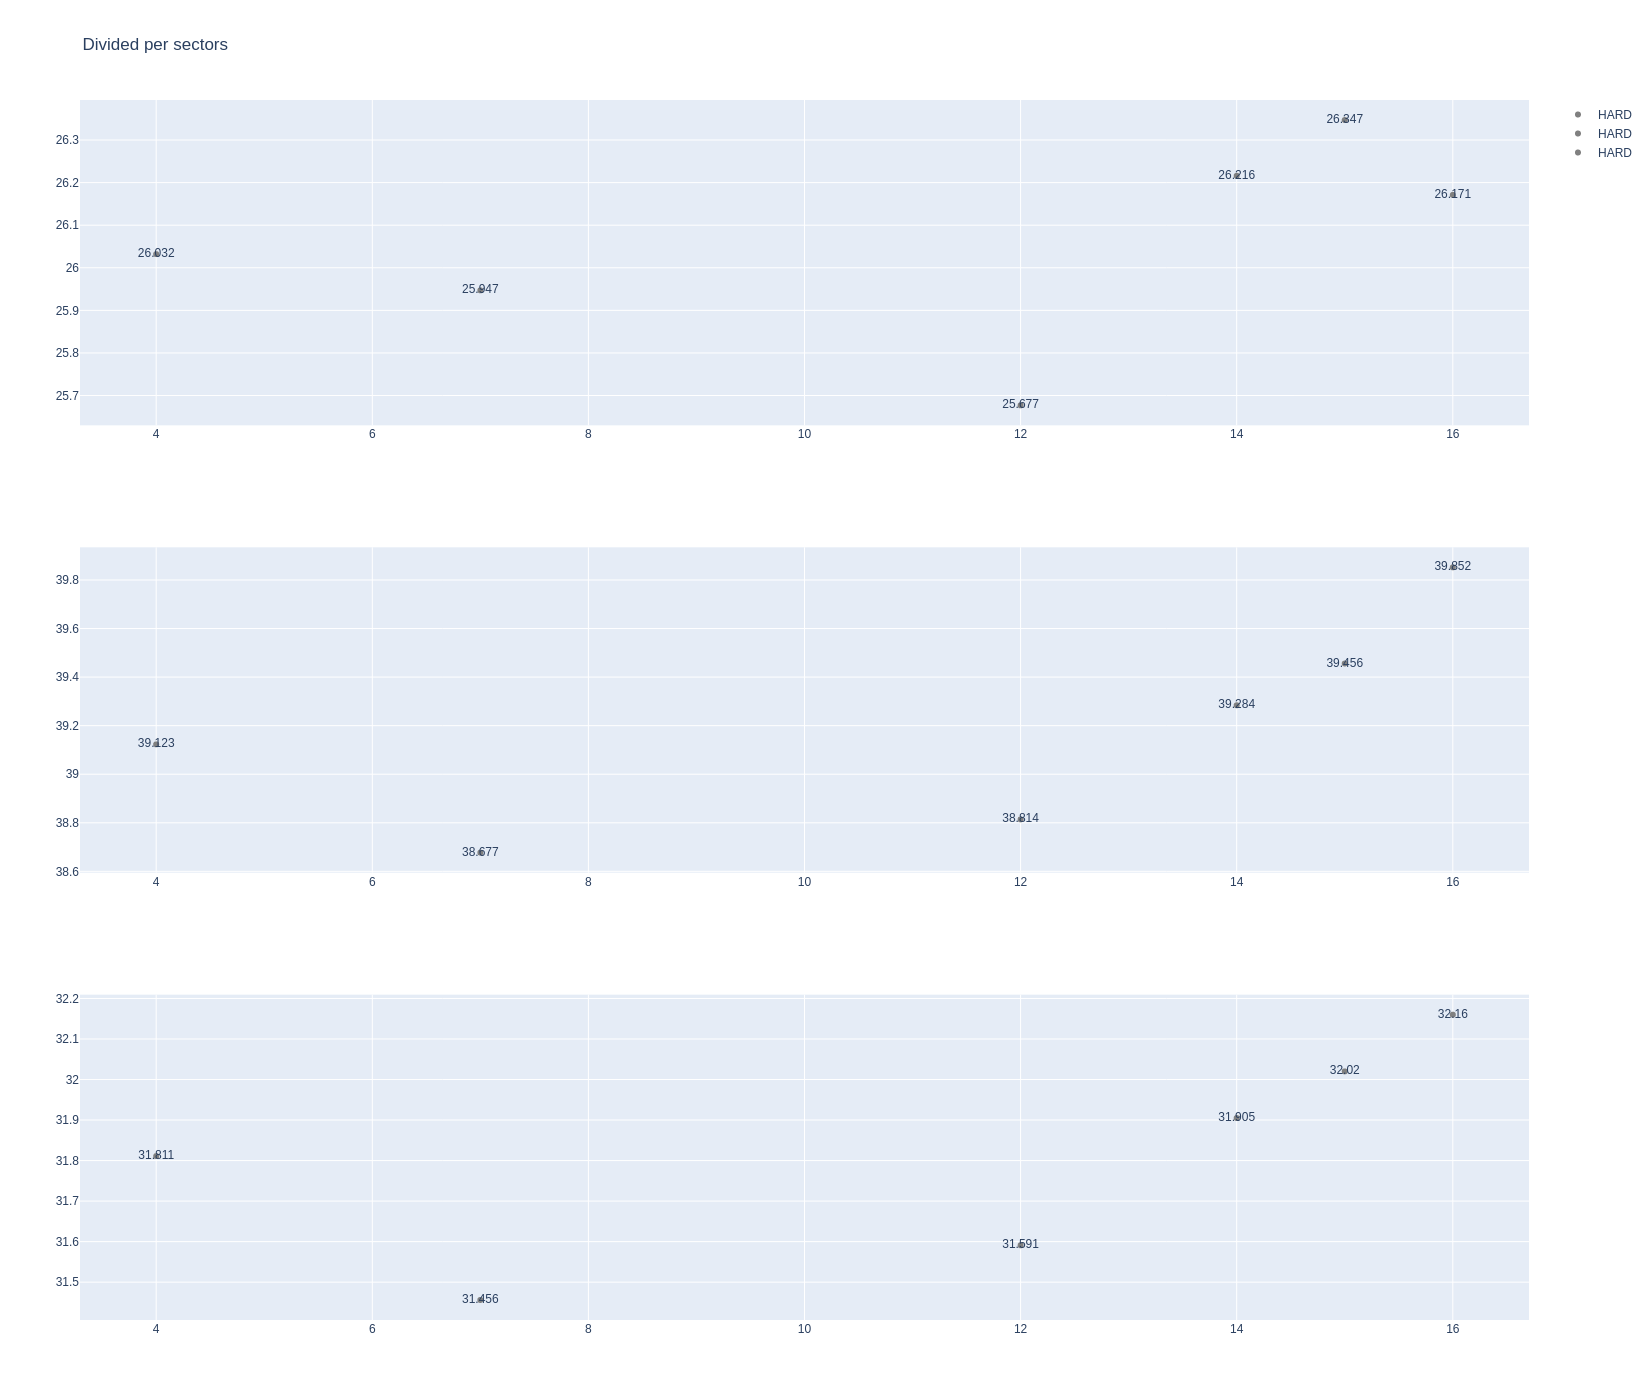

In [27]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [28]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
48   Lewis HAMILTON     HARD  2025-10-17T17:34:36.009000+00:00           3   
89   Lewis HAMILTON     HARD  2025-10-17T17:38:58.780000+00:00           5   
284  Lewis HAMILTON     HARD  2025-10-17T18:06:50.184000+00:00          15   
301  Lewis HAMILTON     HARD  2025-10-17T18:08:27.882000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
48              26.217             38.687             31.762        96.666  
89              25.911             38.795             31.615        96.321  
284             26.446             38.965             32.235        97.646  
301             26.165             39.173             31.813        97.151

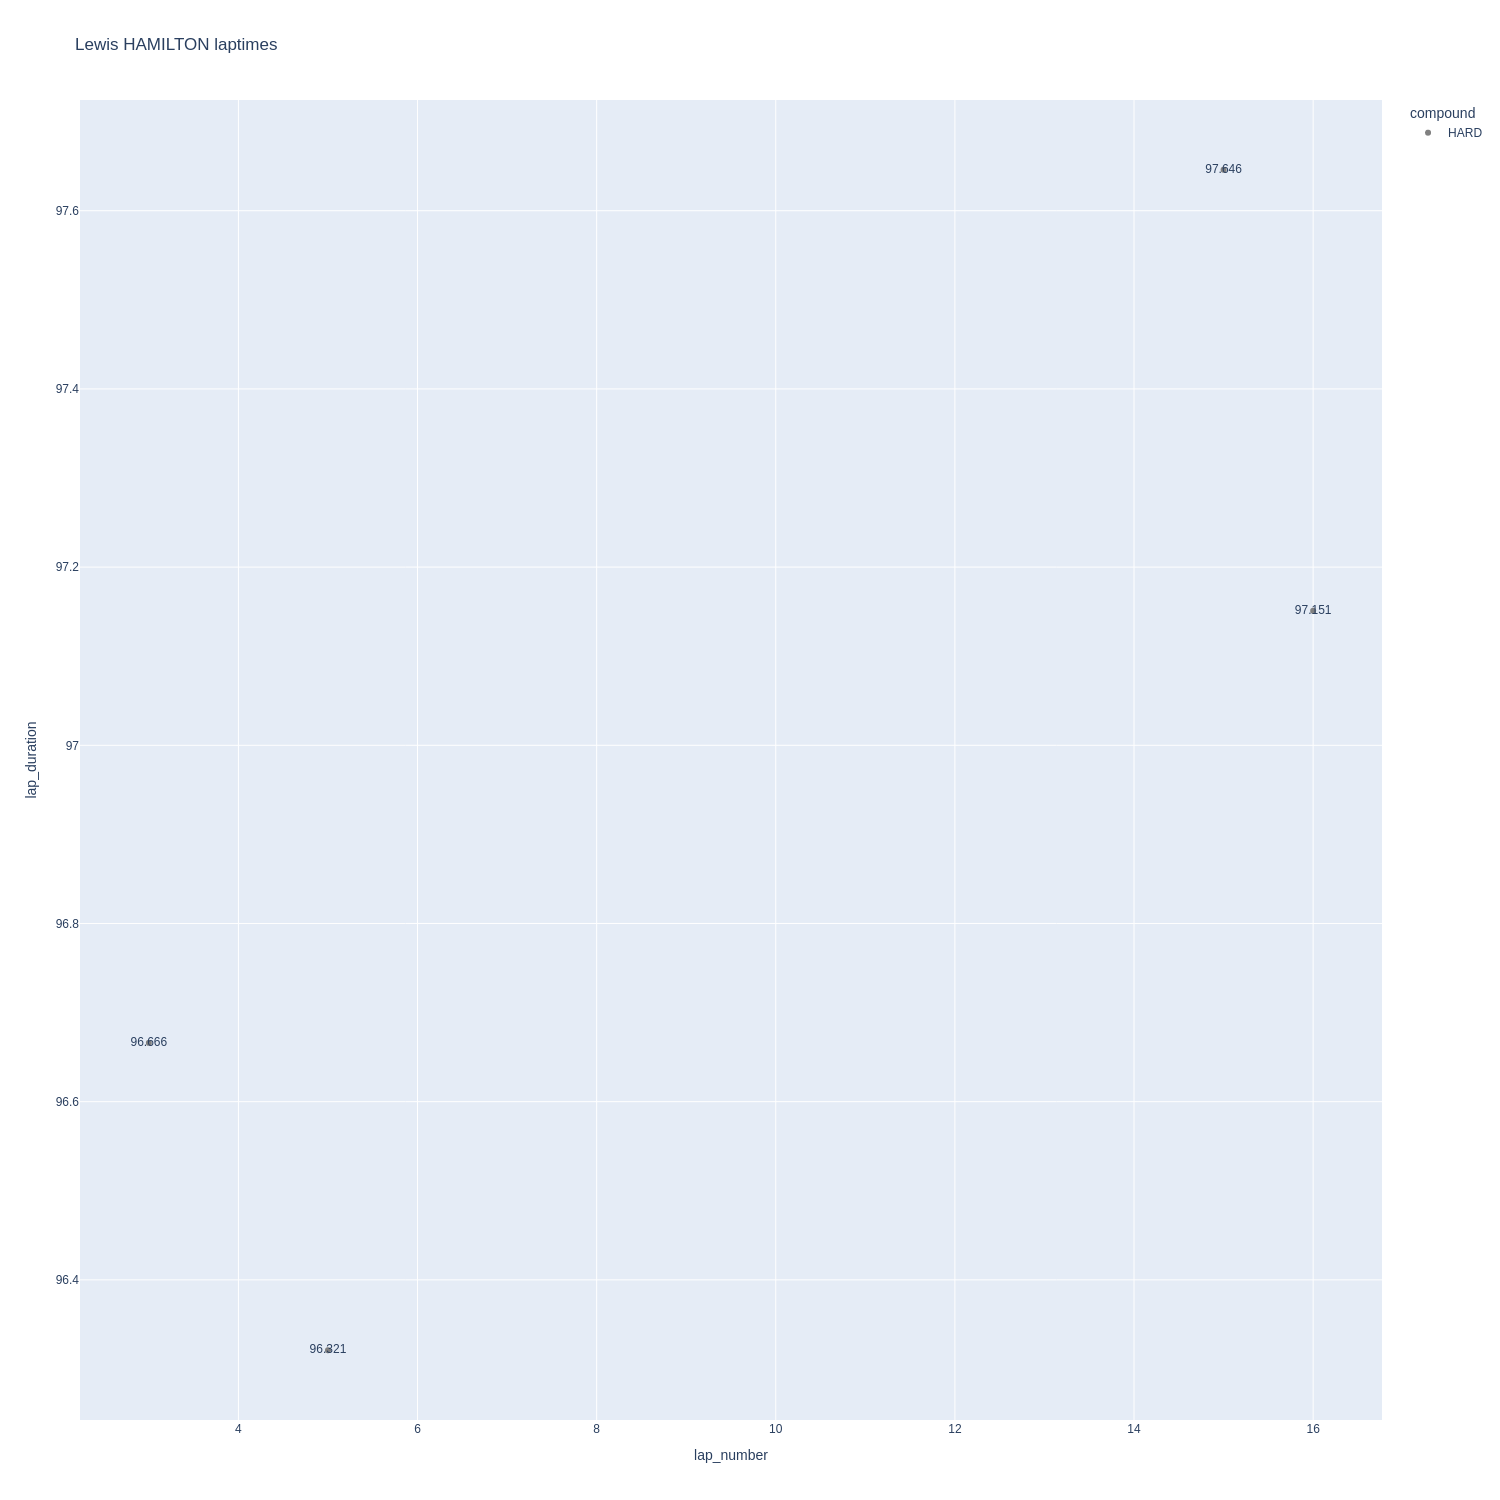

In [29]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

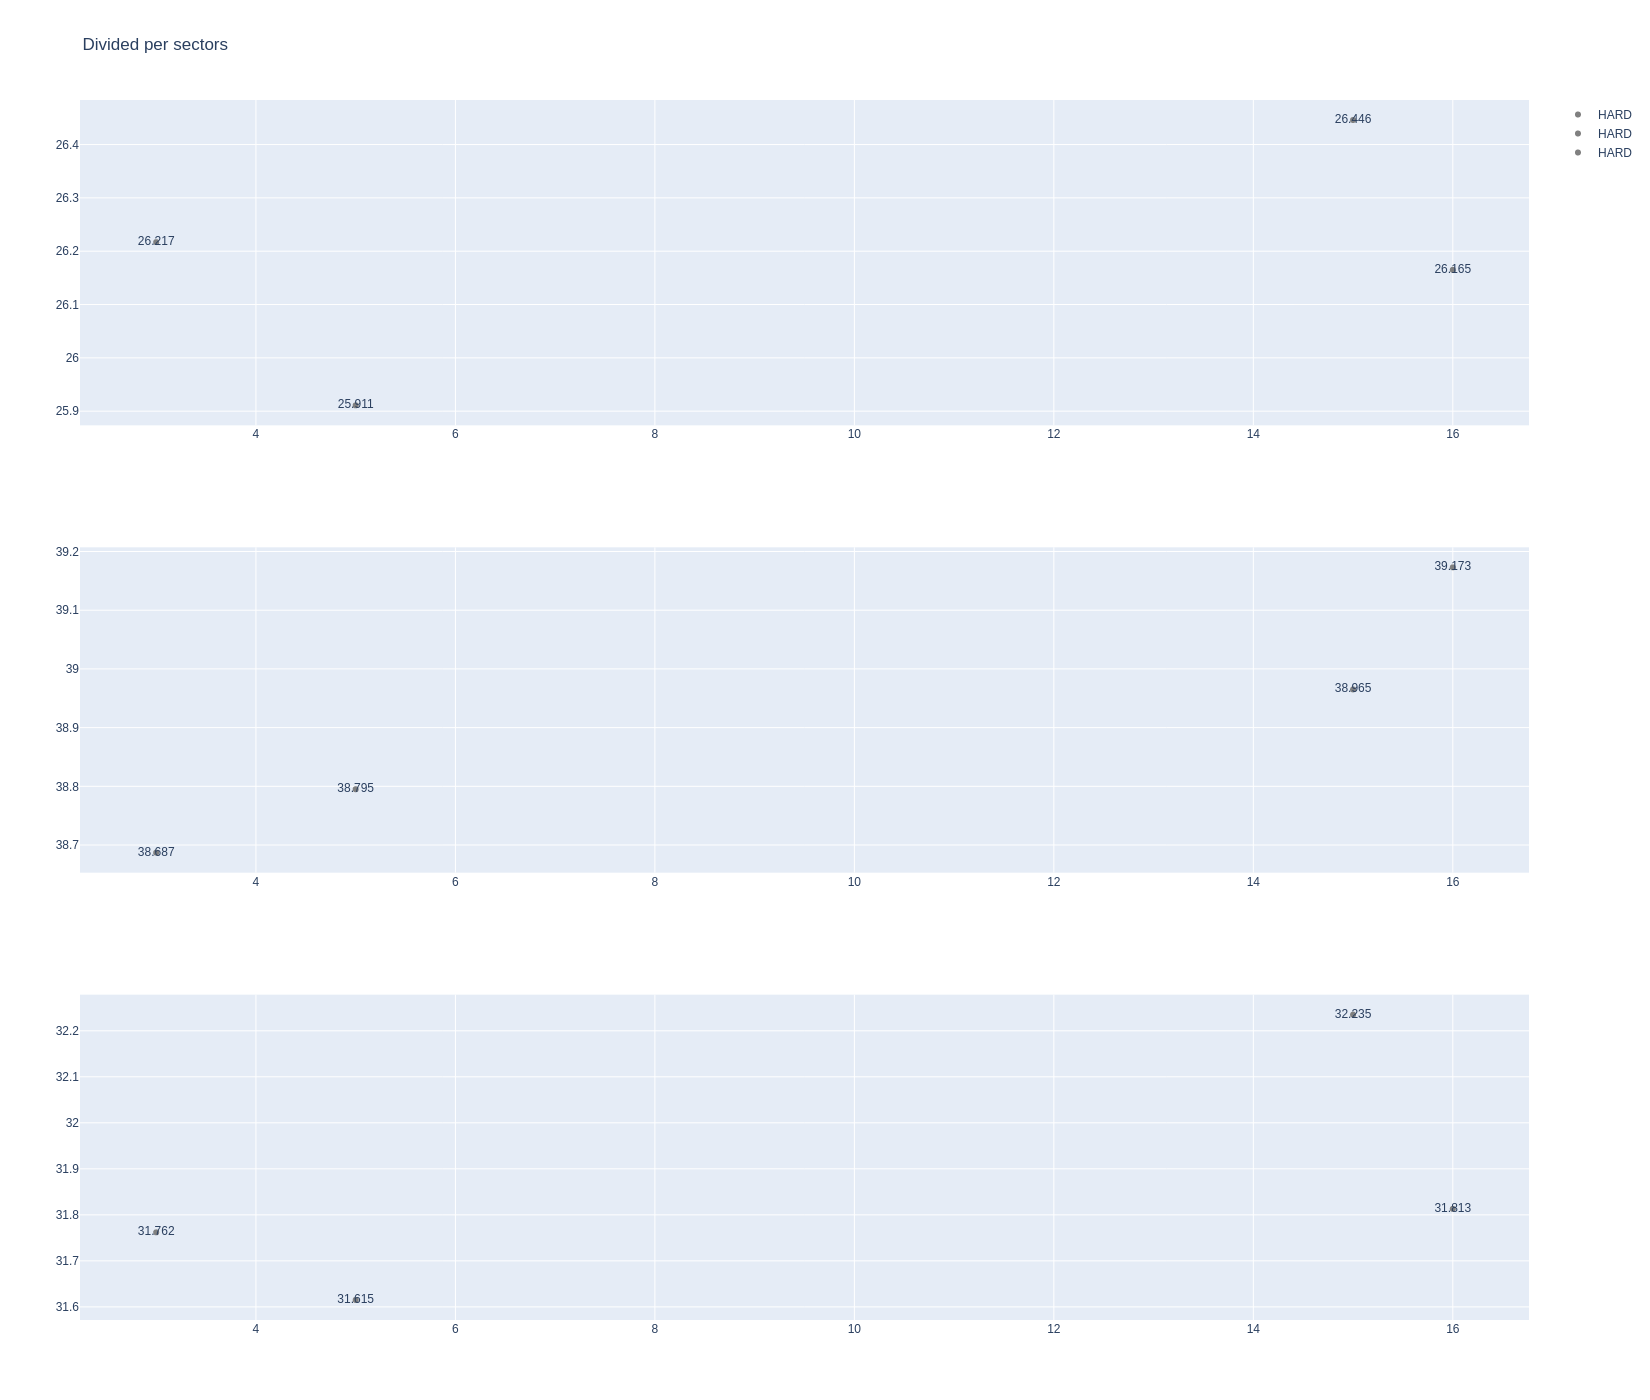

In [30]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [31]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1271         9878             1             63          1        5   
8          1271         9878             2             63          6        8   
11         1271         9878             1             12          1        9   
27         1271         9878             3             63          9       19   
33         1271         9878             2             12         10       20   
47         1271         9878             3             12         21       22   
64         1271         9878             4             12         23       27   
68         1271         9878             4             63         20       27   

   compound  tyre_age_at_start  
3      HARD                  0  
8      HARD                  5  
11     HARD                  0  
27     HARD                  8  
33     HARD                  9  
47   MEDIUM                  0  
64   MEDIUM                  2  
68   MEDIUM                  0

In [32]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
74   Kimi ANTONELLI     HARD  2025-10-17T17:37:37.851000+00:00           4   
113  Kimi ANTONELLI     HARD  2025-10-17T17:41:51.721000+00:00           6   
151  Kimi ANTONELLI     HARD  2025-10-17T17:46:06.482000+00:00           8   
242  Kimi ANTONELLI     HARD  2025-10-17T18:02:41.333000+00:00          14   
257  Kimi ANTONELLI     HARD  2025-10-17T18:04:20.253000+00:00          15   
274  Kimi ANTONELLI     HARD  2025-10-17T18:05:59.099000+00:00          16   
292  Kimi ANTONELLI     HARD  2025-10-17T18:07:37.578000+00:00          17   
309  Kimi ANTONELLI     HARD  2025-10-17T18:09:16.282000+00:00          18   
325  Kimi ANTONELLI     HARD  2025-10-17T18:10:54.793000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
74              27.009             39.218             31.843        98.070  
113             26.414             39.025             31.504        96.943  
151             26.289             38.581             31.308        96.178  
242             26.965             39.773             32.678        99.416  
257             26.770             39.787             32.277        98.834  
274             26.548             39.744             32.294        98.586  
292             26.495             39.698             32.295        98.488  
309             26.556             39.833             32.295        98.684  
325             26.679             40.296             32.497        99.472

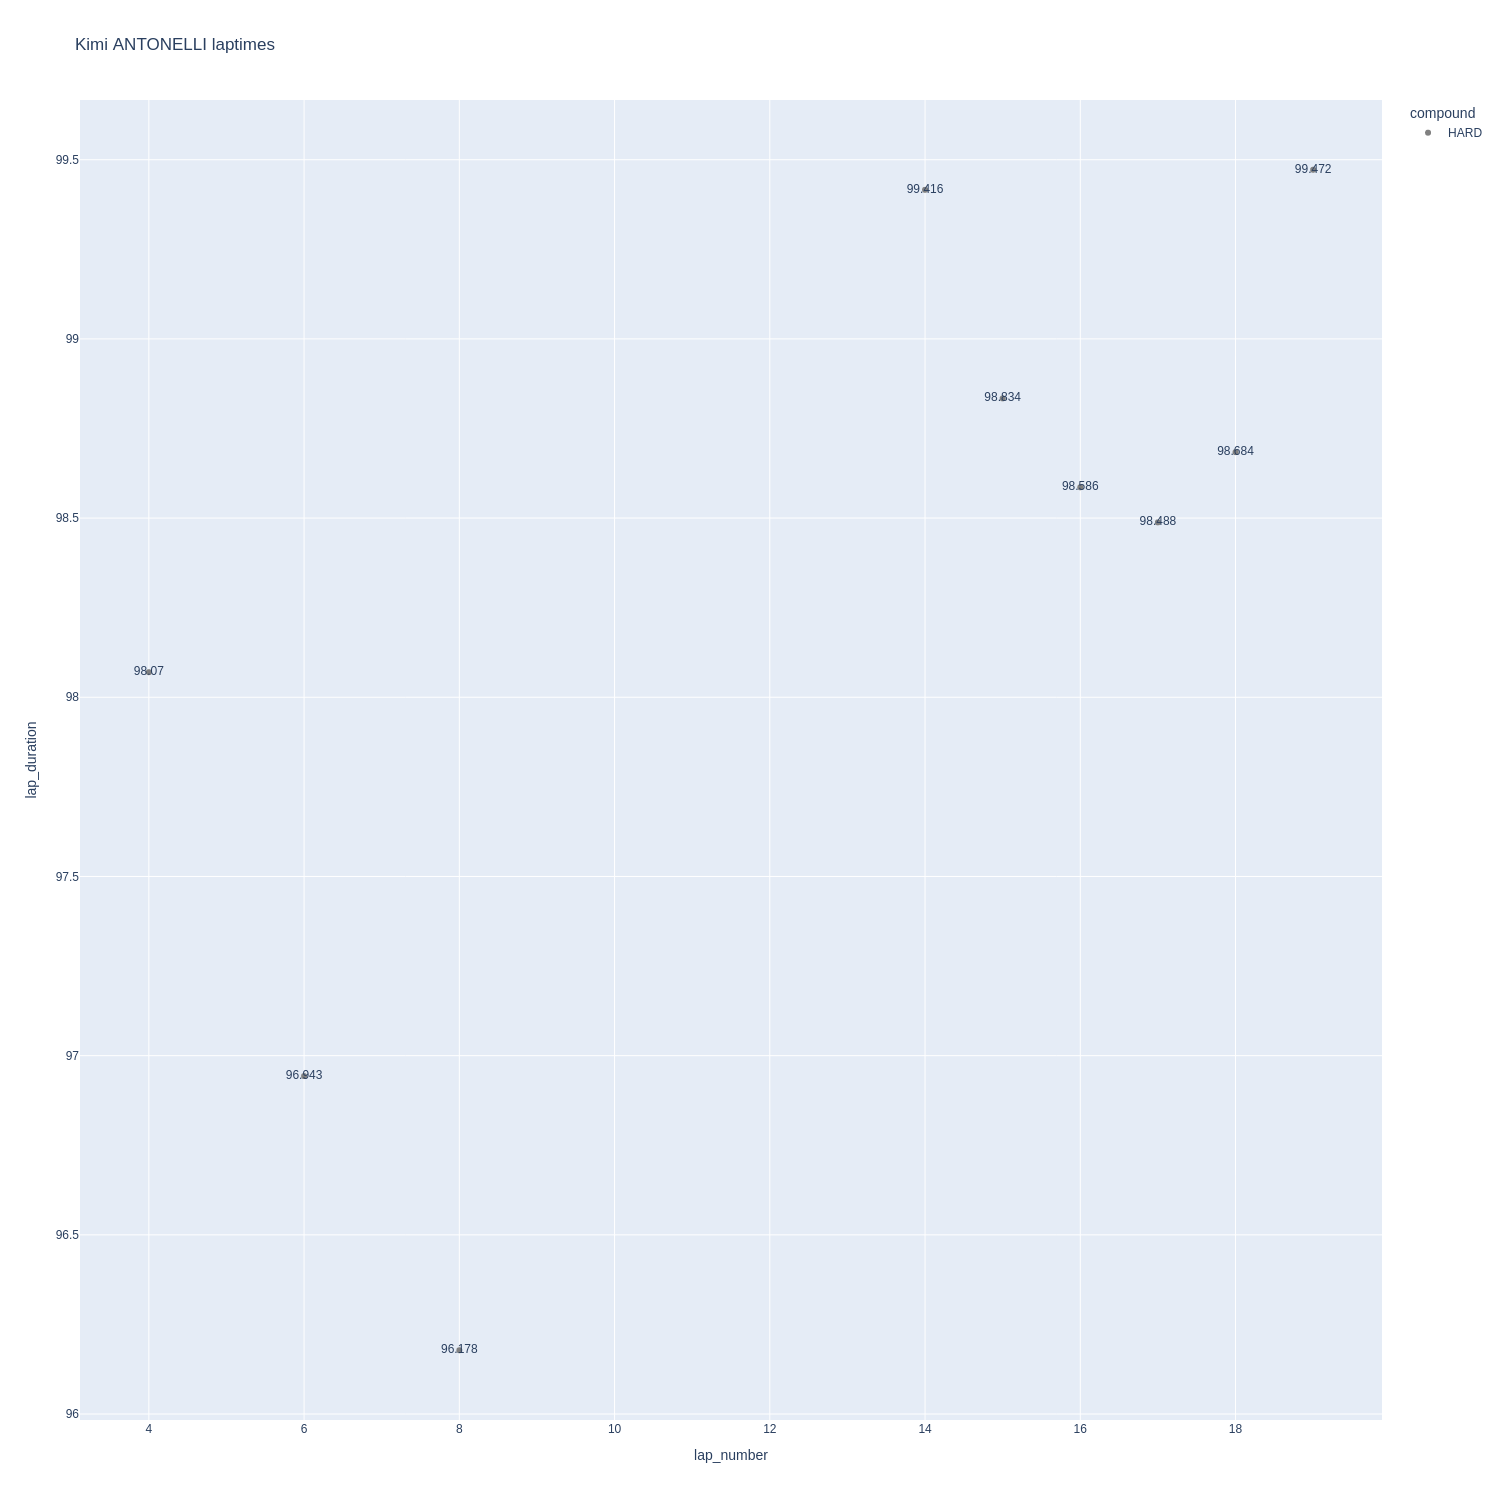

In [33]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

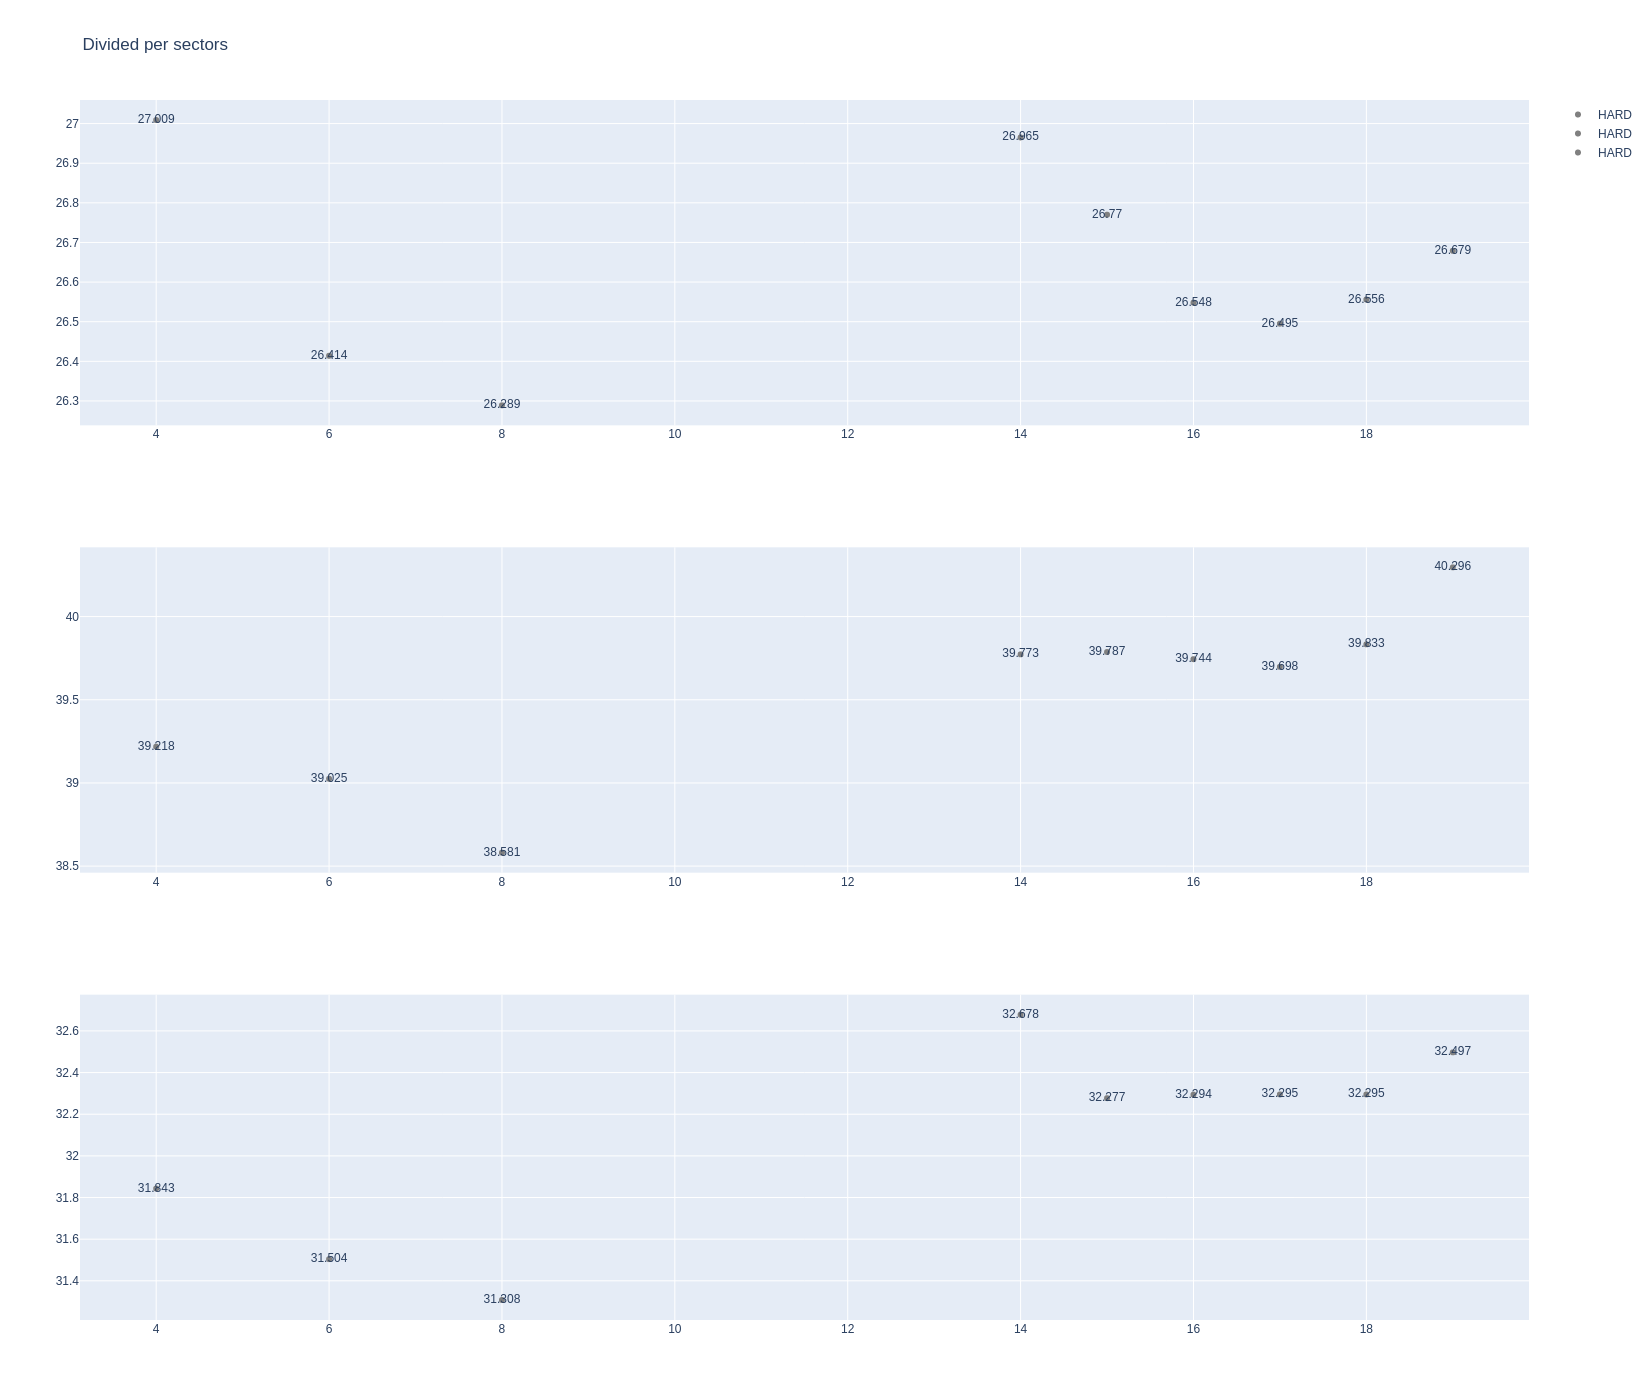

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [35]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
30   George RUSSELL     HARD  2025-10-17T17:33:09.024000+00:00           2   
69   George RUSSELL     HARD  2025-10-17T17:37:20.247000+00:00           4   
190  George RUSSELL     HARD  2025-10-17T17:57:08.253000+00:00          10   
204  George RUSSELL     HARD  2025-10-17T17:58:47.974000+00:00          11   
219  George RUSSELL     HARD  2025-10-17T18:00:26.565000+00:00          12   
236  George RUSSELL     HARD  2025-10-17T18:02:04.865000+00:00          13   
253  George RUSSELL     HARD  2025-10-17T18:03:42.499000+00:00          14   
269  George RUSSELL     HARD  2025-10-17T18:05:20.008000+00:00          15   
286  George RUSSELL     HARD  2025-10-17T18:06:57.778000+00:00          16   
303  George RUSSELL     HARD  2025-10-17T18:08:35.694000+00:00          17   
319  George RUSSELL     HARD  2025-10-17T18:10:13.571000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
30              26.574             39.497             32.021        98.092  
69              26.427             38.744             31.542        96.713  
190             27.215             39.864             32.674        99.753  
204             26.767             39.655             32.139        98.561  
219             26.637             39.503             32.202        98.342  
236             26.385             39.240             32.003        97.628  
253             26.312             39.231             31.909        97.452  
269             26.152             39.723             31.951        97.826  
286             26.194             39.383             32.381        97.958  
303             26.274             39.430             32.142        97.846  
319             26.285             39.702             32.269        98.256

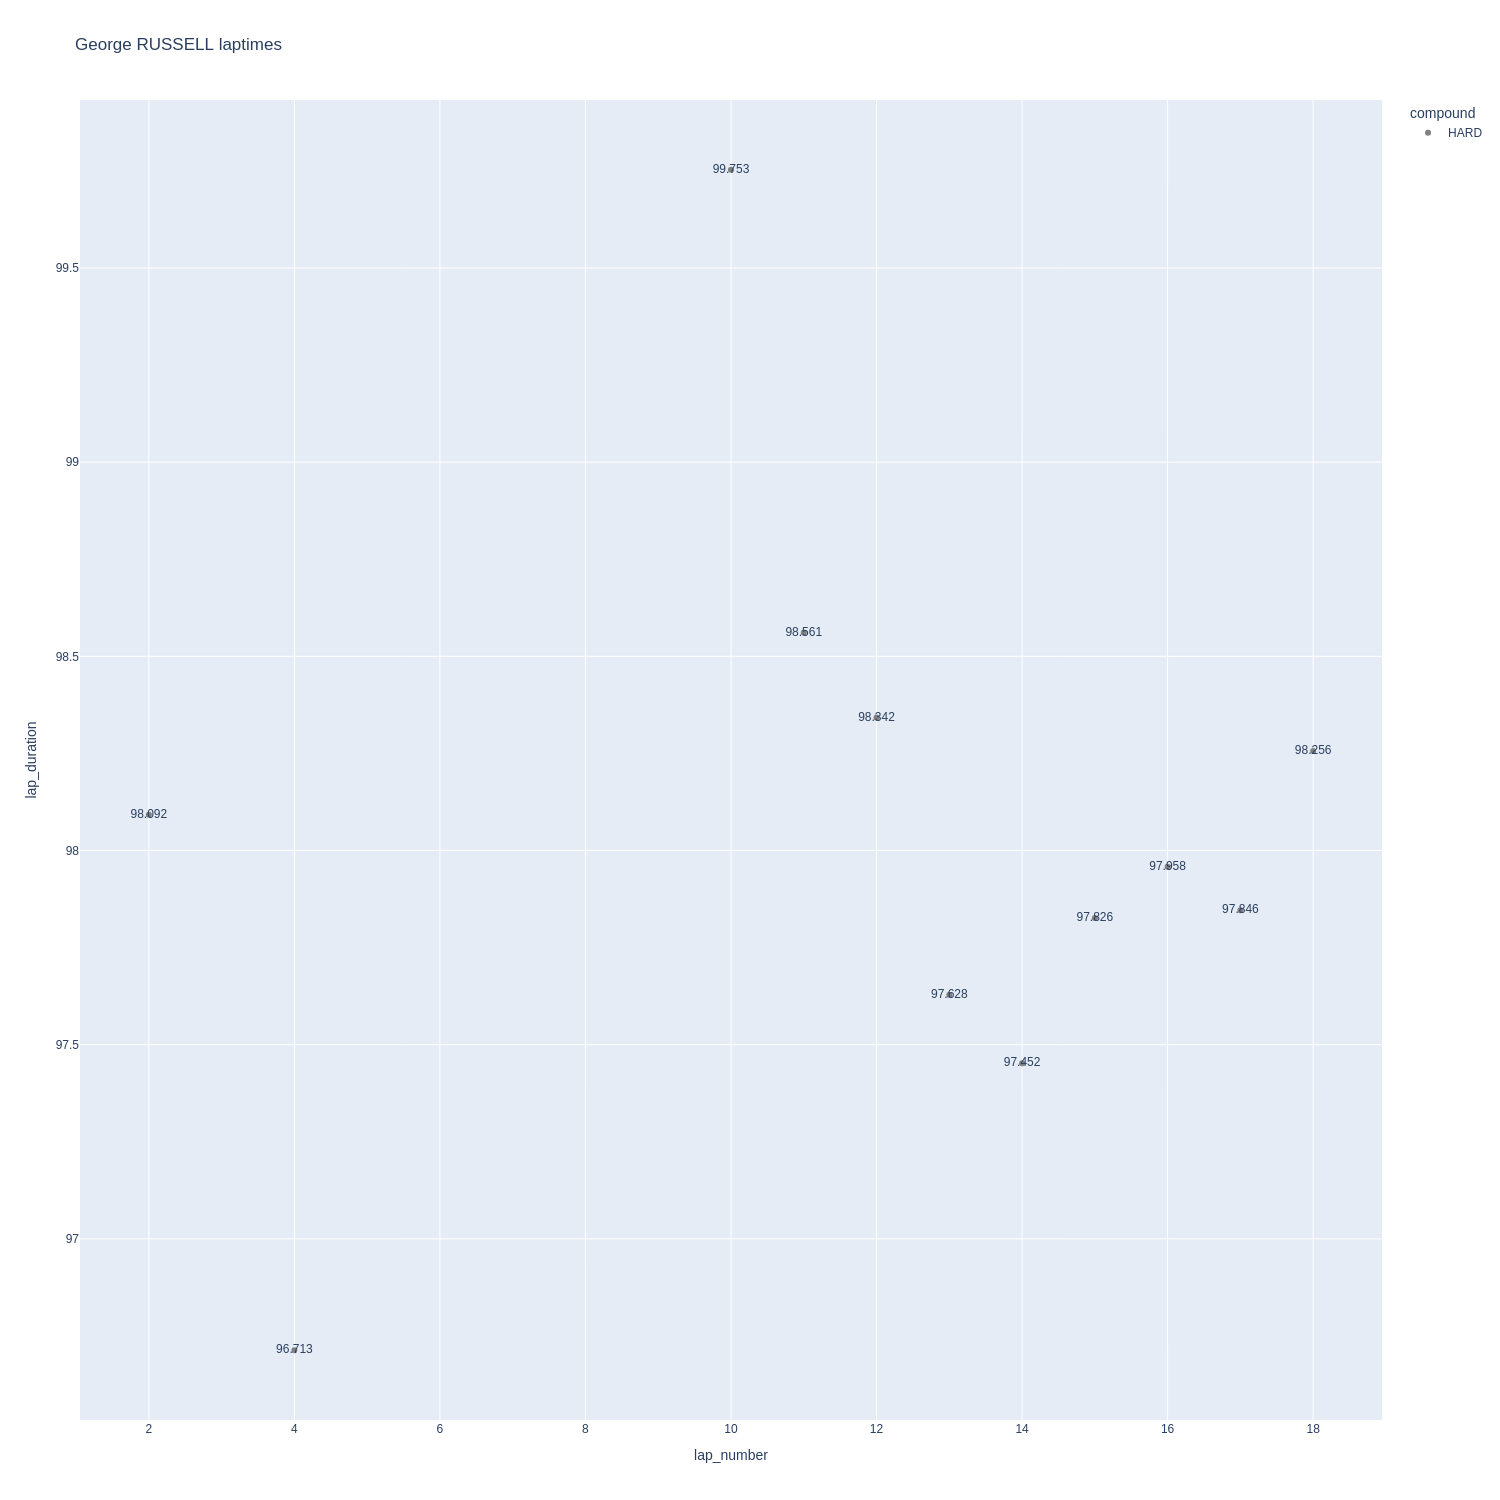

In [36]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

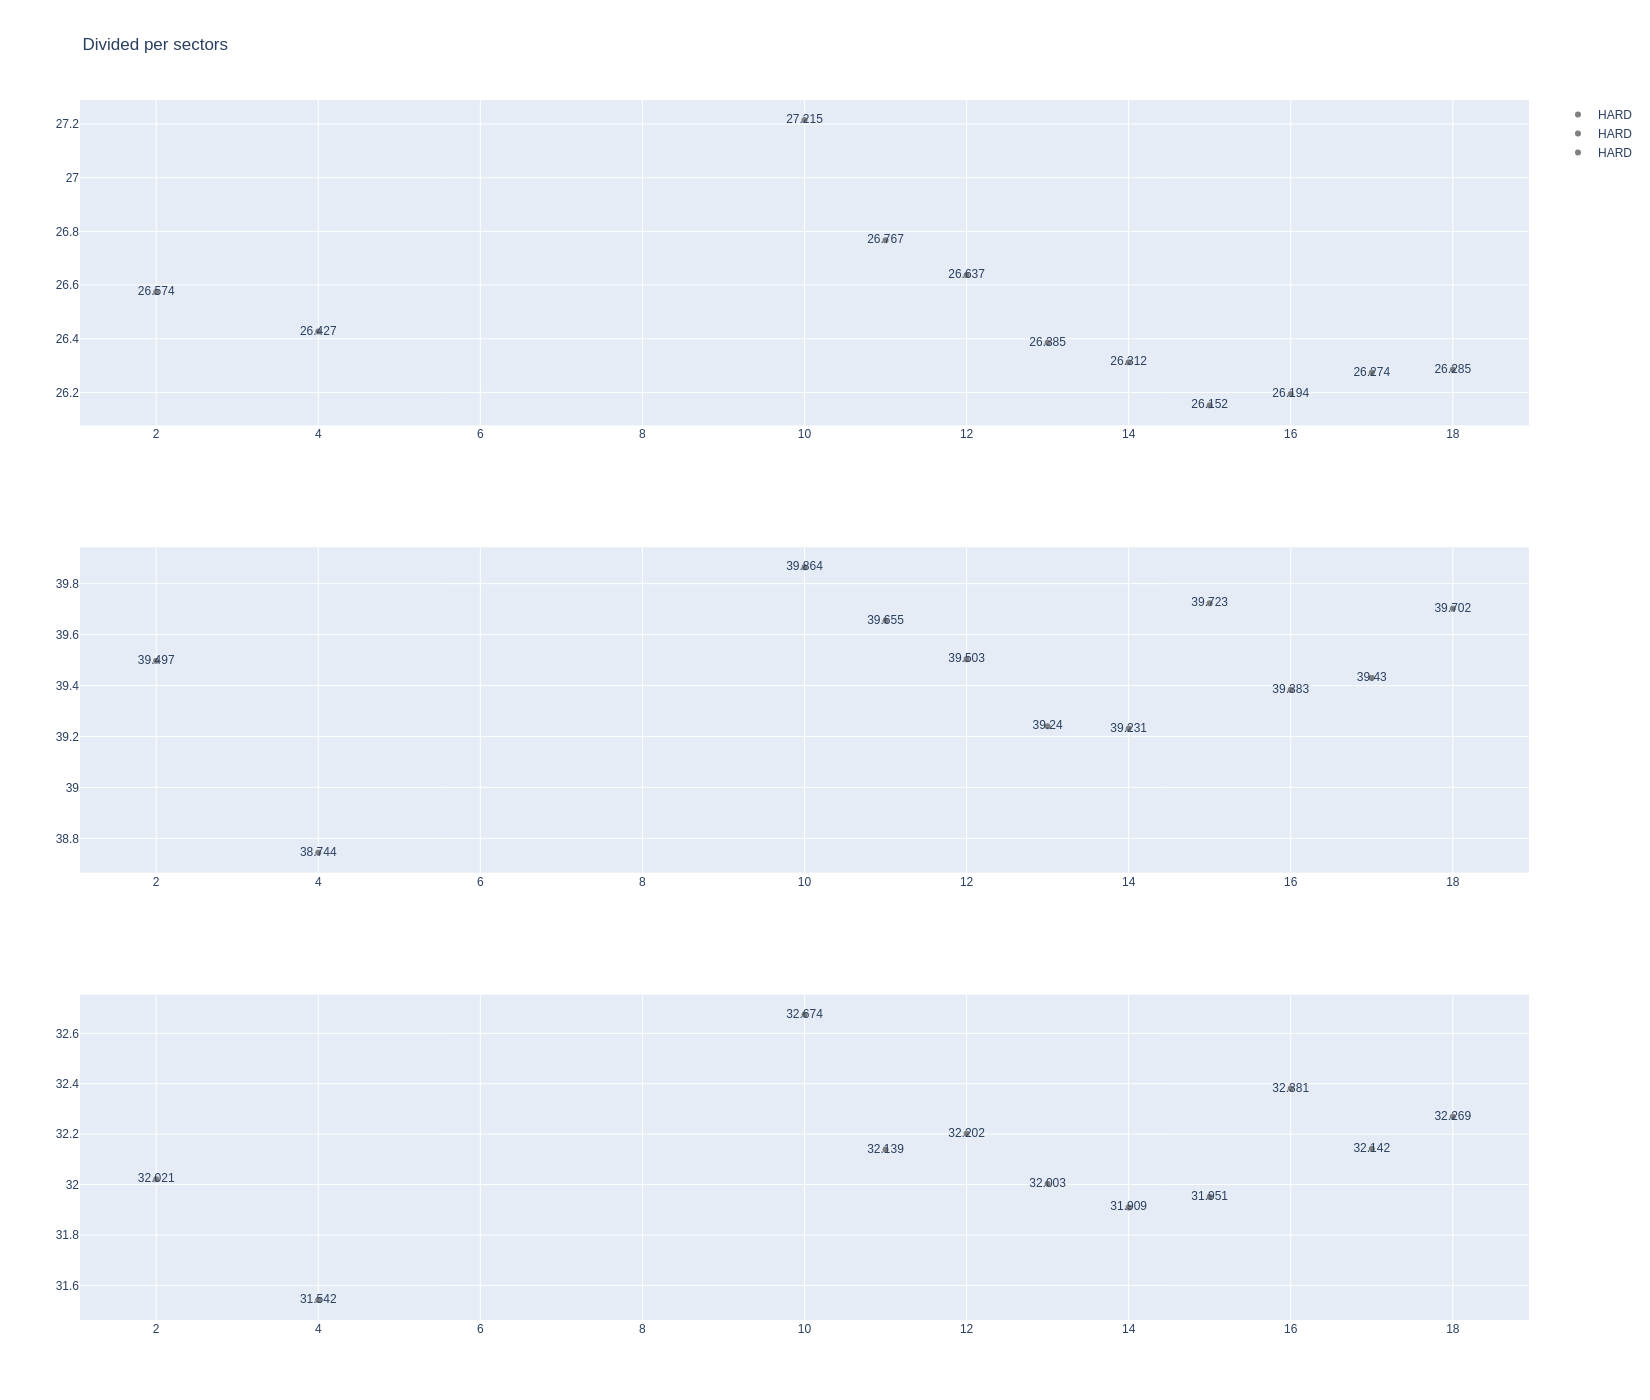

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [38]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
15         1271         9878             1              4          1        7   
19         1271         9878             1             81          1        9   
39         1271         9878             2             81         10       18   
46         1271         9878             2              4          8       17   
55         1271         9878             3              4         18       23   
71         1271         9878             3             81         19       26   

   compound  tyre_age_at_start  
15     HARD                  0  
19     HARD                  0  
39     HARD                  9  
46     HARD                  7  
55     SOFT                  0  
71     SOFT                  0

In [39]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
43   Lando NORRIS     HARD  2025-10-17T17:33:58.589000+00:00           2   
83   Lando NORRIS     HARD  2025-10-17T17:38:13.241000+00:00           4   
288  Lando NORRIS     HARD  2025-10-17T18:07:12.716000+00:00          13   
305  Lando NORRIS     HARD  2025-10-17T18:08:49.444000+00:00          14   
321  Lando NORRIS     HARD  2025-10-17T18:10:26.342000+00:00          15   
334  Lando NORRIS     HARD  2025-10-17T18:12:03.434000+00:00          16   
342  Lando NORRIS     HARD  2025-10-17T18:13:41.266000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
43              26.747             39.336             31.463        97.546  
83              26.217             38.668             31.241        96.126  
288             26.233             38.959             31.631        96.823  
305             26.183             39.073             31.645        96.901  
321             26.088             39.335             31.620        97.043  
334             26.316             39.726             31.834        97.876  
342             26.360             39.189             32.460        98.009

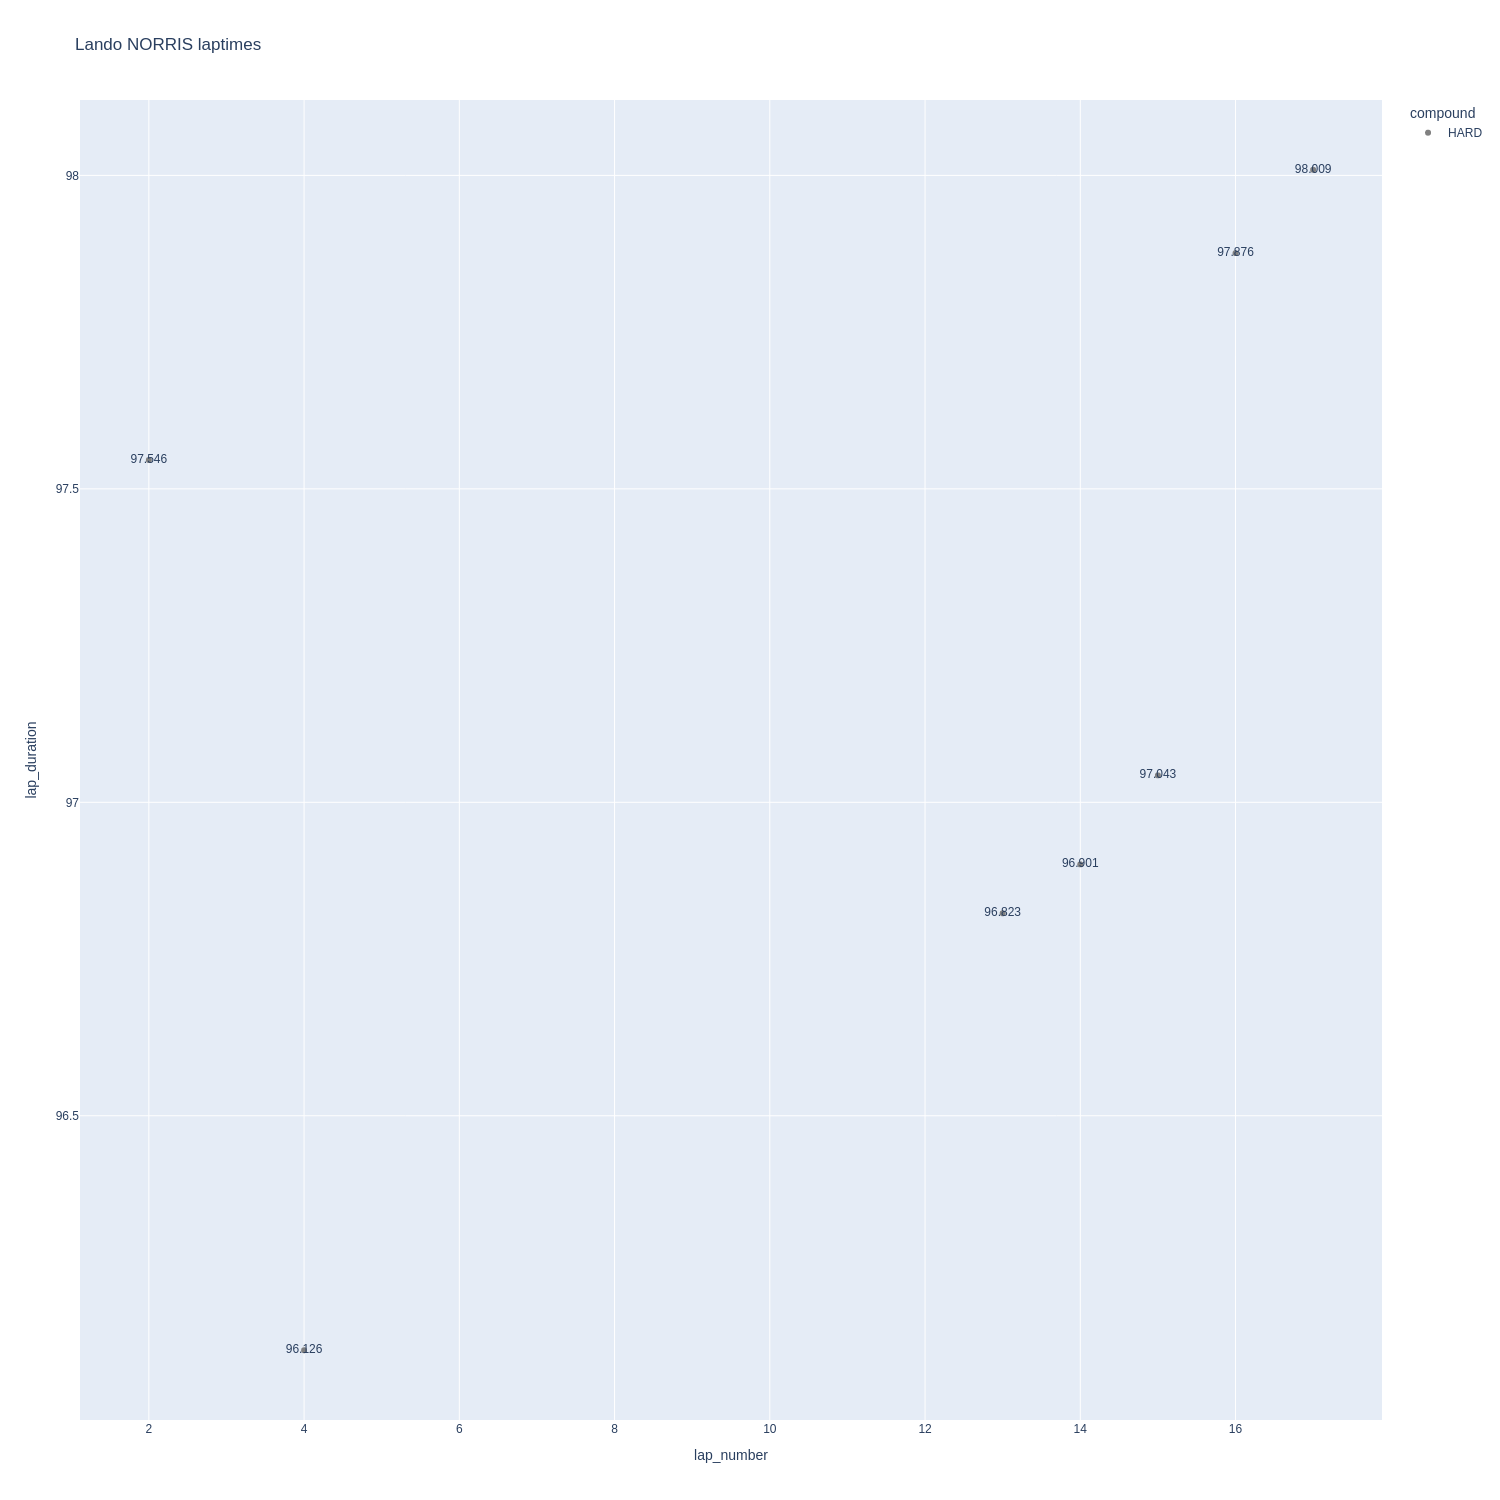

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

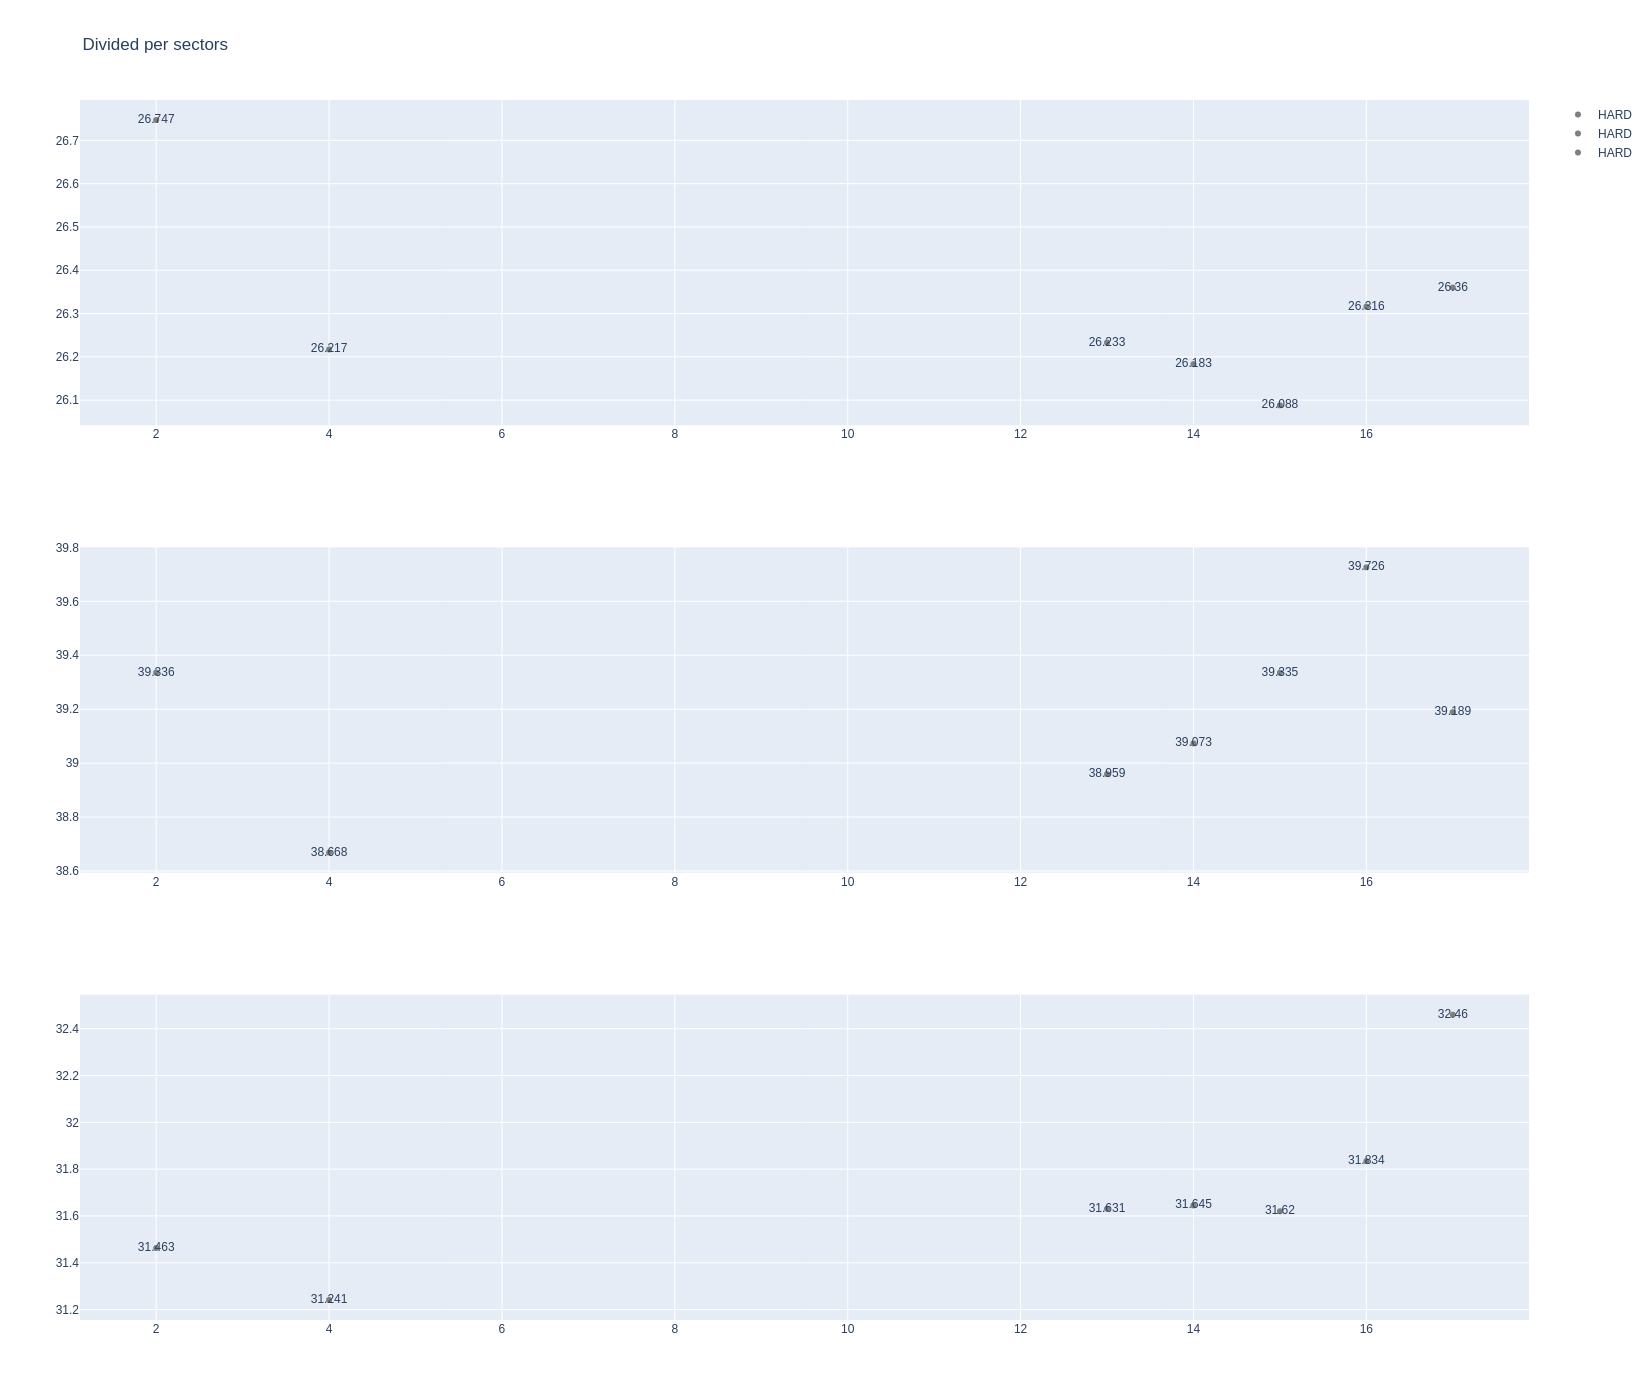

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [42]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
58   Oscar PIASTRI     HARD  2025-10-17T17:35:55.963000+00:00           3   
100  Oscar PIASTRI     HARD  2025-10-17T17:40:24.129000+00:00           5   
141  Oscar PIASTRI     HARD  2025-10-17T17:44:55.805000+00:00           7   
235  Oscar PIASTRI     HARD  2025-10-17T18:01:56.590000+00:00          12   
252  Oscar PIASTRI     HARD  2025-10-17T18:03:36.243000+00:00          13   
268  Oscar PIASTRI     HARD  2025-10-17T18:05:13.859000+00:00          14   
302  Oscar PIASTRI     HARD  2025-10-17T18:08:32.788000+00:00          16   
318  Oscar PIASTRI     HARD  2025-10-17T18:10:10.283000+00:00          17   
332  Oscar PIASTRI     HARD  2025-10-17T18:11:48.543000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
58              26.623             38.897             31.819        97.339  
100             26.233             38.613             31.542        96.388  
141             26.135             38.937             31.522        96.594  
235             27.345             39.897             32.370        99.612  
252             26.424             39.450             31.618        97.492  
268             26.295             39.736             32.183        98.214  
302             26.571             39.236             31.711        97.518  
318             26.468             39.713             32.091        98.272  
332             26.689             40.140             32.876        99.705

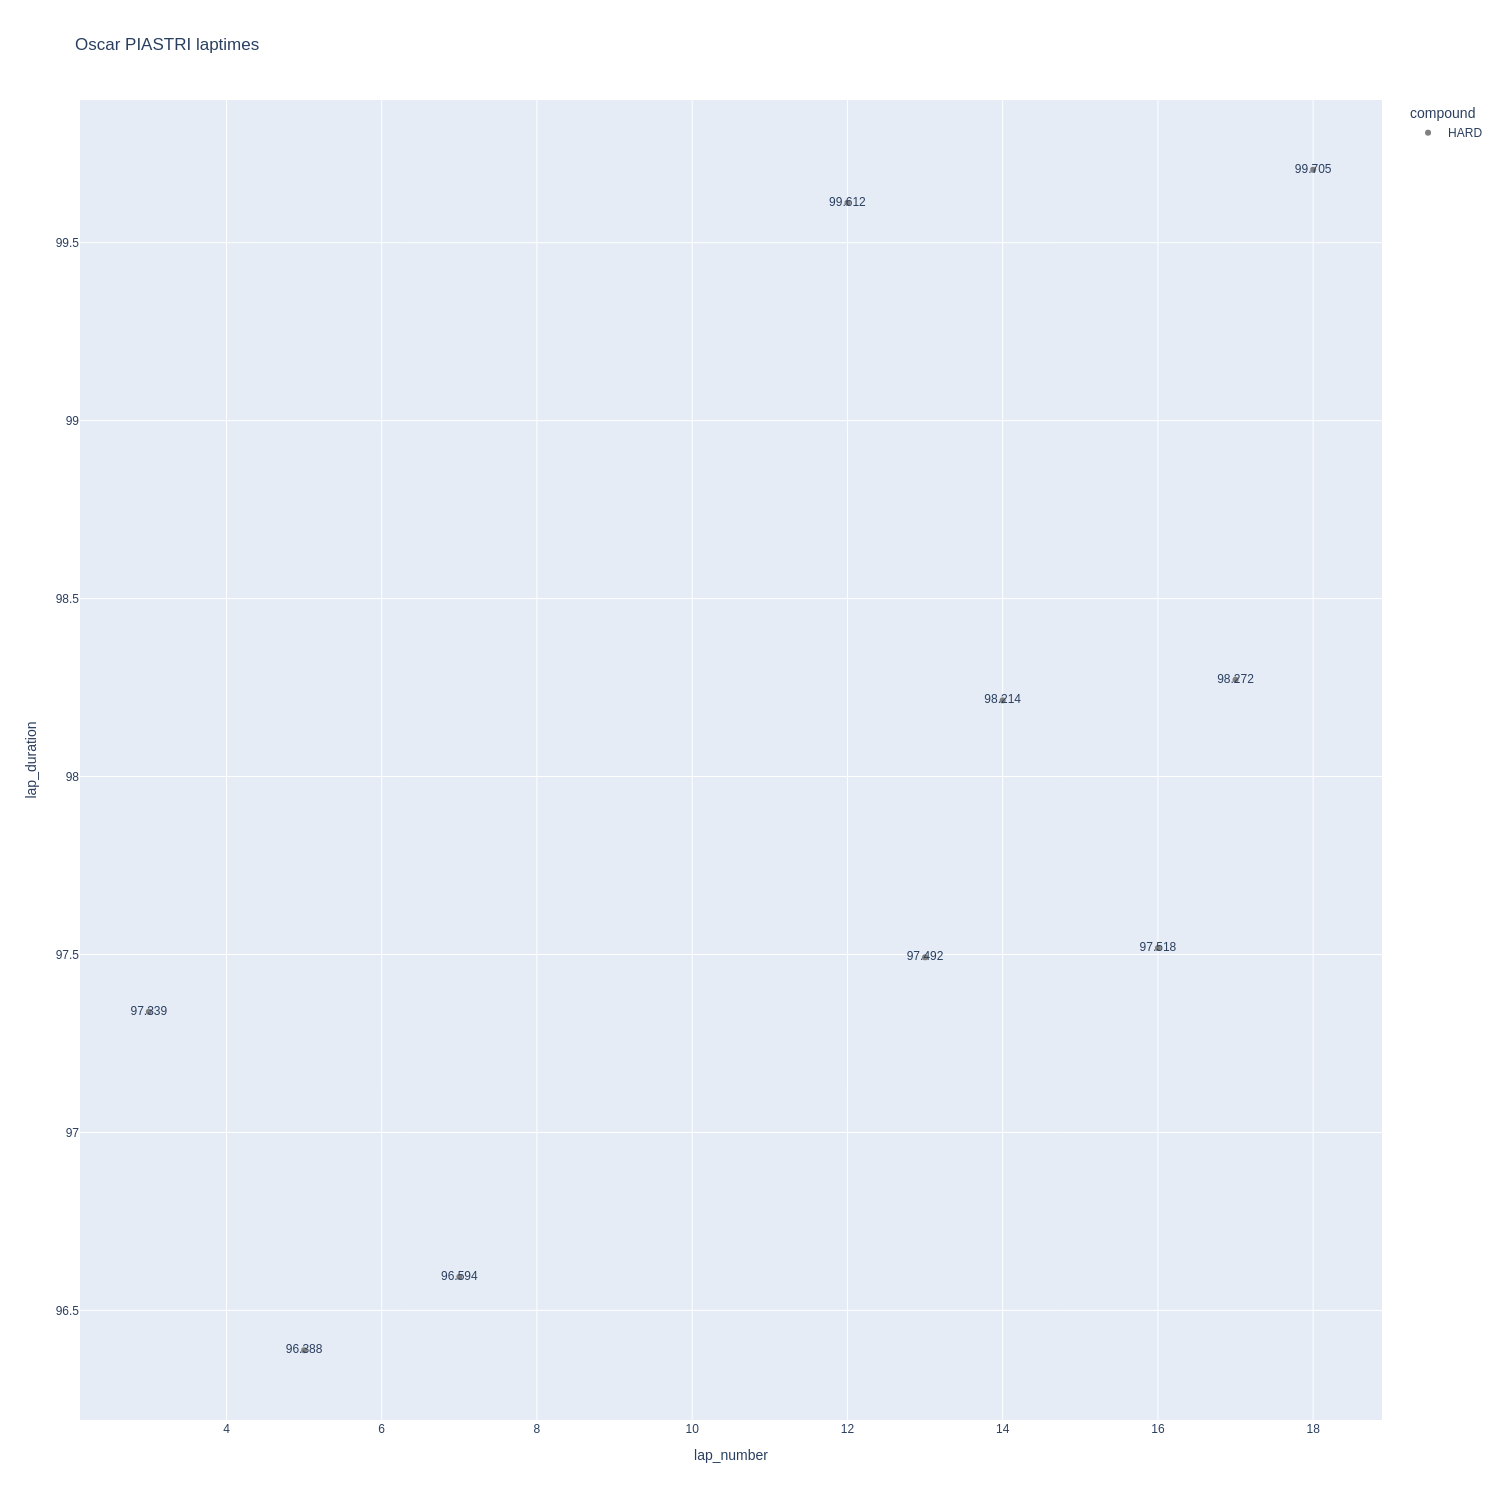

In [43]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

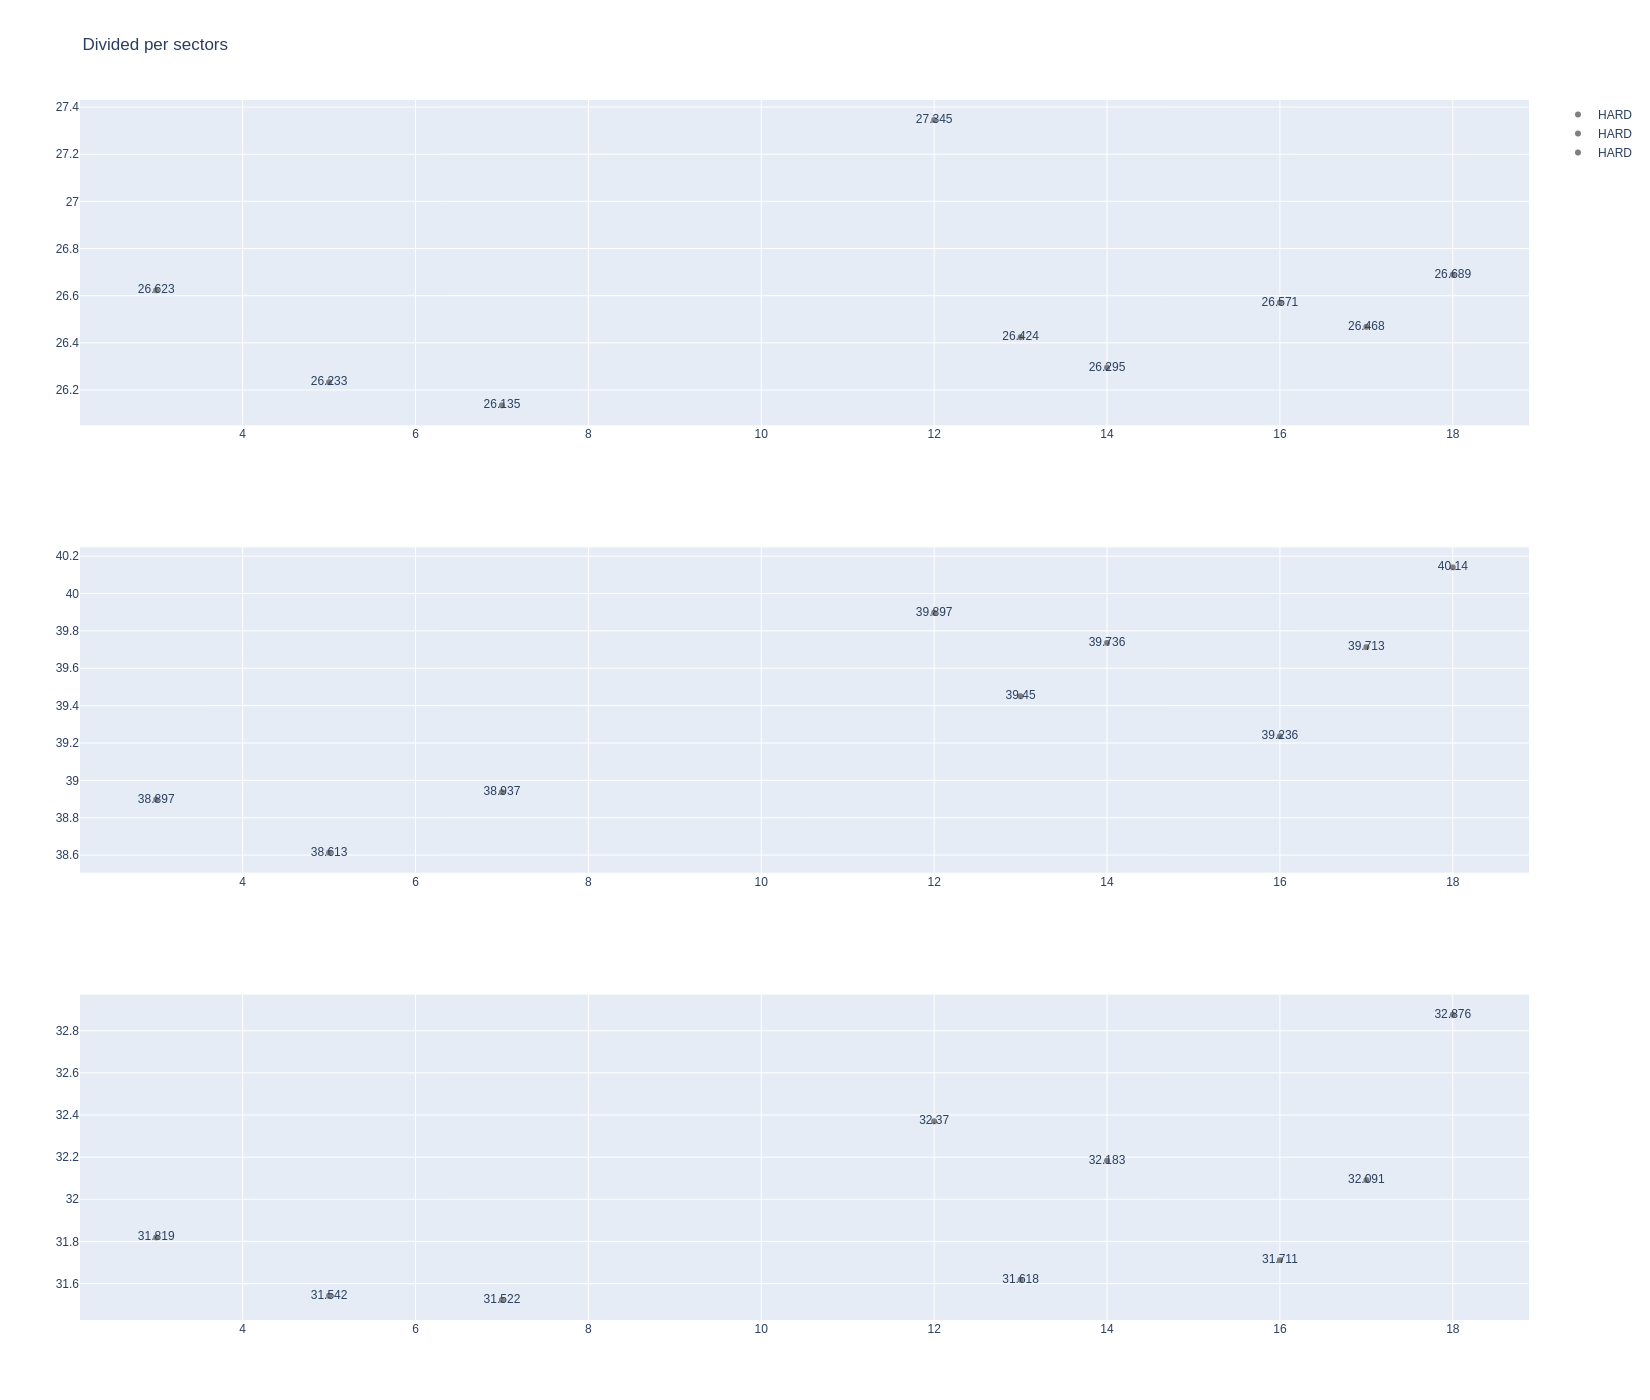

In [44]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [45]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1271         9878             1             14          1        1   
1          1271         9878             1             18          1        1   
10         1271         9878             2             14          2        8   
18         1271         9878             2             18          2        9   
37         1271         9878             3             14          9       17   
40         1271         9878             3             18         10       17   
51         1271         9878             4             18         18       20   
53         1271         9878             4             14         18       20   
54         1271         9878             5             18         21       23   
60         1271         9878             5             14         21       23   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
1    MEDIUM                  0  
10     HARD                  0  
18     HARD                  0  
37     HARD                  7  
40     HARD                  8  
51     SOFT                  0  
53     SOFT                  0  
54     SOFT                  0  
60     HARD                  0

In [46]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
59   Fernando ALONSO     HARD  2025-10-17T17:36:03.202000+00:00           3   
97   Fernando ALONSO     HARD  2025-10-17T17:40:00.624000+00:00           5   
134  Fernando ALONSO     HARD  2025-10-17T17:44:11.218000+00:00           7   
197  Fernando ALONSO     HARD  2025-10-17T17:57:50.336000+00:00          10   
234  Fernando ALONSO     HARD  2025-10-17T18:01:48.824000+00:00          12   
251  Fernando ALONSO     HARD  2025-10-17T18:03:25.166000+00:00          13   
267  Fernando ALONSO     HARD  2025-10-17T18:05:04.545000+00:00          14   
283  Fernando ALONSO     HARD  2025-10-17T18:06:43.842000+00:00          15   
300  Fernando ALONSO     HARD  2025-10-17T18:08:22.866000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
59              26.512             39.192             31.949        97.653  
97              26.095             38.598             31.812        96.505  
134             25.938             38.670             31.651        96.259  
197             26.048             38.809             31.640        96.497  
234             25.843             38.842             31.704        96.389  
251             26.890             40.072             32.440        99.402  
267             26.569             40.273             32.360        99.202  
283             26.700             39.664             32.636        99.000  
300             26.627             39.544             32.170        98.341

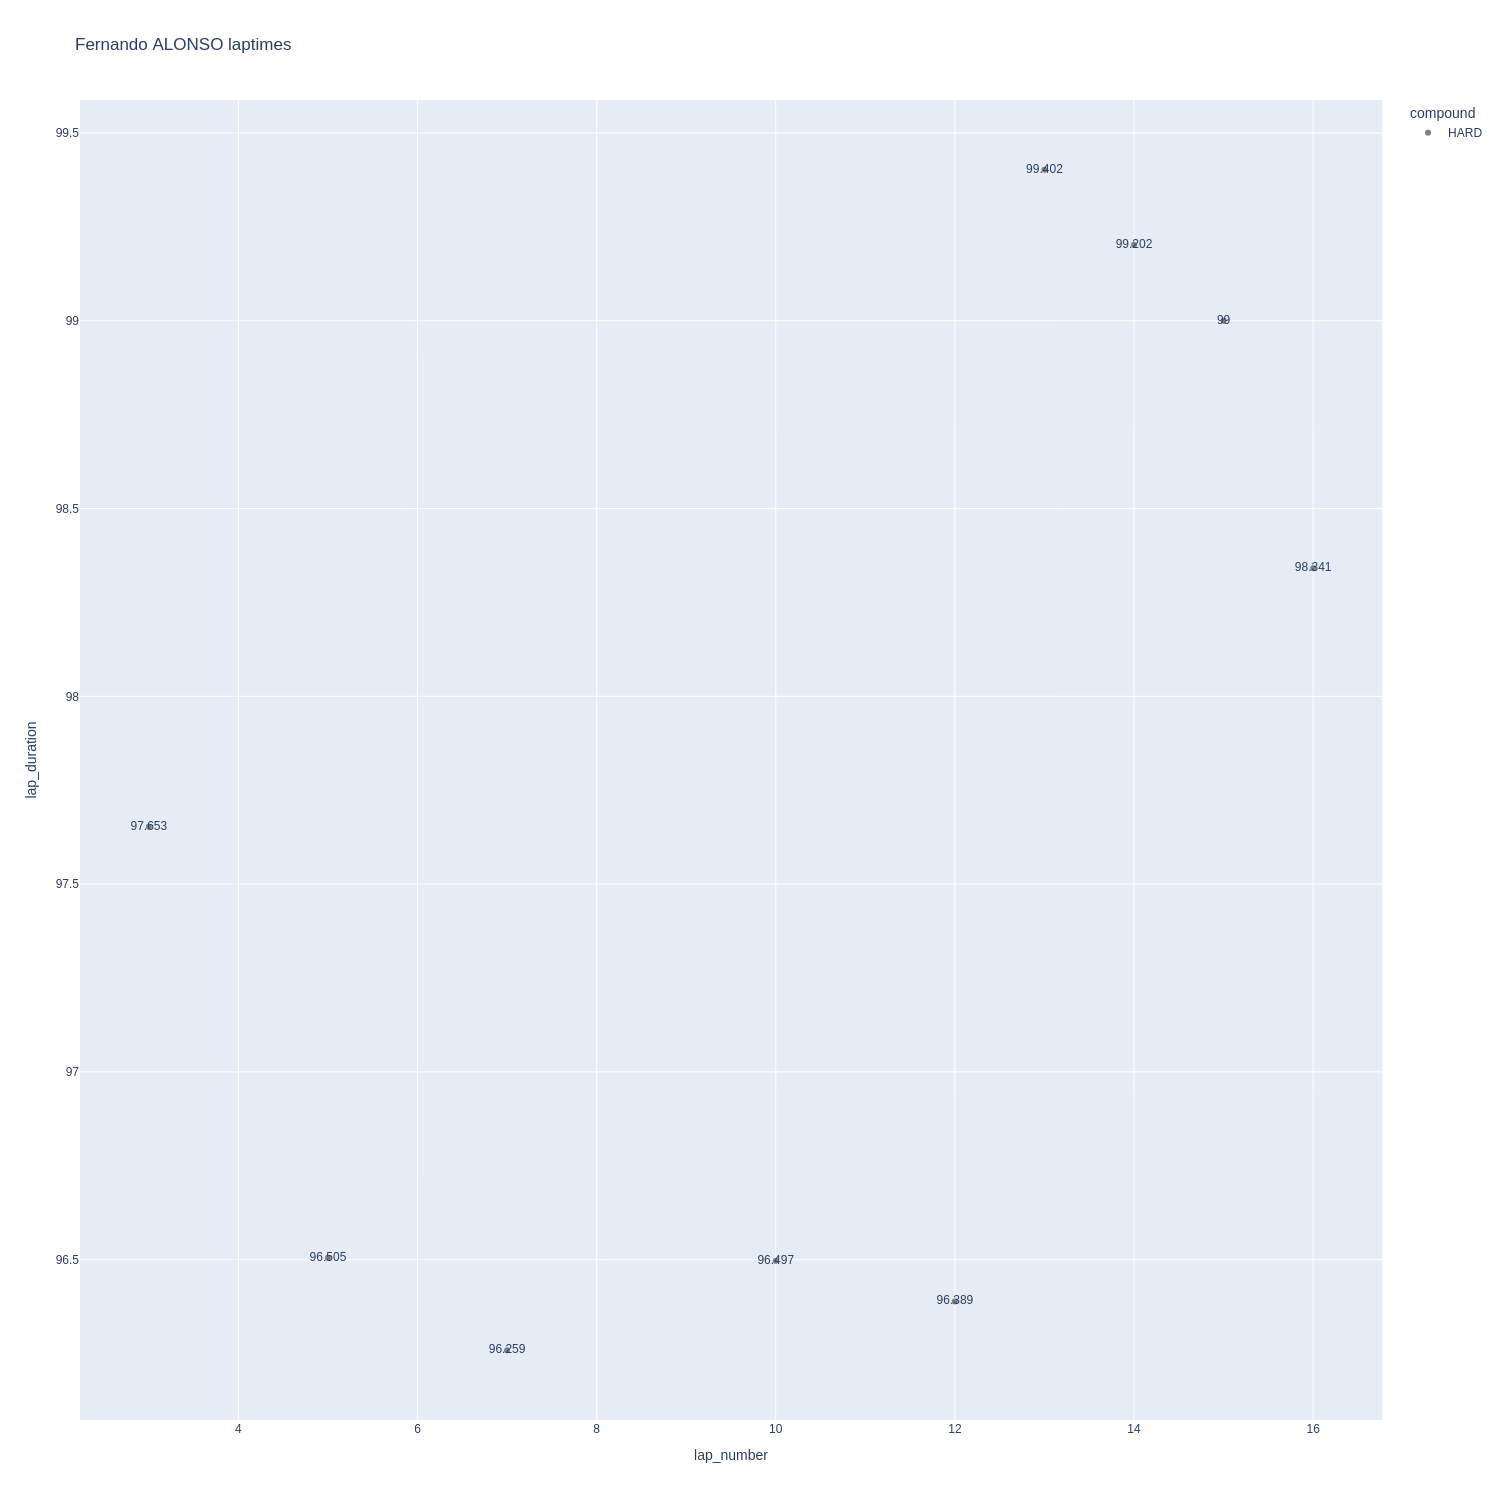

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

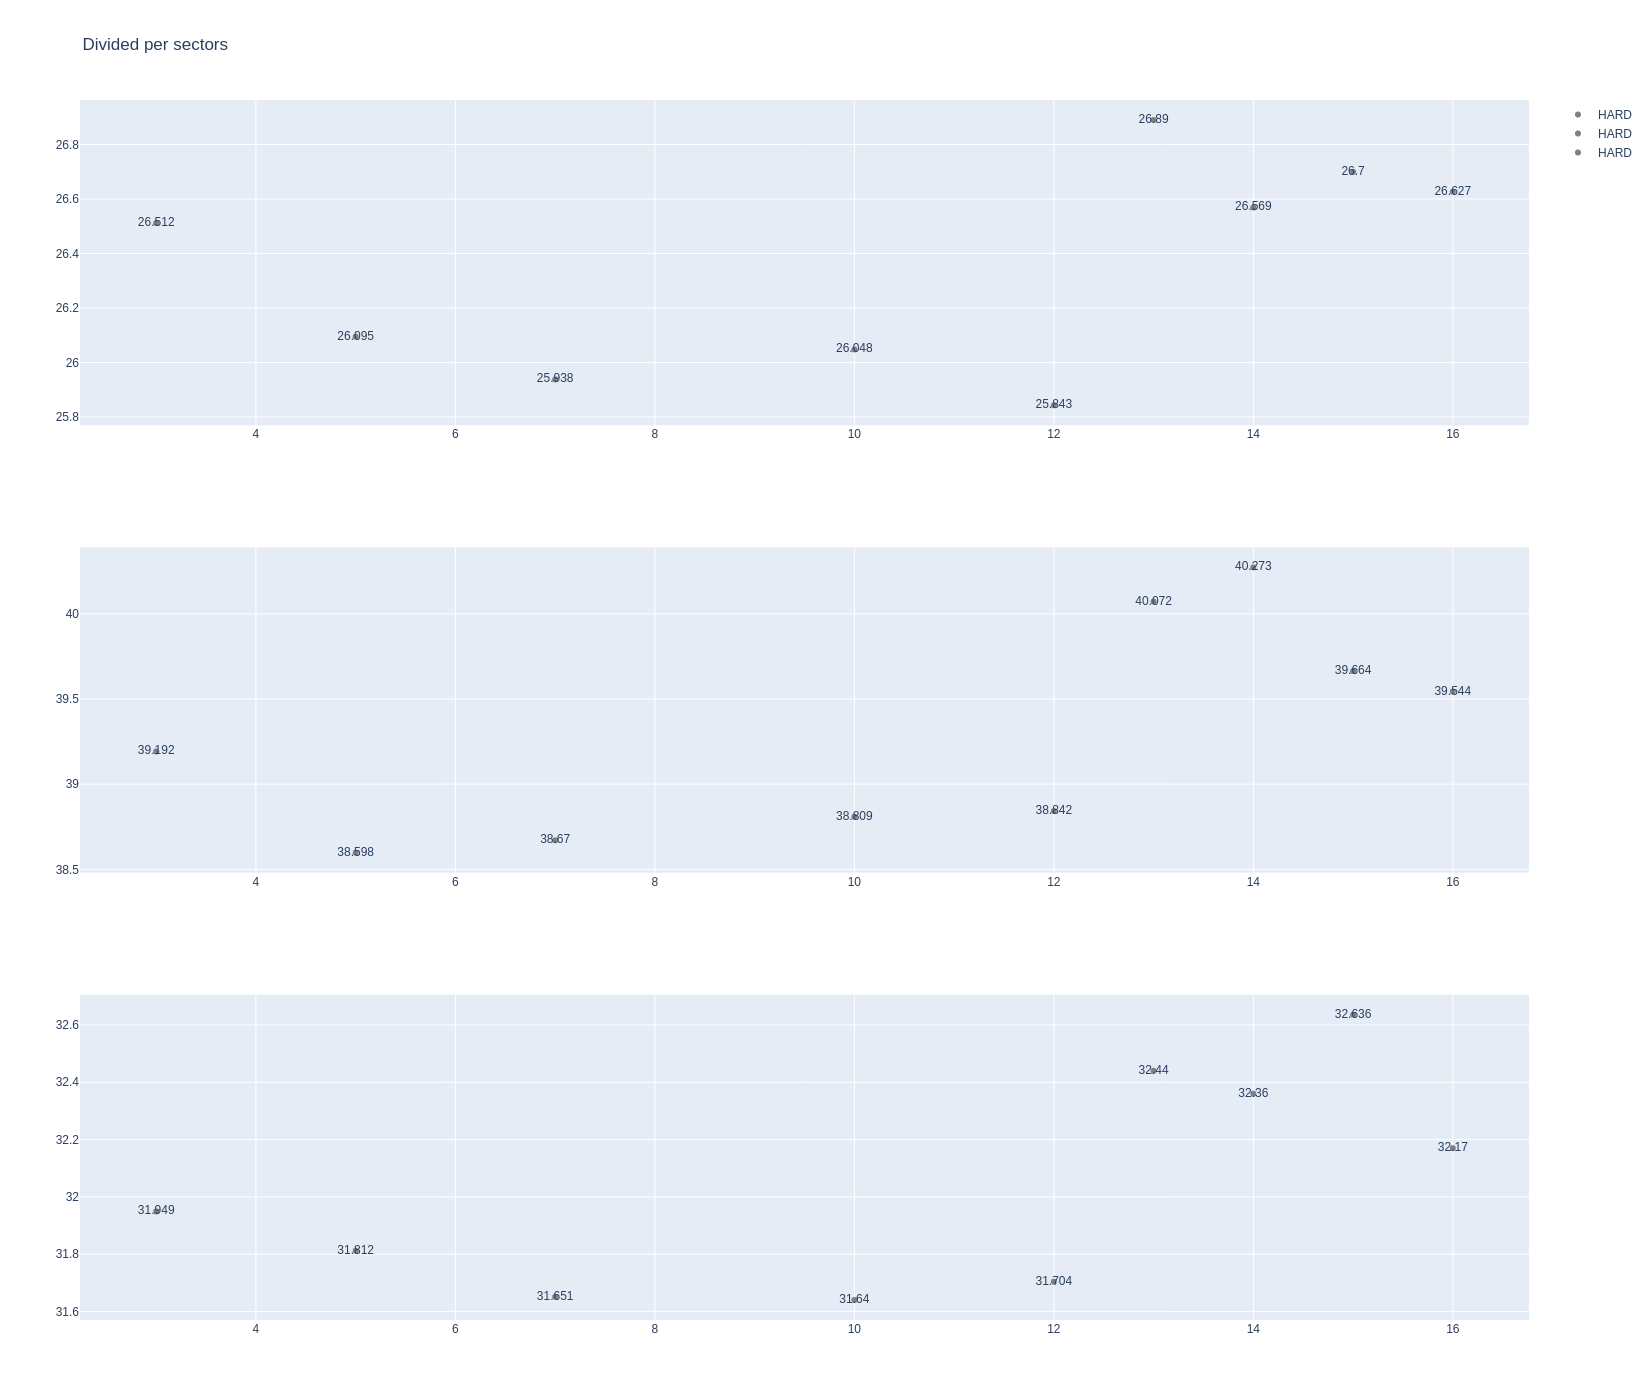

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [49]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
60   Lance STROLL     HARD  2025-10-17T17:36:08.969000+00:00           3   
76   Lance STROLL     HARD  2025-10-17T17:37:47.282000+00:00           4   
117  Lance STROLL     HARD  2025-10-17T17:42:09.579000+00:00           6   
157  Lance STROLL     HARD  2025-10-17T17:46:36.864000+00:00           8   
237  Lance STROLL     HARD  2025-10-17T18:02:11.071000+00:00          12   
254  Lance STROLL     HARD  2025-10-17T18:03:48.374000+00:00          13   
271  Lance STROLL     HARD  2025-10-17T18:05:28.050000+00:00          14   
287  Lance STROLL     HARD  2025-10-17T18:07:07.622000+00:00          15   
304  Lance STROLL     HARD  2025-10-17T18:08:47.351000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
60              26.921             39.318             32.177        98.416  
76              26.292             39.014             31.740        97.046  
117             26.192             38.463             31.901        96.556  
157             26.031             38.897             31.481        96.409  
237             26.152             39.107             32.006        97.265  
254             26.850             40.000             32.886        99.736  
271             26.931             39.862             32.657        99.450  
287             27.022             39.659             32.214        98.895  
304             26.910             39.610             32.519        99.039

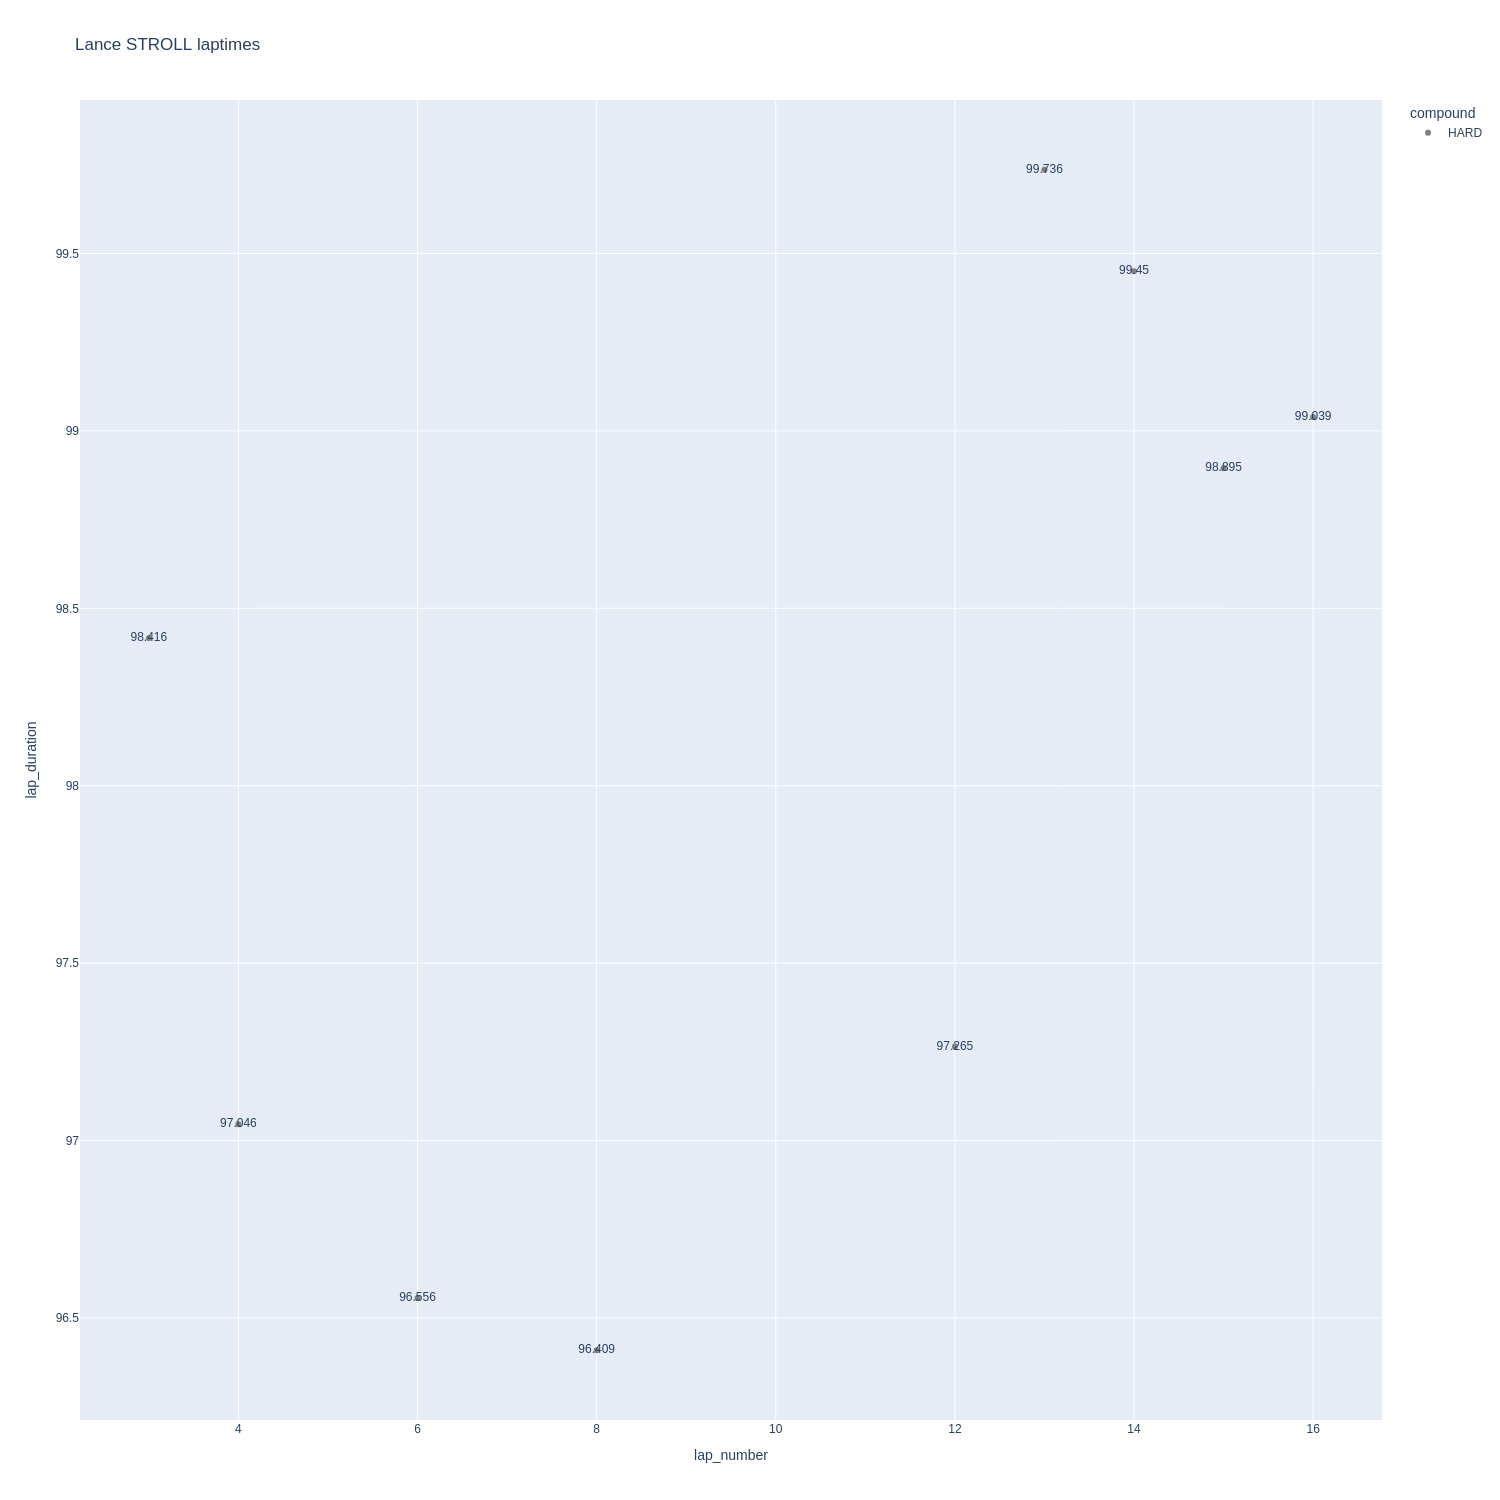

In [50]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

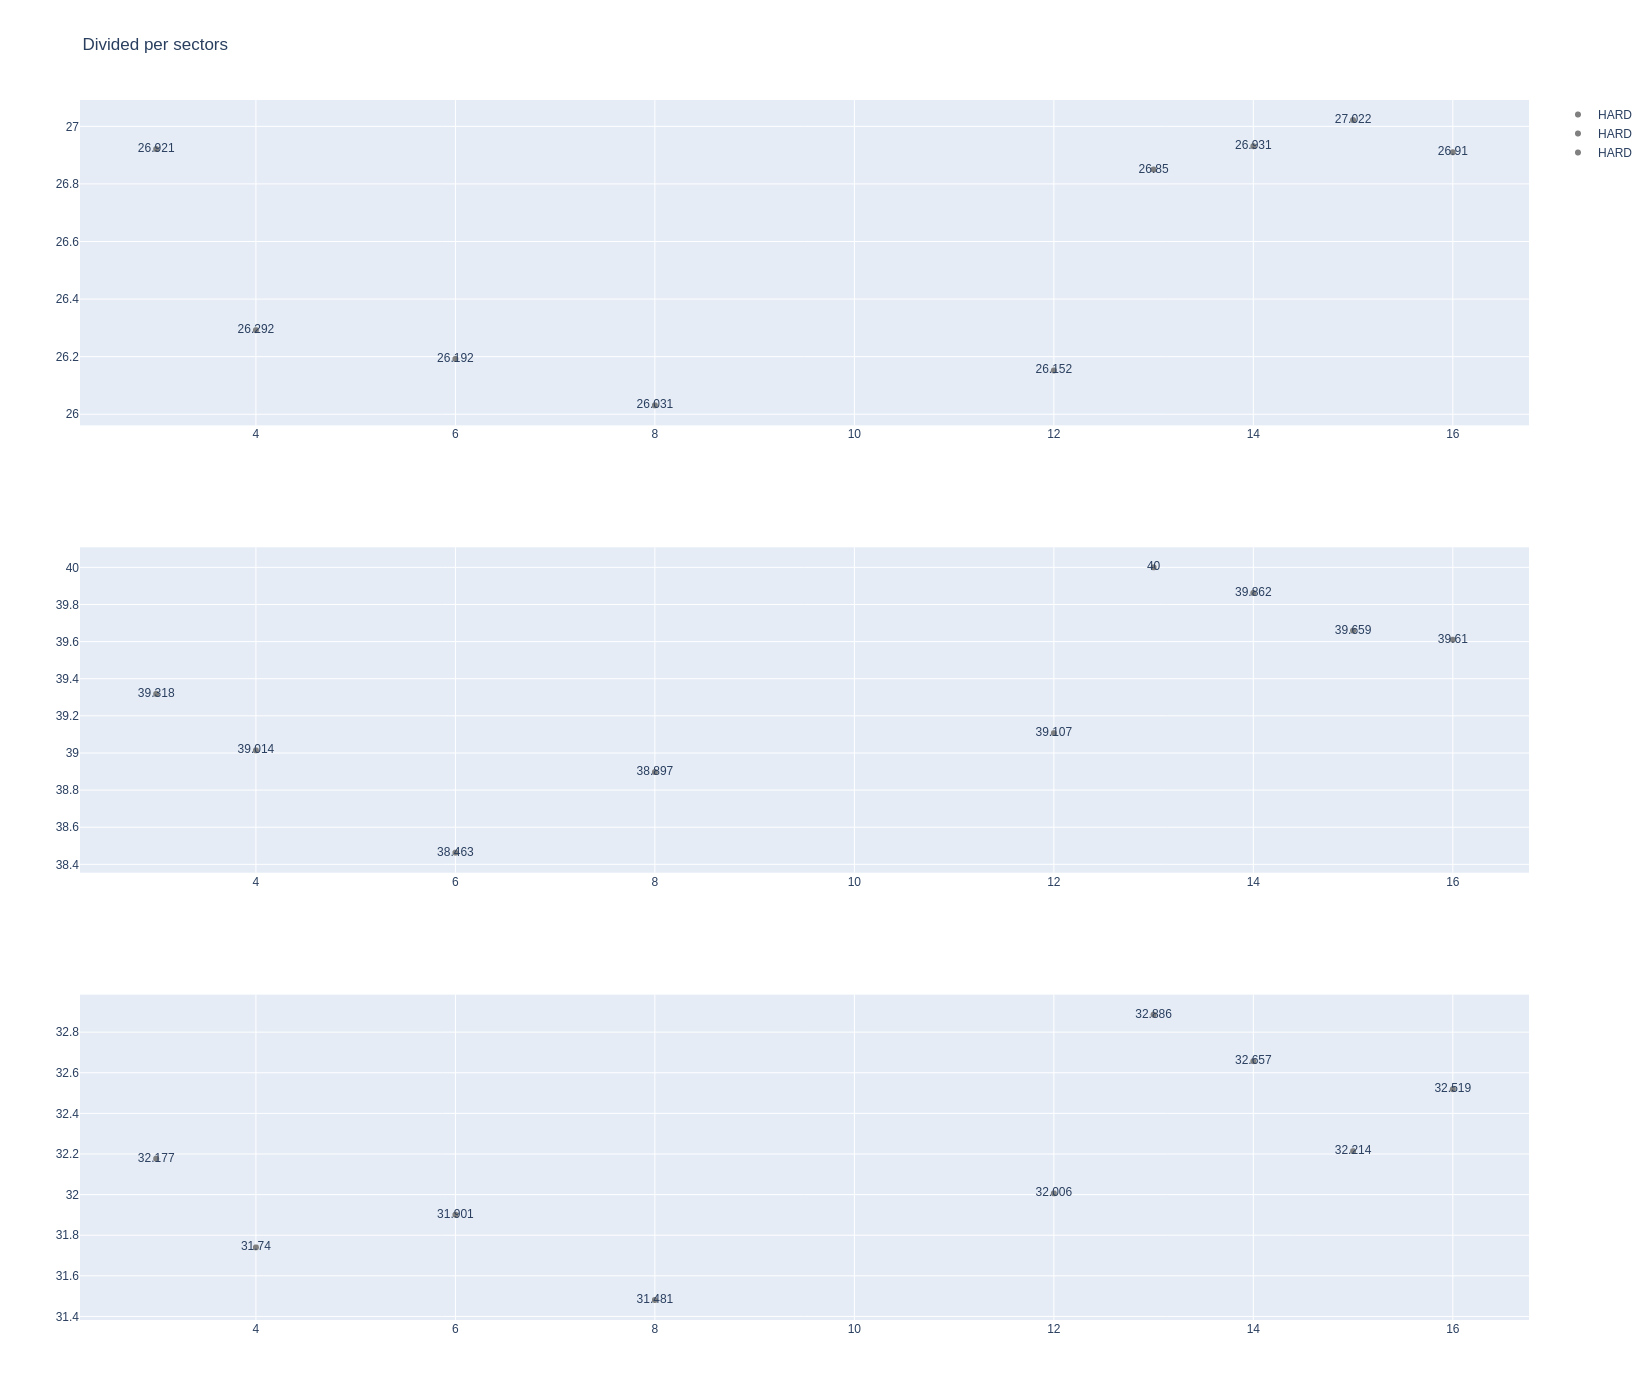

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [52]:
stintInformation.query('driver_number == 30 or driver_number == 6')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1271         9878             1             30          1        6   
9          1271         9878             1              6          1        9   
14         1271         9878             2             30          7       10   
28         1271         9878             2              6         10       17   
29         1271         9878             3             30         11       18   
49         1271         9878             3              6         18       21   
50         1271         9878             4             30         19       21   
61         1271         9878             4              6         22       25   
62         1271         9878             5             30         22       25   

   compound  tyre_age_at_start  
4      HARD                  0  
9      HARD                  0  
14     HARD                  0  
28     HARD                  9  
29     HARD                 10  
49   MEDIUM                  0  
50   MEDIUM                  0  
61   MEDIUM                  0  
62   MEDIUM                  3

In [53]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
57   Isack HADJAR     HARD  2025-10-17T17:35:47.640000+00:00           3   
98   Isack HADJAR     HARD  2025-10-17T17:40:08.411000+00:00           5   
159  Isack HADJAR     HARD  2025-10-17T17:46:45.286000+00:00           8   
221  Isack HADJAR     HARD  2025-10-17T18:00:36.534000+00:00          13   
238  Isack HADJAR     HARD  2025-10-17T18:02:16.367000+00:00          14   
255  Isack HADJAR     HARD  2025-10-17T18:03:56.118000+00:00          15   
272  Isack HADJAR     HARD  2025-10-17T18:05:35.644000+00:00          16   
289  Isack HADJAR     HARD  2025-10-17T18:07:14.606000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
57              26.472             39.152             31.949        97.573  
98              26.115             38.787             32.248        97.150  
159             25.987             38.793             31.481        96.261  
221             27.055             40.045             32.703        99.803  
238             27.044             40.249             32.521        99.814  
255             26.812             40.190             32.475        99.477  
272             26.614             40.074             32.376        99.064  
289             26.699             40.239             32.832        99.770

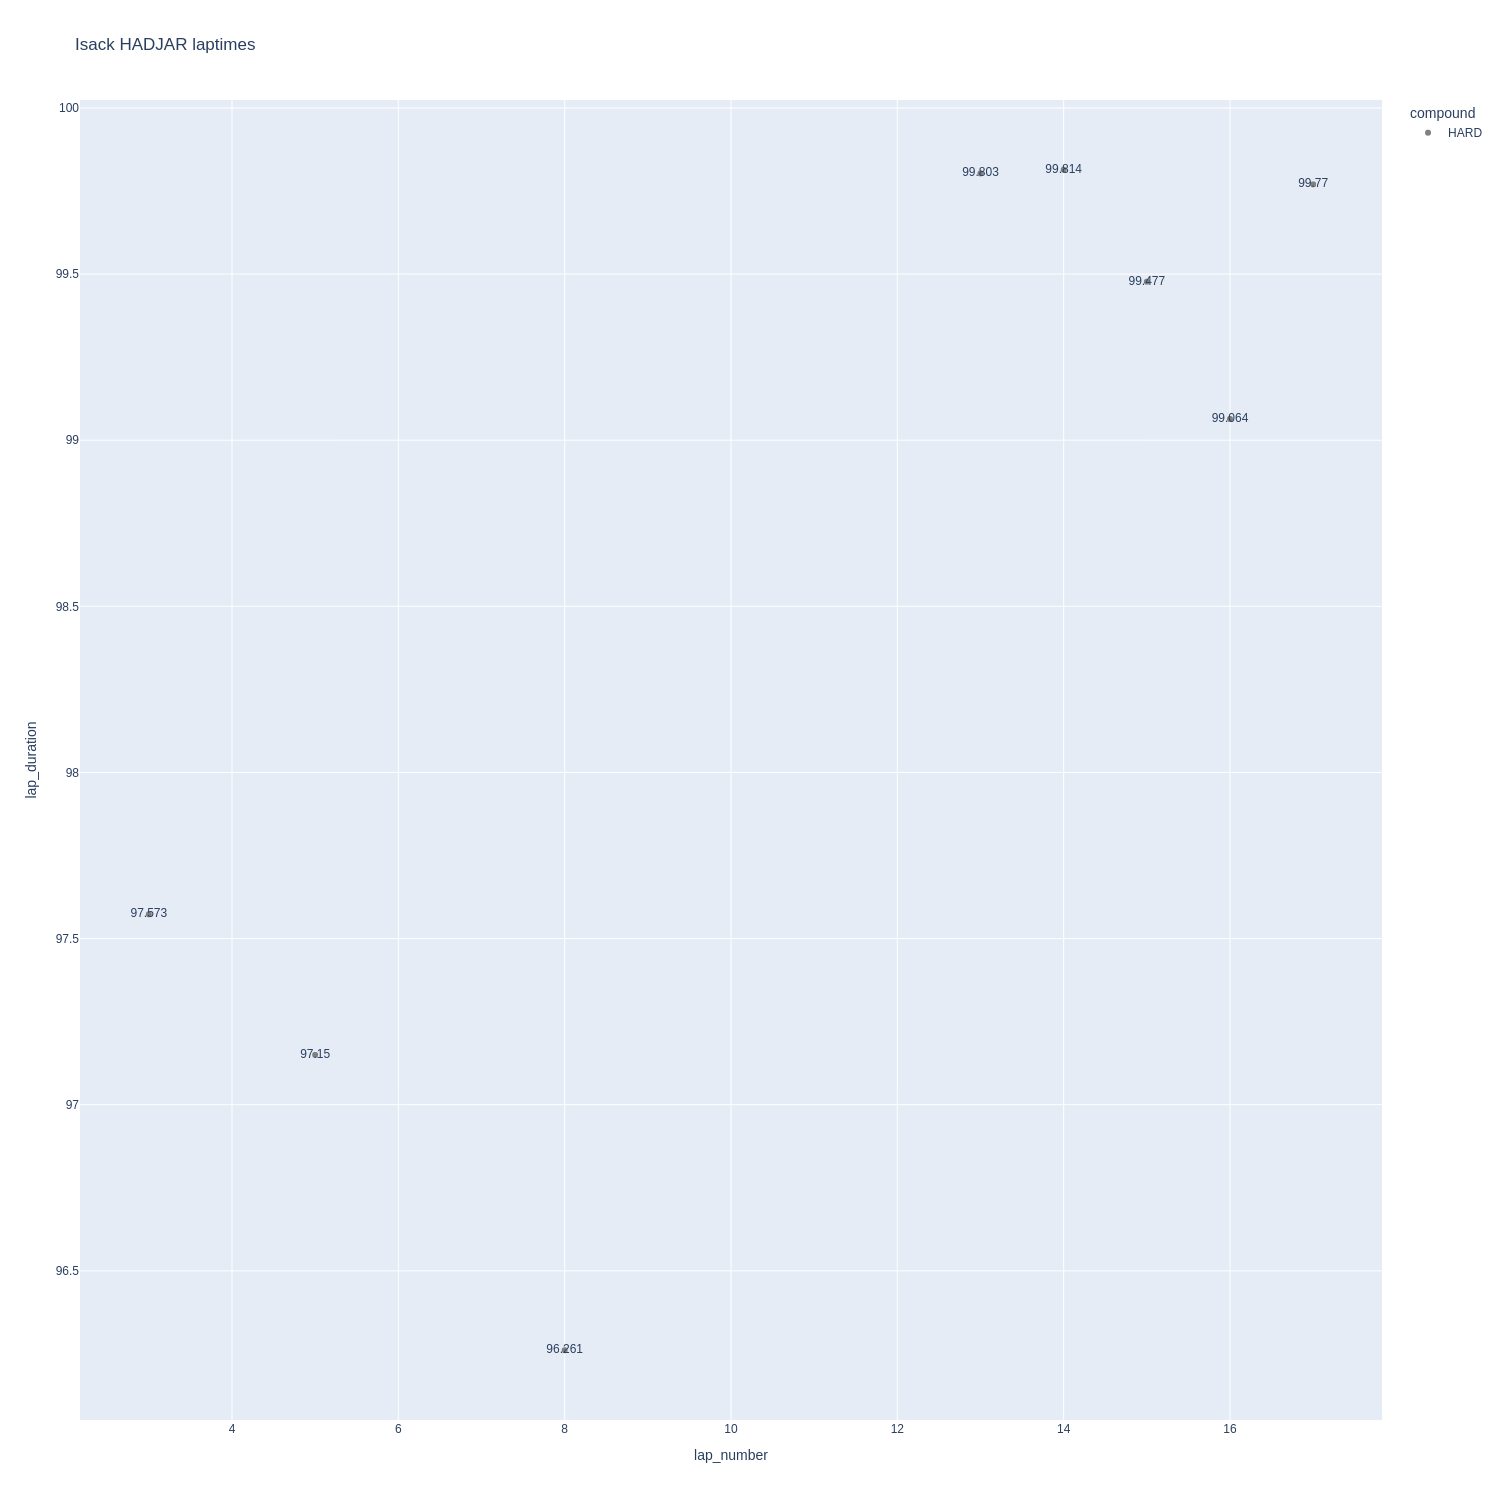

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

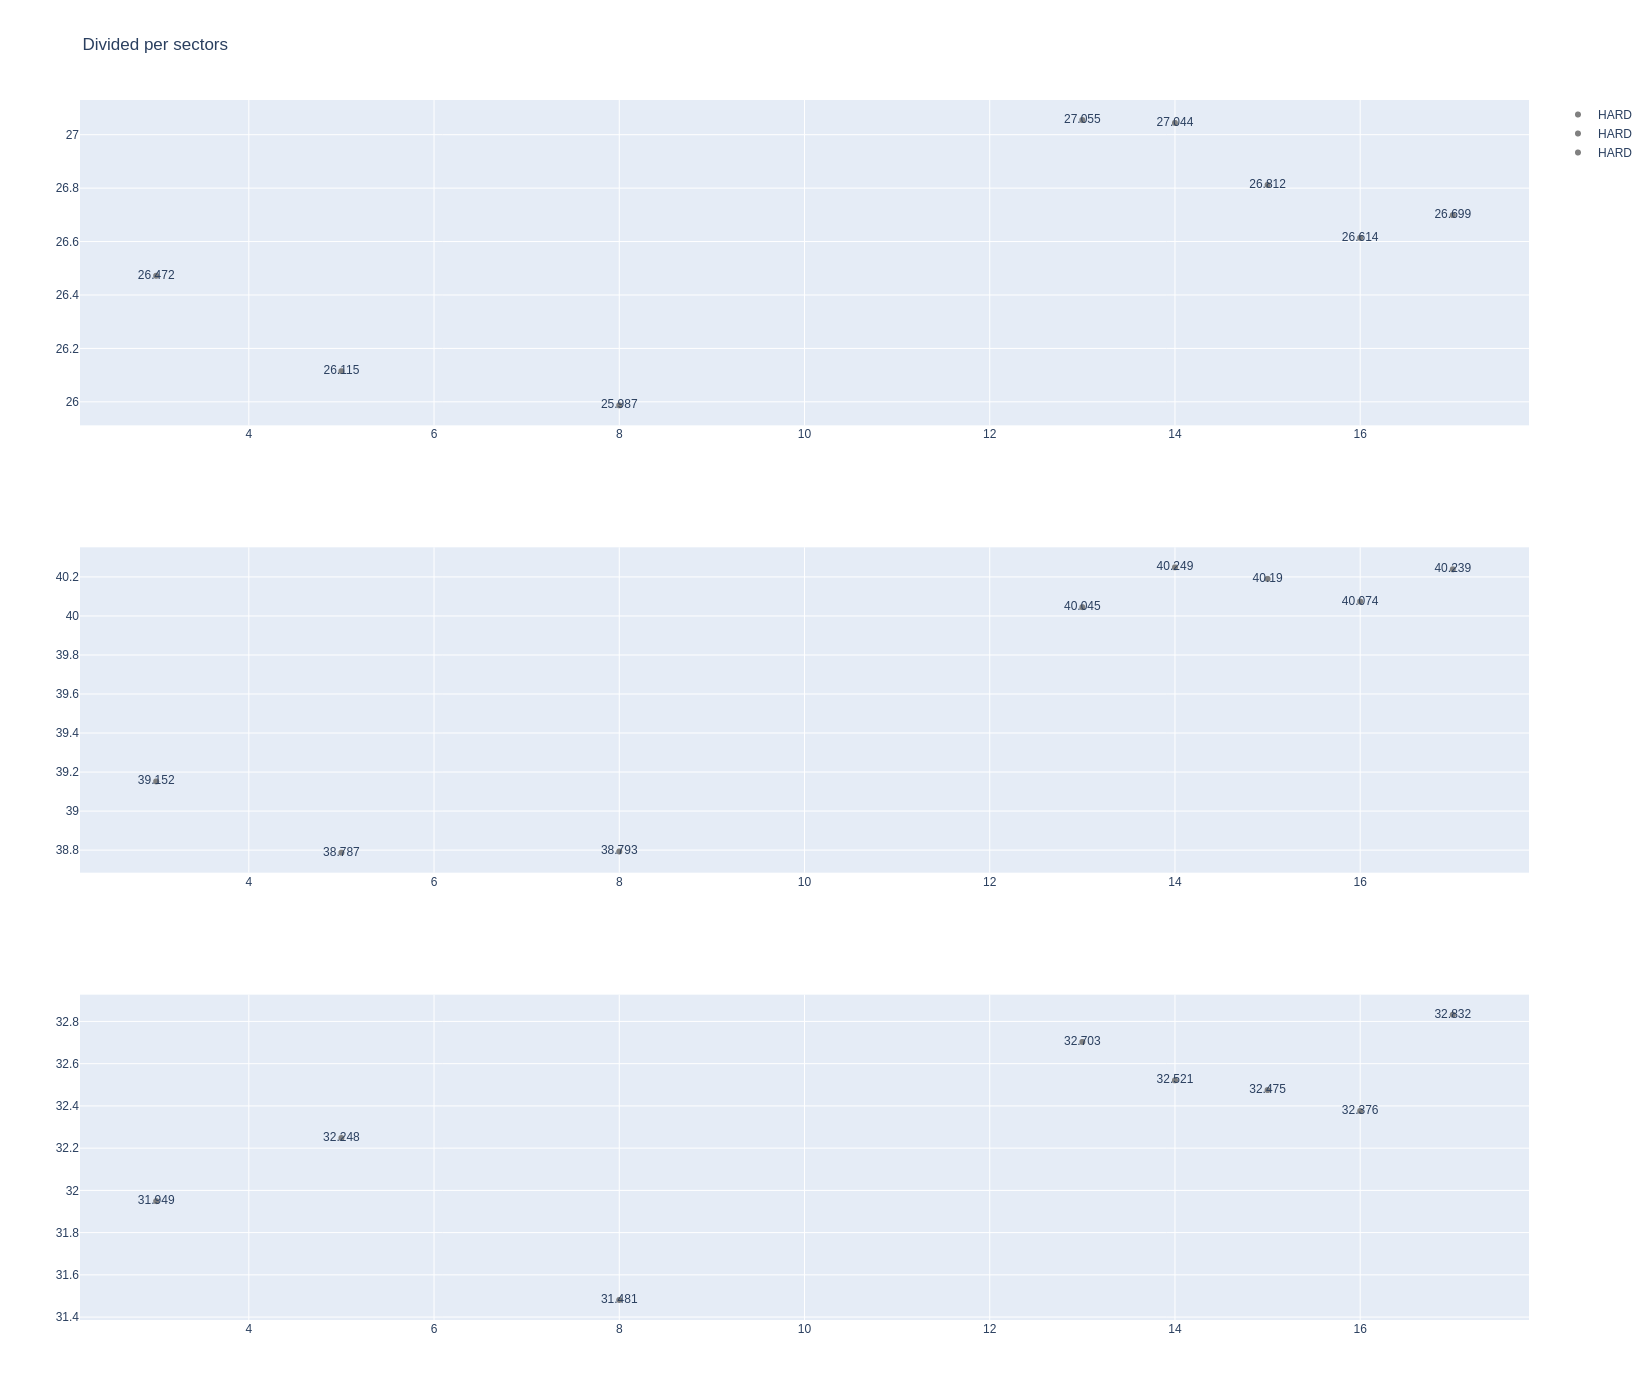

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [56]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
21   Liam LAWSON     HARD  2025-10-17T17:32:04.020000+00:00           2   
36   Liam LAWSON     HARD  2025-10-17T17:33:42.533000+00:00           3   
81   Liam LAWSON     HARD  2025-10-17T17:38:03.683000+00:00           5   
250  Liam LAWSON     HARD  2025-10-17T18:03:10.447000+00:00          15   
265  Liam LAWSON     HARD  2025-10-17T18:04:50.130000+00:00          16   
282  Liam LAWSON     HARD  2025-10-17T18:06:29.719000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
21              26.850             39.706             32.174        98.730  
36              26.409             39.102             31.951        97.462  
81              26.237             39.031             31.356        96.624  
250             26.956             40.088             32.633        99.677  
265             26.762             40.282             32.605        99.649  
282             26.799             39.926             32.566        99.291

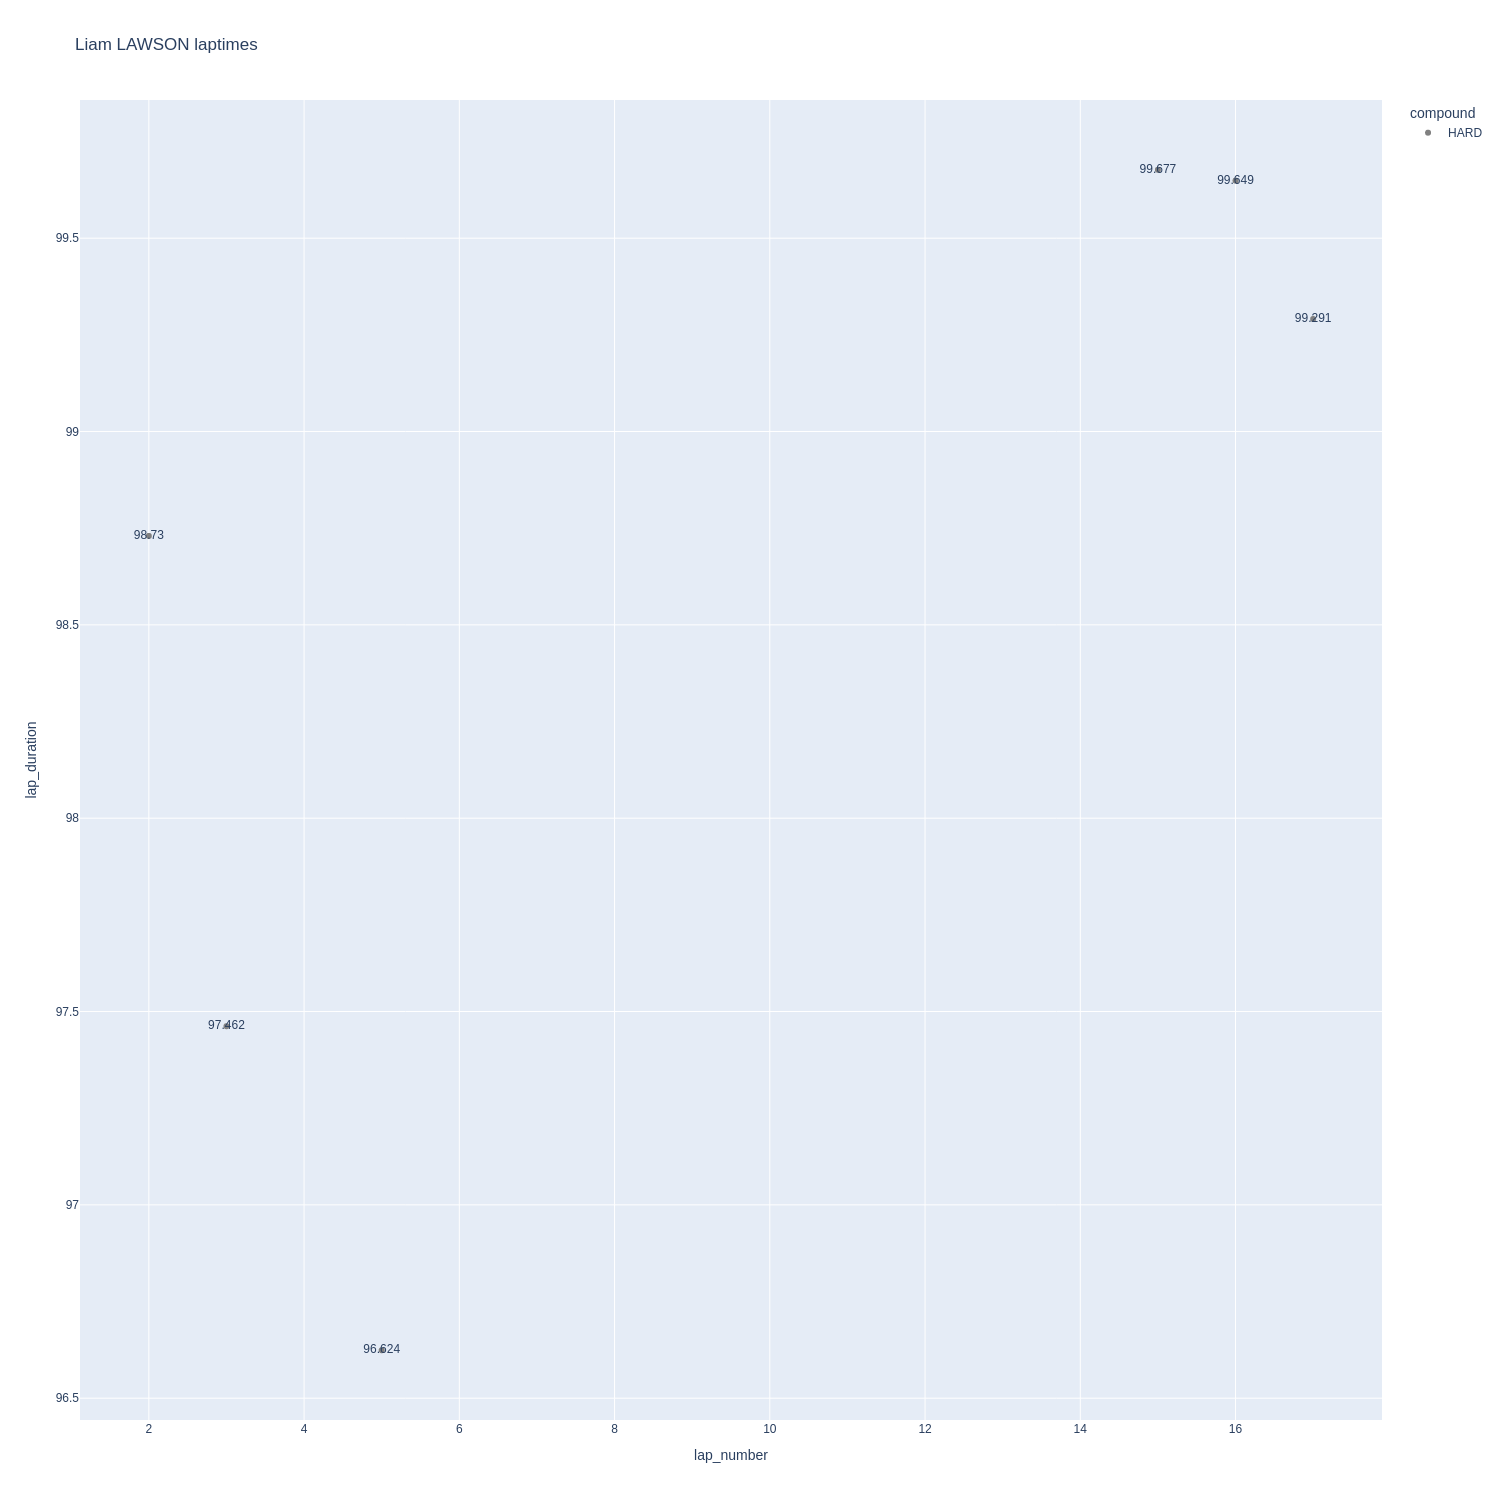

In [57]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

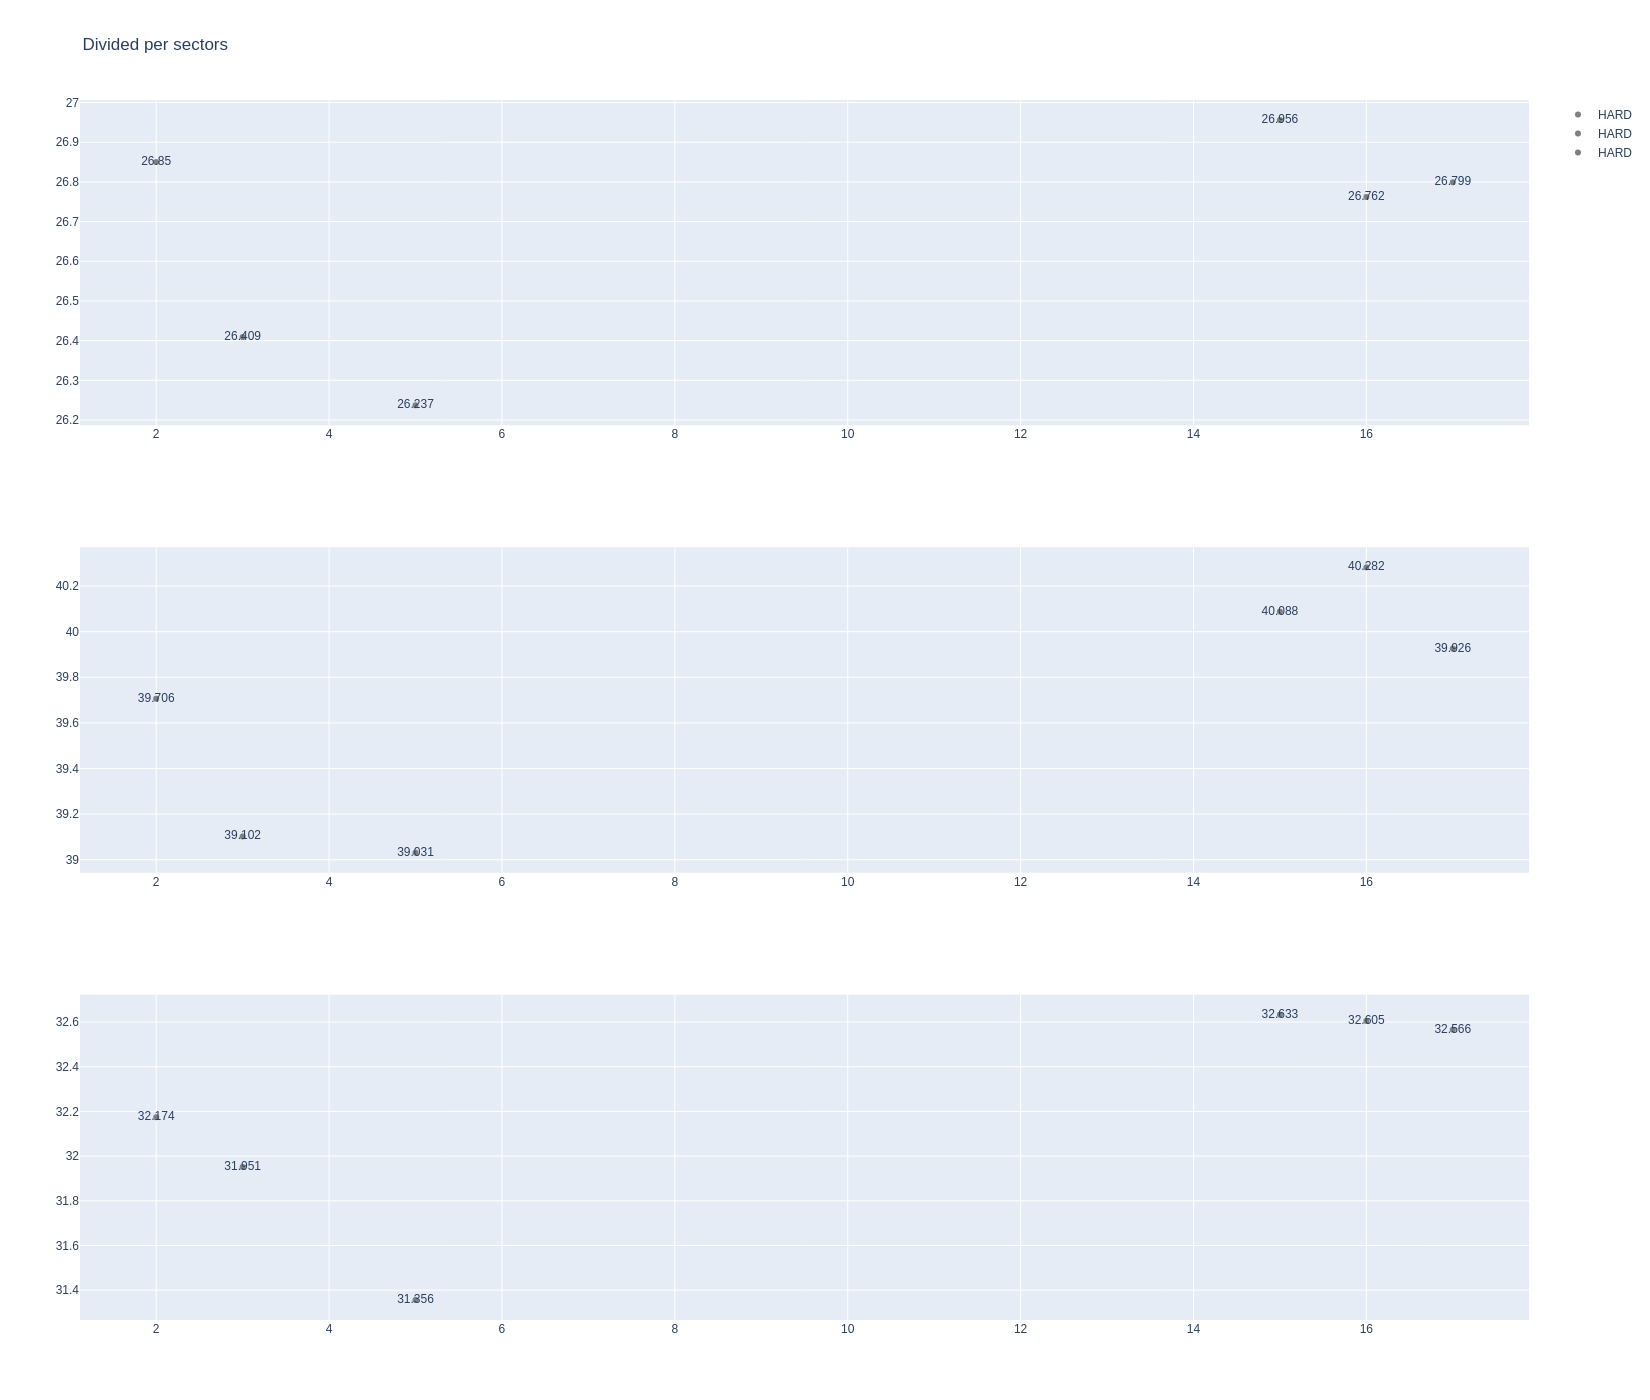

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [59]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1271         9878             1             87          1       10   
17         1271         9878             1             31          1       10   
25         1271         9878             2             87         11       13   
26         1271         9878             2             31         11       13   
43         1271         9878             3             87         14       20   
45         1271         9878             3             31         14       19   
63         1271         9878             4             87         21       27   
69         1271         9878             4             31         20       26   

   compound  tyre_age_at_start  
7      HARD                  0  
17     HARD                  0  
25     HARD                 10  
26     HARD                 10  
43     HARD                 13  
45     HARD                 13  
63     SOFT                  0  
69     SOFT                  0

In [60]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
23   Esteban OCON     HARD  2025-10-17T17:32:17.020000+00:00           2   
64   Esteban OCON     HARD  2025-10-17T17:36:30.972000+00:00           4   
104  Esteban OCON     HARD  2025-10-17T17:40:57.343000+00:00           6   
144  Esteban OCON     HARD  2025-10-17T17:45:23.399000+00:00           8   
215  Esteban OCON     HARD  2025-10-17T17:59:48.065000+00:00          12   
328  Esteban OCON     HARD  2025-10-17T18:11:14.918000+00:00          15   
339  Esteban OCON     HARD  2025-10-17T18:12:52.745000+00:00          16   
345  Esteban OCON     HARD  2025-10-17T18:14:31.510000+00:00          17   
347  Esteban OCON     HARD  2025-10-17T18:16:10.270000+00:00          18   
350  Esteban OCON     HARD  2025-10-17T18:17:48.589000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
23              26.998             40.127             32.403        99.528  
64              26.452             38.973             31.894        97.319  
104             26.260             38.852             31.717        96.829  
144             26.031             38.834             31.503        96.368  
215             25.954             38.701             31.644        96.299  
328             26.233             39.481             32.178        97.892  
339             26.540             39.869             32.197        98.606  
345             26.558             40.209             32.122        98.889  
347             26.539             39.726             32.060        98.325  
350             26.263             39.469             33.135        98.867

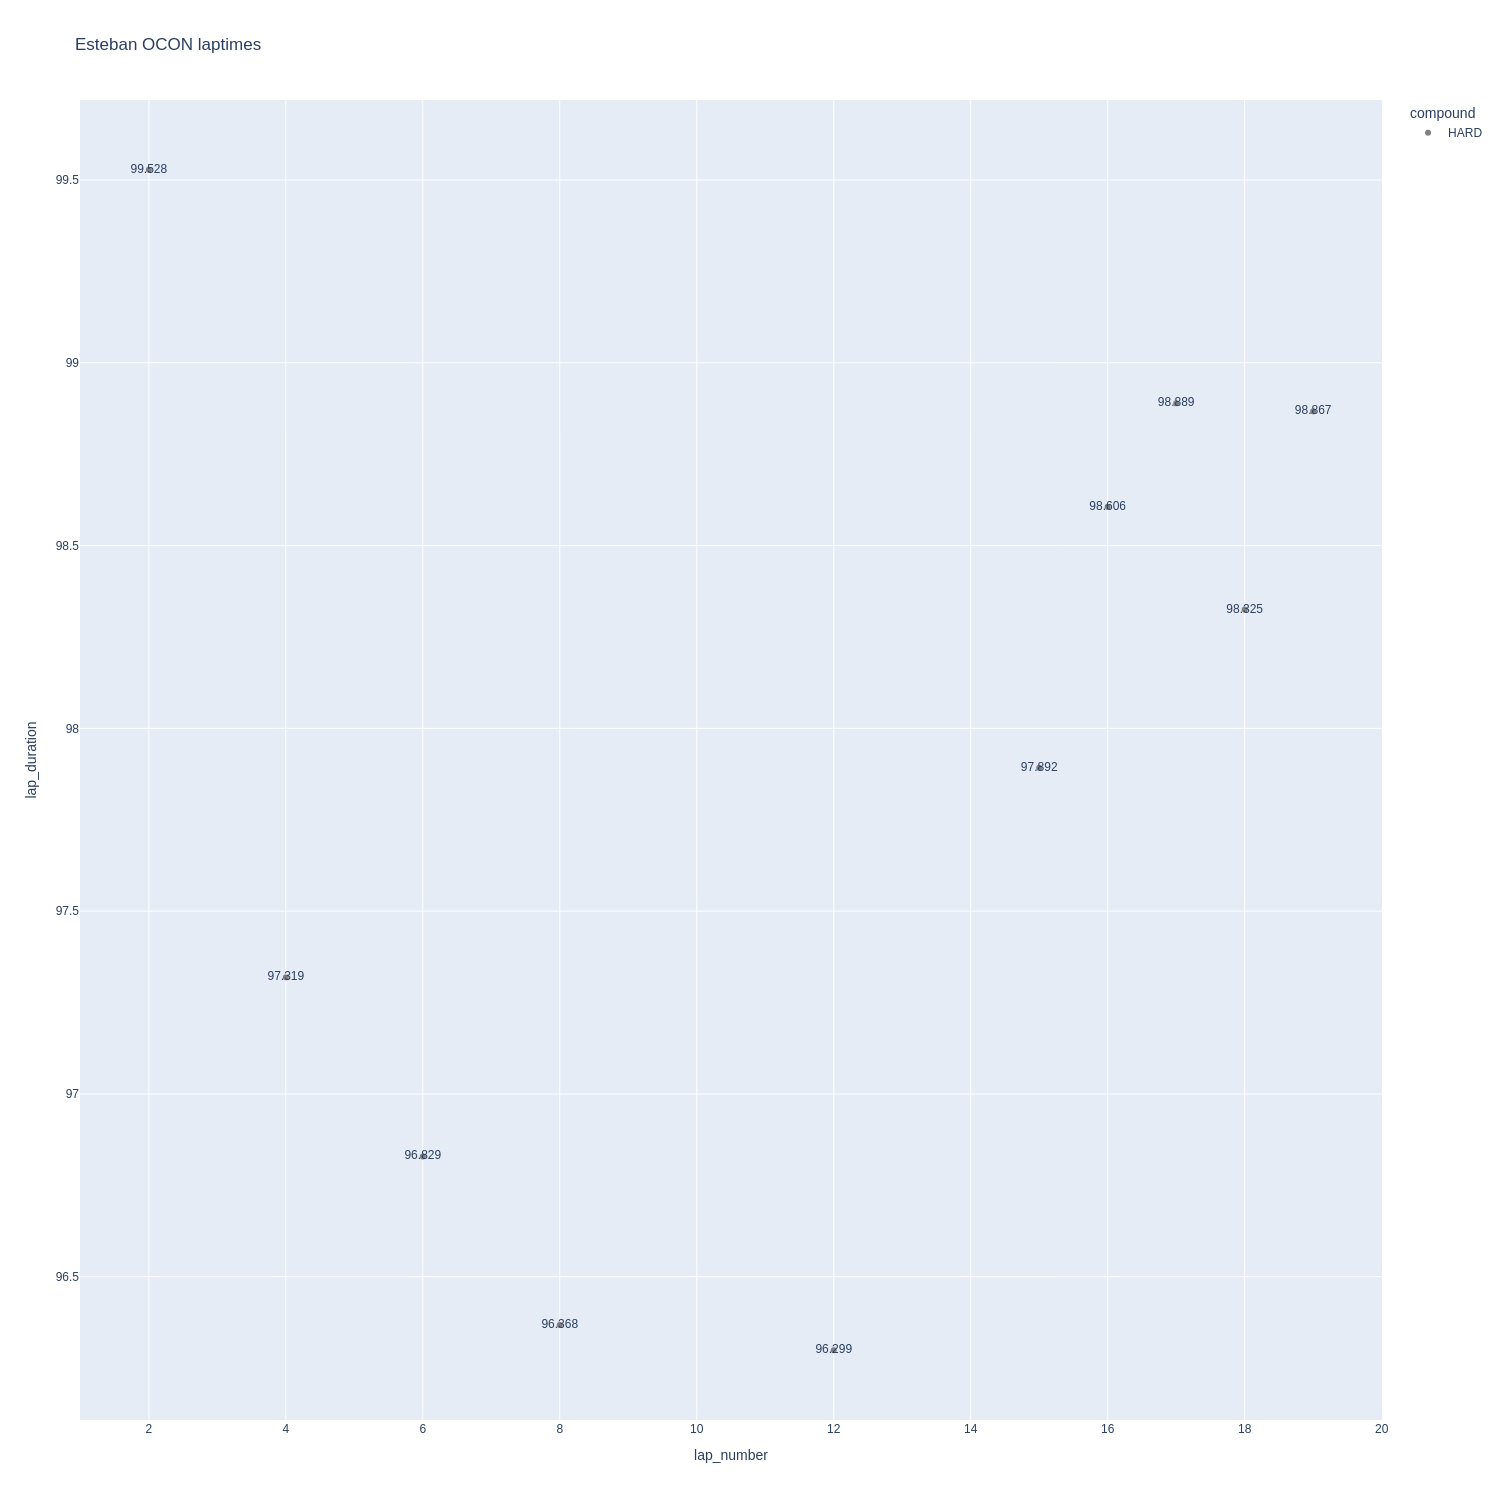

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

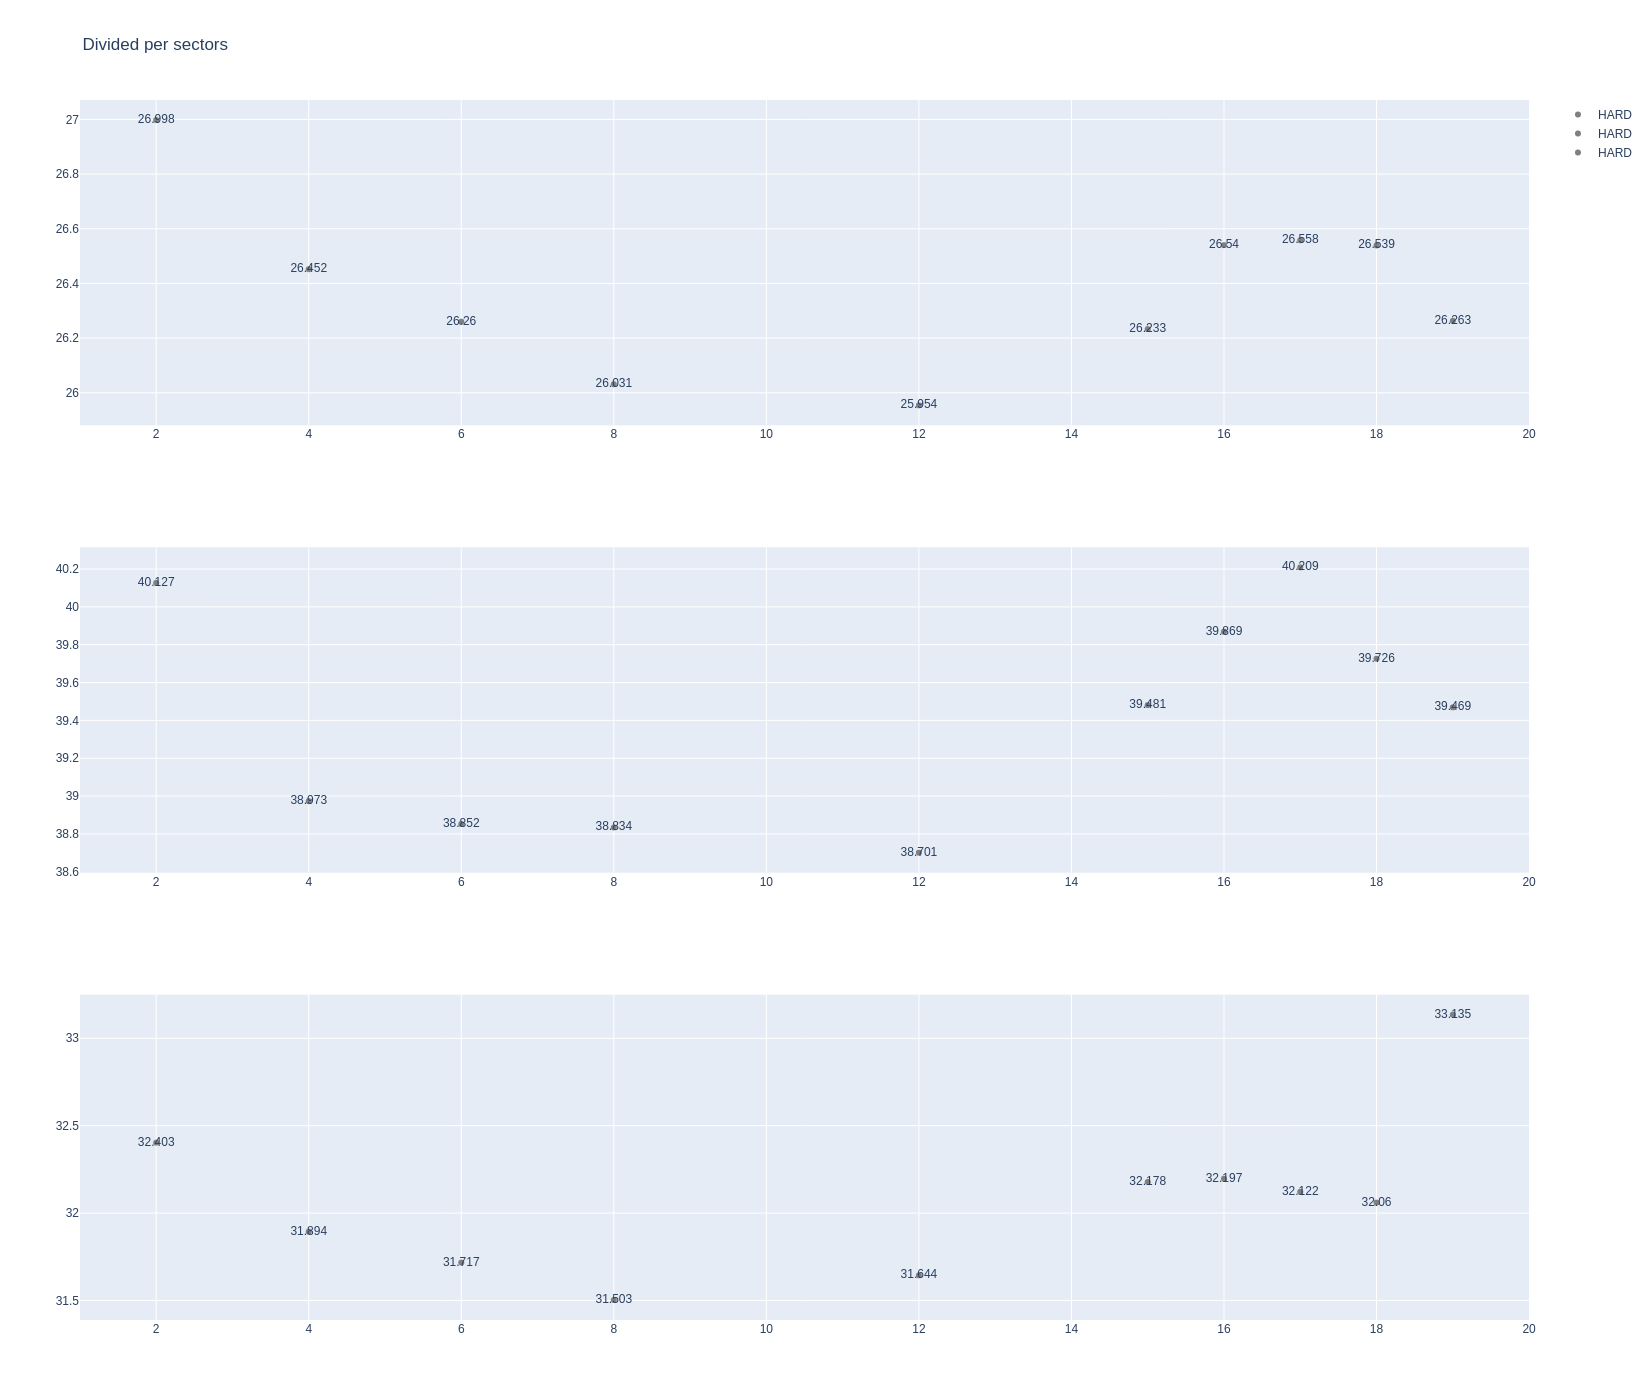

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [63]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
22   Oliver BEARMAN     HARD  2025-10-17T17:32:09.583000+00:00           2   
63   Oliver BEARMAN     HARD  2025-10-17T17:36:23.765000+00:00           4   
103  Oliver BEARMAN     HARD  2025-10-17T17:40:49.951000+00:00           6   
143  Oliver BEARMAN     HARD  2025-10-17T17:45:15.212000+00:00           8   
189  Oliver BEARMAN     HARD  2025-10-17T17:56:58.256000+00:00          12   
307  Oliver BEARMAN     HARD  2025-10-17T18:09:03.620000+00:00          15   
323  Oliver BEARMAN     HARD  2025-10-17T18:10:42.215000+00:00          16   
335  Oliver BEARMAN     HARD  2025-10-17T18:12:21.153000+00:00          17   
343  Oliver BEARMAN     HARD  2025-10-17T18:14:00.247000+00:00          18   
346  Oliver BEARMAN     HARD  2025-10-17T18:15:39.269000+00:00          19   
348  Oliver BEARMAN     HARD  2025-10-17T18:17:18.681000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
22              27.108             39.907             32.949        99.964  
63              26.714             39.111             32.002        97.827  
103             26.223             38.943             31.809        96.975  
143             26.341             38.989             31.636        96.966  
189             25.704             38.861             31.566        96.131  
307             26.556             39.632             32.327        98.515  
323             26.461             39.987             32.491        98.939  
335             26.620             40.114             32.352        99.086  
343             26.535             40.181             32.329        99.045  
346             26.491             40.220             32.363        99.074  
348             26.351             39.675             32.967        98.993

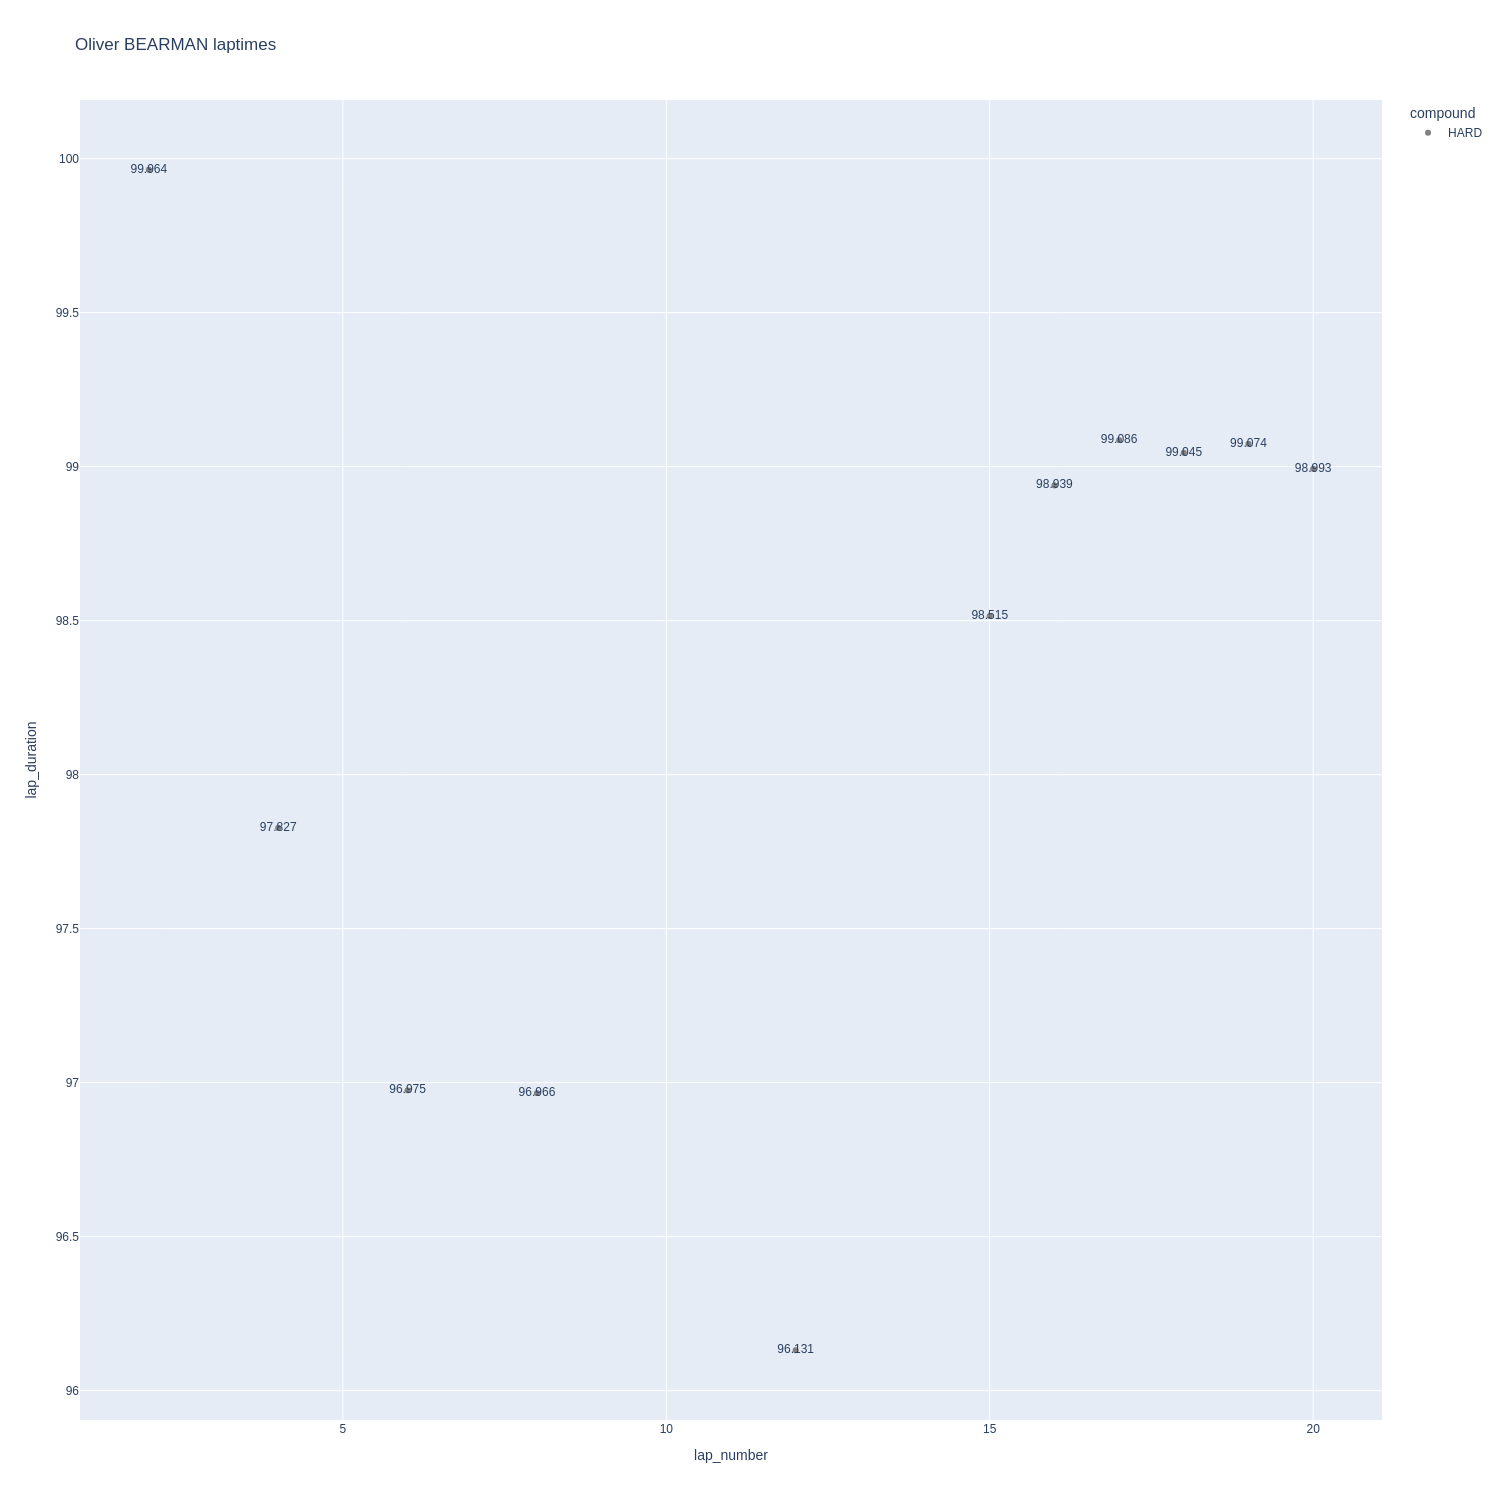

In [64]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

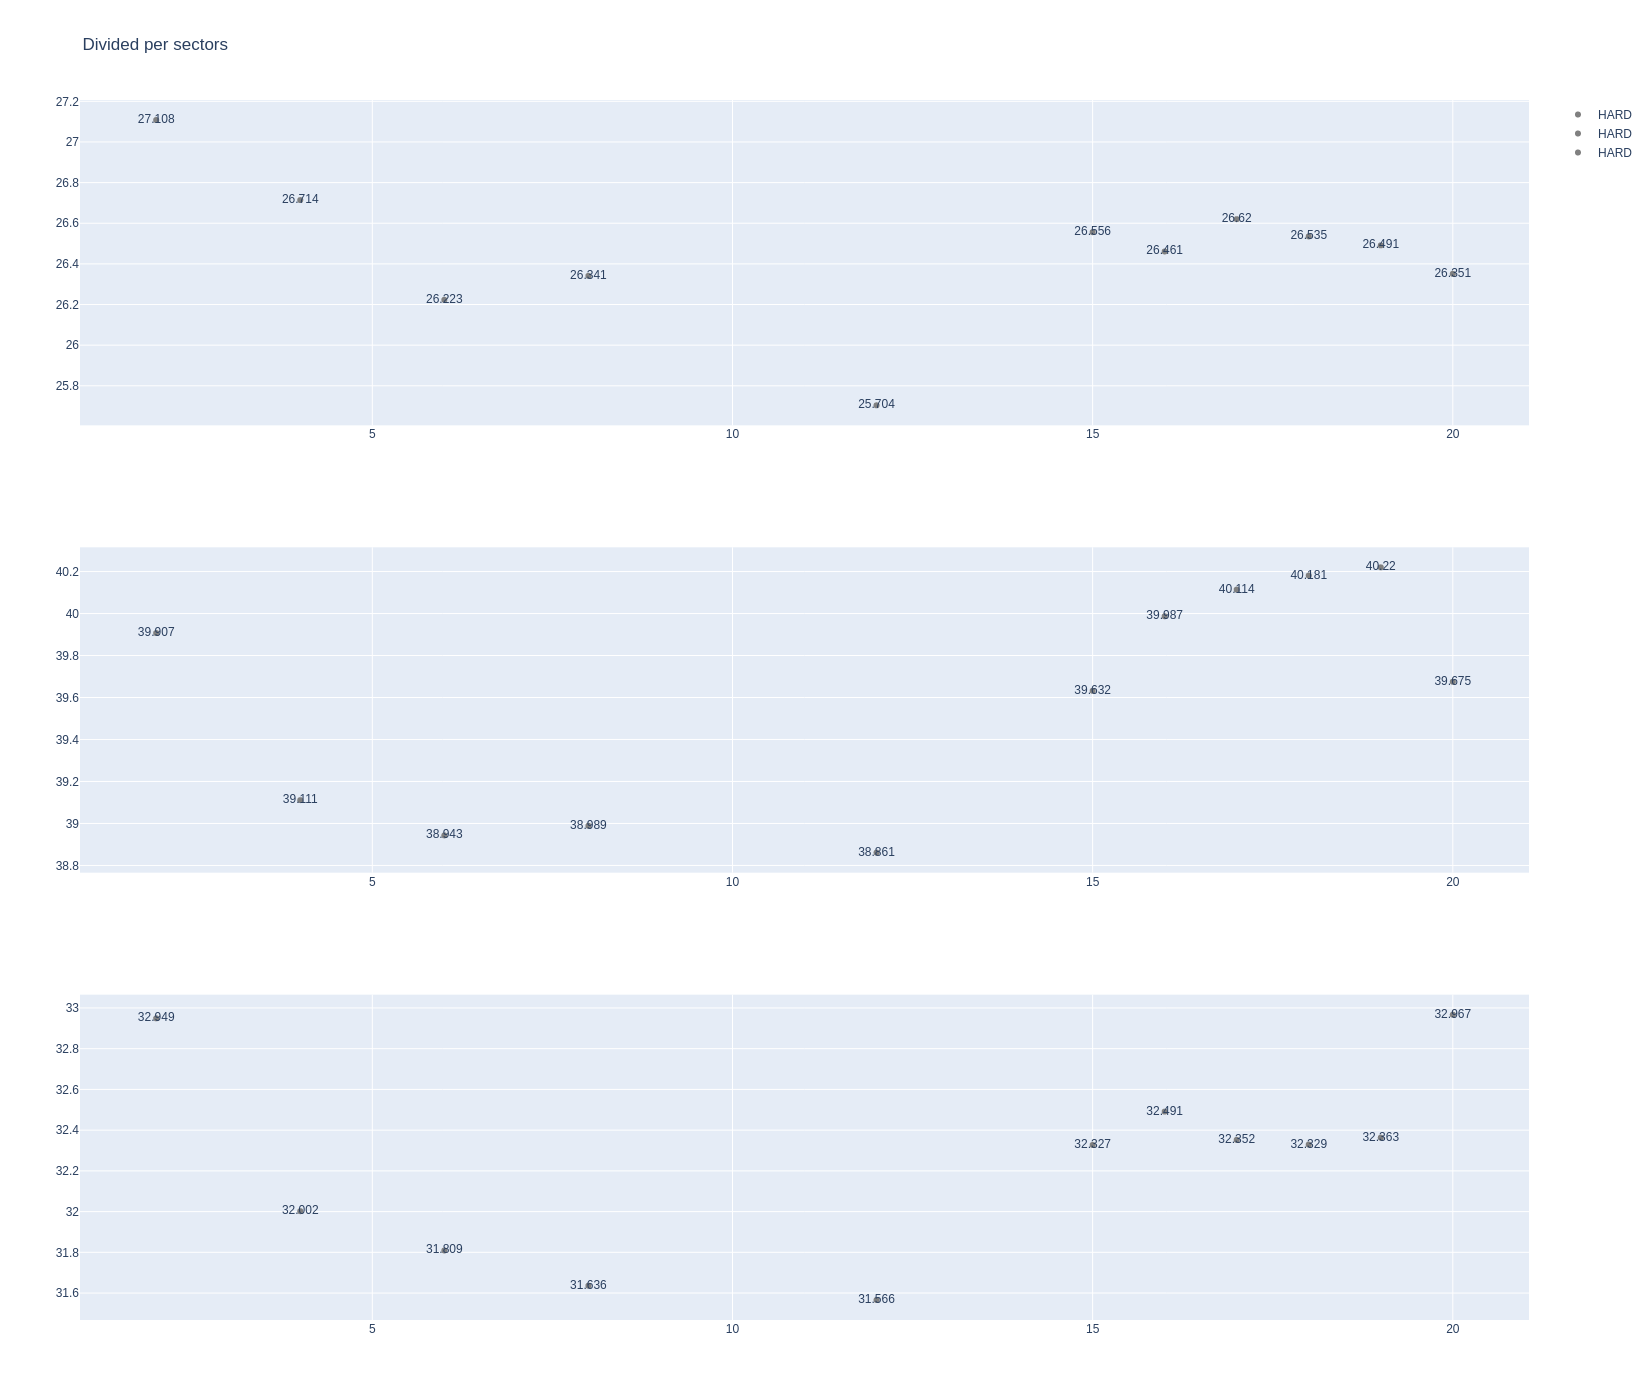

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [66]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1271         9878             1             10          1        9   
24         1271         9878             1             43          1       10   
34         1271         9878             2             10         10       17   
42         1271         9878             2             43         11       18   
48         1271         9878             3             10         18       20   
58         1271         9878             4             10         21       24   
65         1271         9878             3             43         19       25   

   compound  tyre_age_at_start  
16     HARD                  0  
24     HARD                  0  
34     HARD                  0  
42     HARD                 10  
48     SOFT                  0  
58     SOFT                  3  
65     SOFT                  0

In [67]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
72   Franco COLAPINTO     HARD  2025-10-17T17:37:32.276000+00:00           4   
112  Franco COLAPINTO     HARD  2025-10-17T17:41:46.646000+00:00           6   
173  Franco COLAPINTO     HARD  2025-10-17T17:48:45.644000+00:00           9   
243  Franco COLAPINTO     HARD  2025-10-17T18:02:42.818000+00:00          12   
258  Franco COLAPINTO     HARD  2025-10-17T18:04:21.429000+00:00          13   
293  Franco COLAPINTO     HARD  2025-10-17T18:07:44.300000+00:00          15   
310  Franco COLAPINTO     HARD  2025-10-17T18:09:22.169000+00:00          16   
326  Franco COLAPINTO     HARD  2025-10-17T18:11:00.699000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
72              27.302             39.738             32.229        99.269  
112             26.479             39.106             31.880        97.465  
173             26.275             39.267             31.588        97.130  
243             26.709             39.847             32.350        98.906  
258             26.599             39.731             33.252        99.582  
293             26.332             39.499             32.025        97.856  
310             26.478             39.879             32.172        98.529  
326             26.463             40.279             32.497        99.239

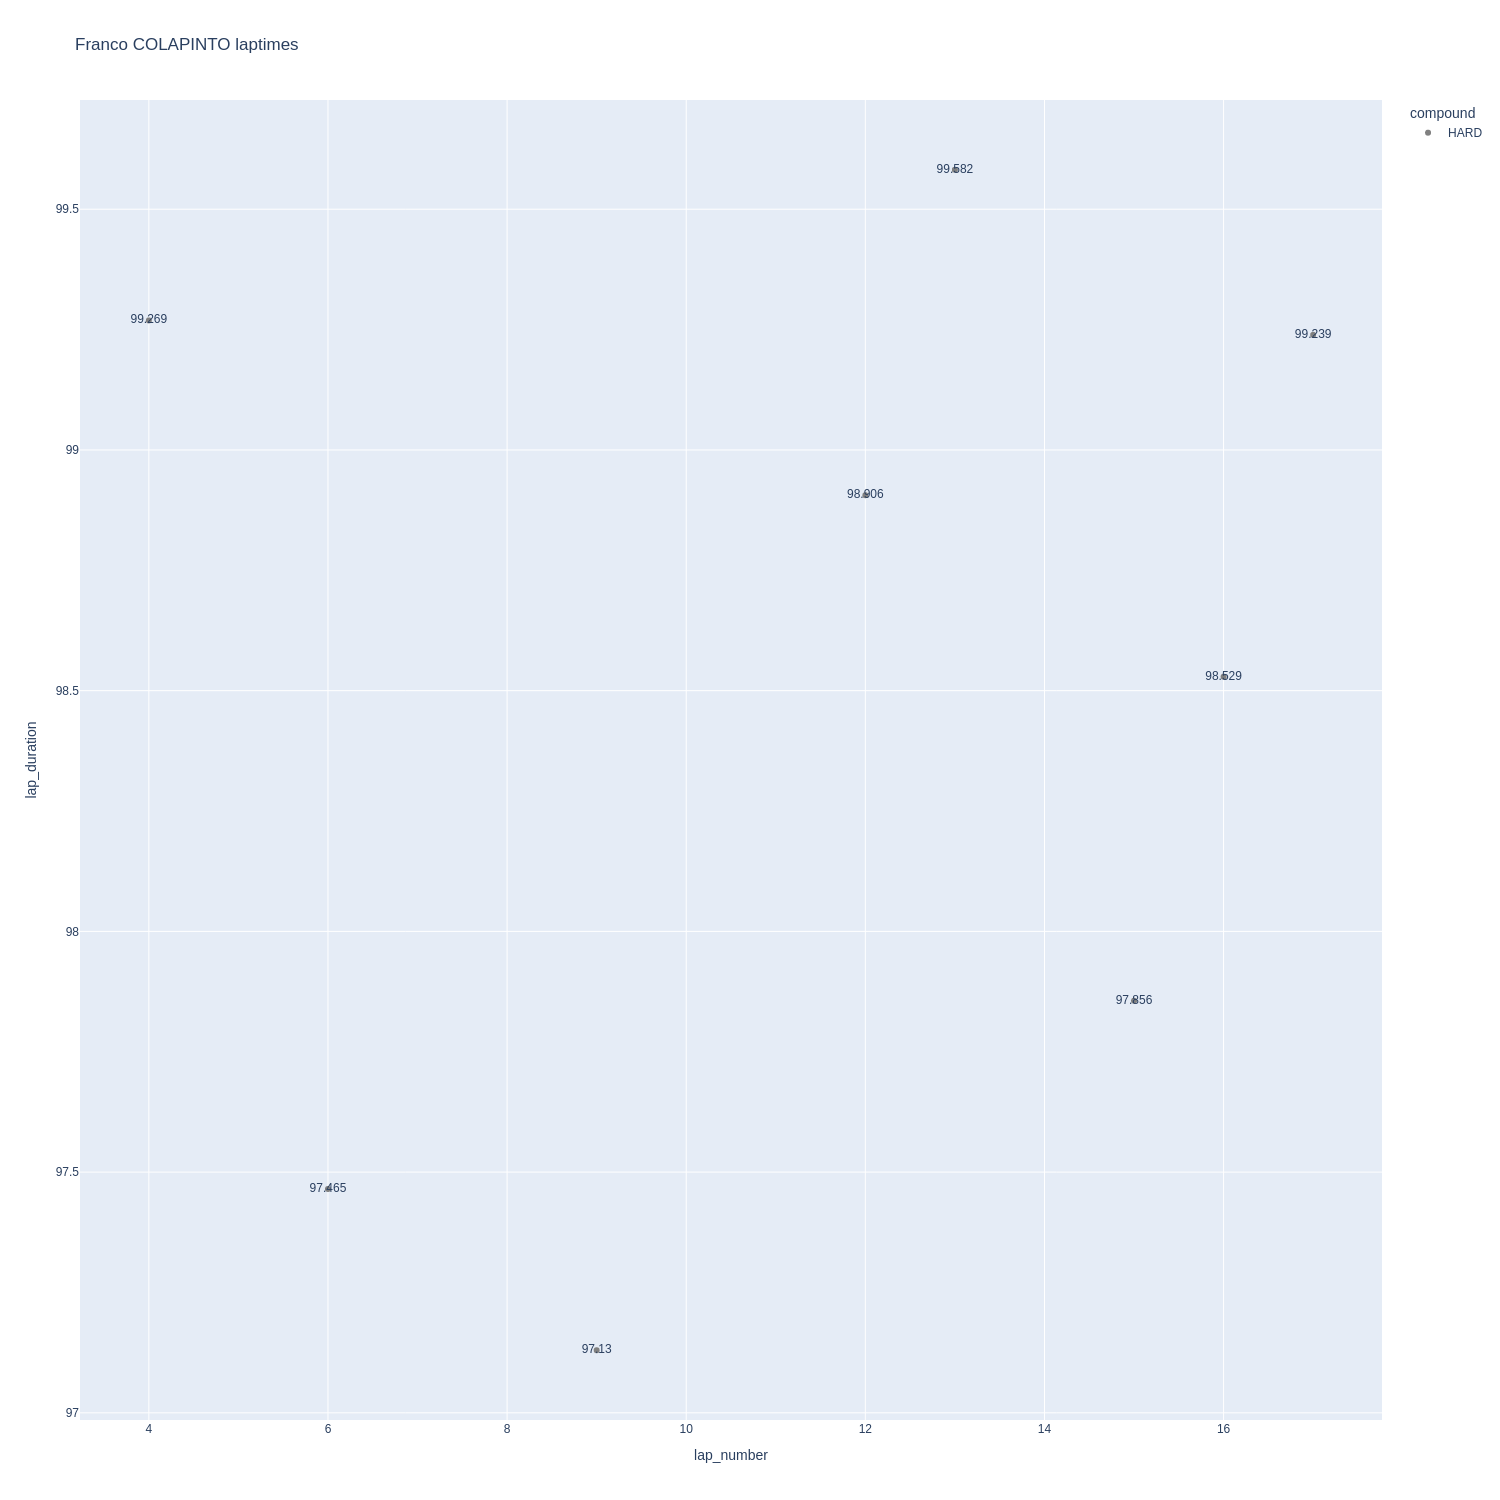

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

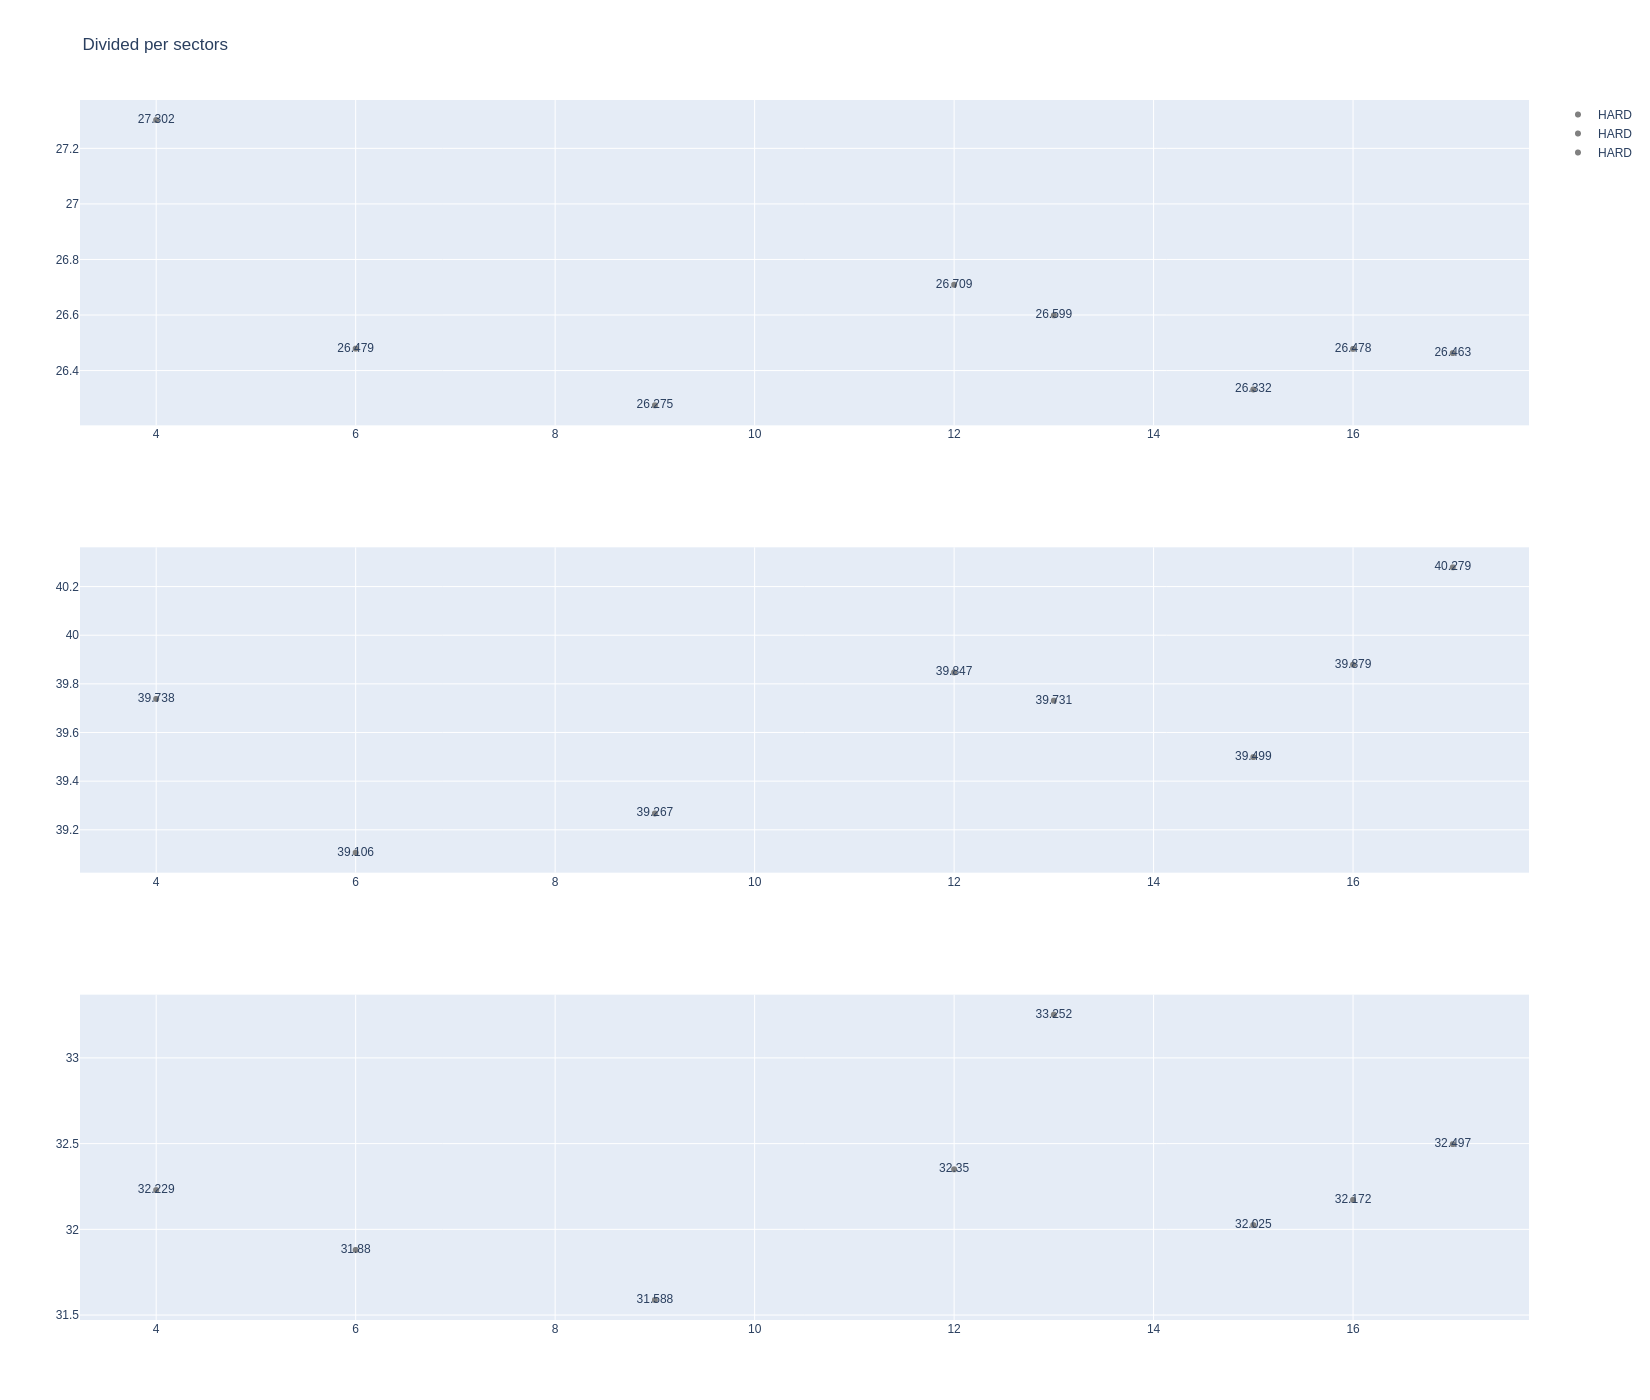

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [70]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
25   Pierre GASLY     HARD  2025-10-17T17:32:30.974000+00:00           2   
65   Pierre GASLY     HARD  2025-10-17T17:36:39.612000+00:00           4   
108  Pierre GASLY     HARD  2025-10-17T17:41:34.712000+00:00           6   
152  Pierre GASLY     HARD  2025-10-17T17:46:14.552000+00:00           8   
245  Pierre GASLY     HARD  2025-10-17T18:02:53.900000+00:00          13   
261  Pierre GASLY     HARD  2025-10-17T18:04:32.558000+00:00          14   
278  Pierre GASLY     HARD  2025-10-17T18:06:11.505000+00:00          15   
295  Pierre GASLY     HARD  2025-10-17T18:07:50.381000+00:00          16   
312  Pierre GASLY     HARD  2025-10-17T18:09:28.690000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
25              26.660             39.984             32.834        99.478  
65              26.182             39.303             32.436        97.921  
108             26.078             39.036             31.705        96.819  
152             26.113             38.869             31.559        96.541  
245             26.766             39.722             32.215        98.703  
261             26.421             40.116             32.287        98.824  
278             26.632             39.826             32.492        98.950  
295             26.471             39.684             32.215        98.370  
312             26.572             39.807             32.637        99.016

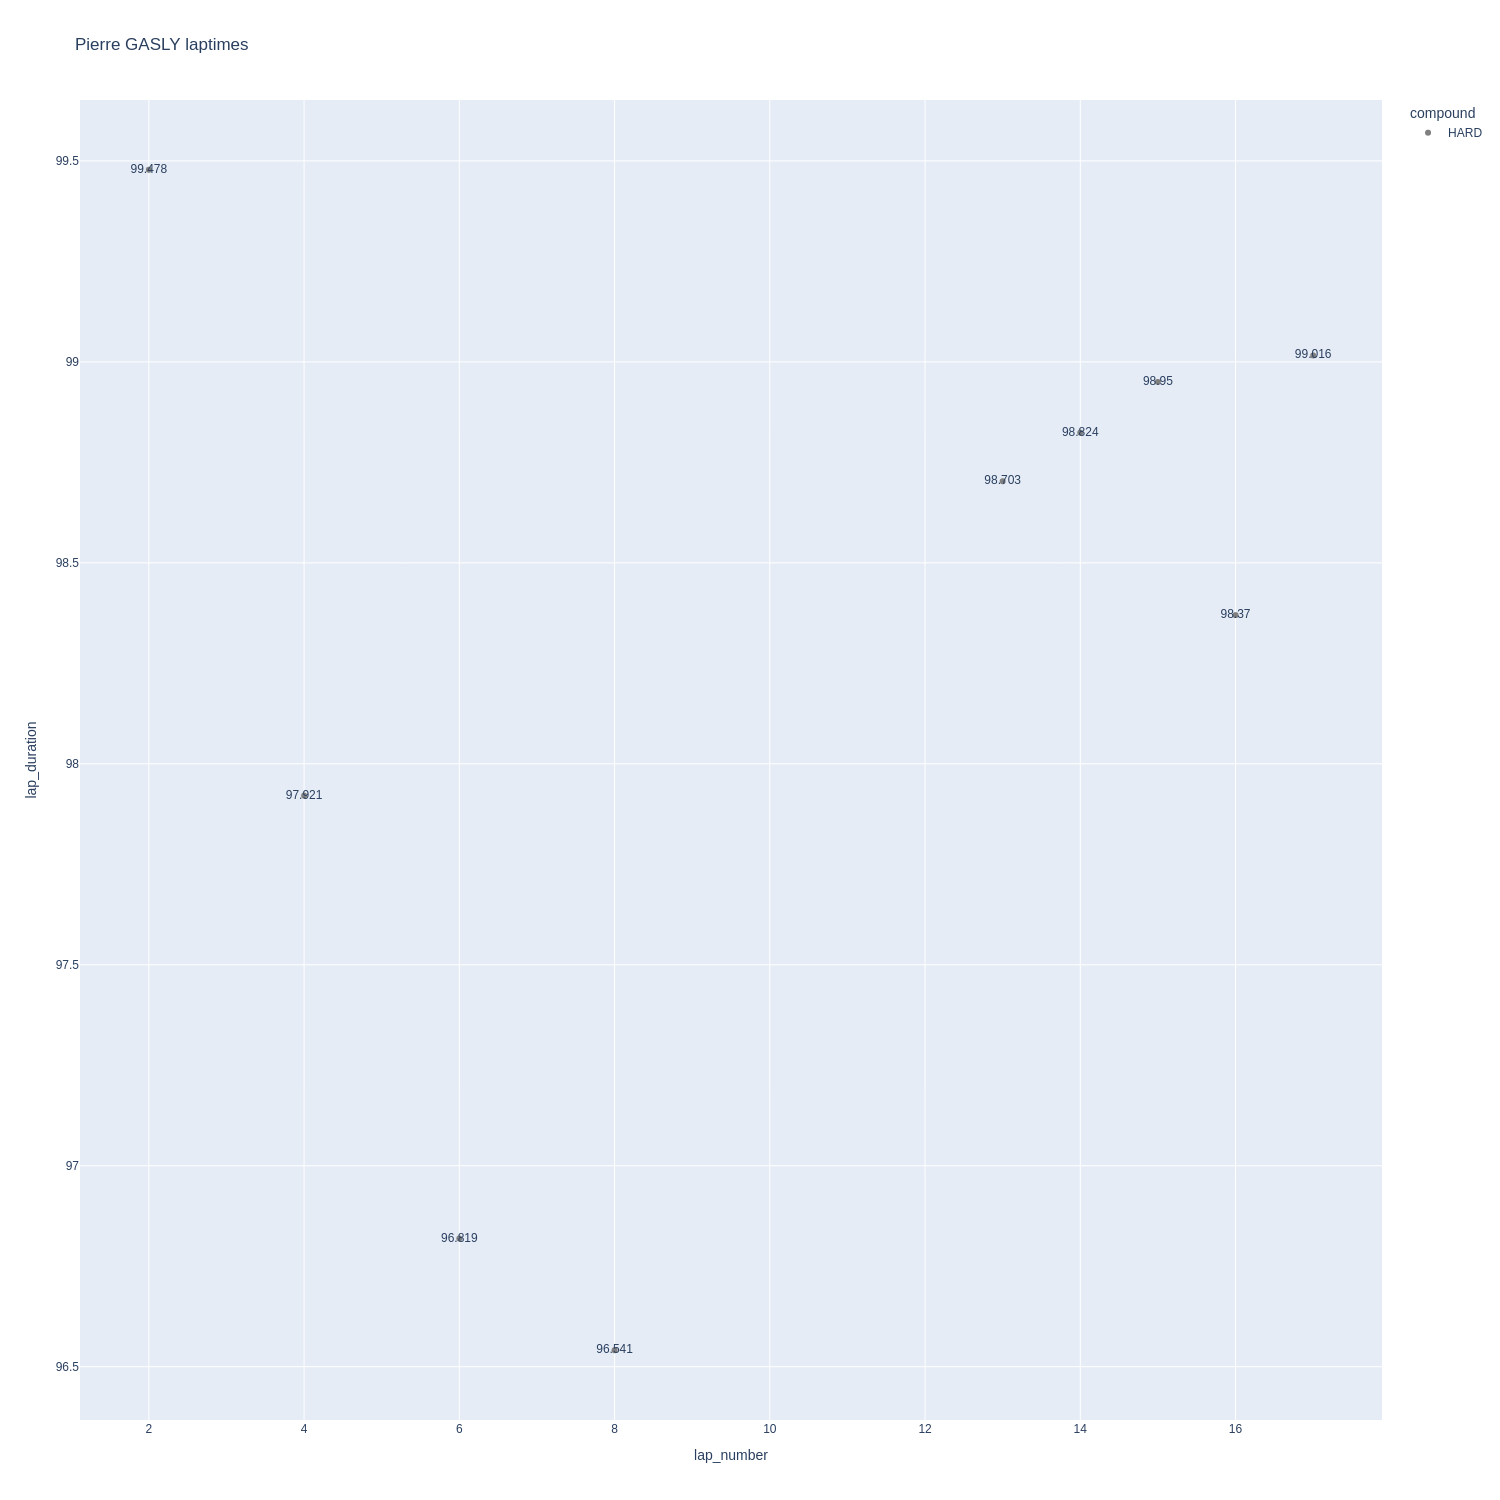

In [71]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

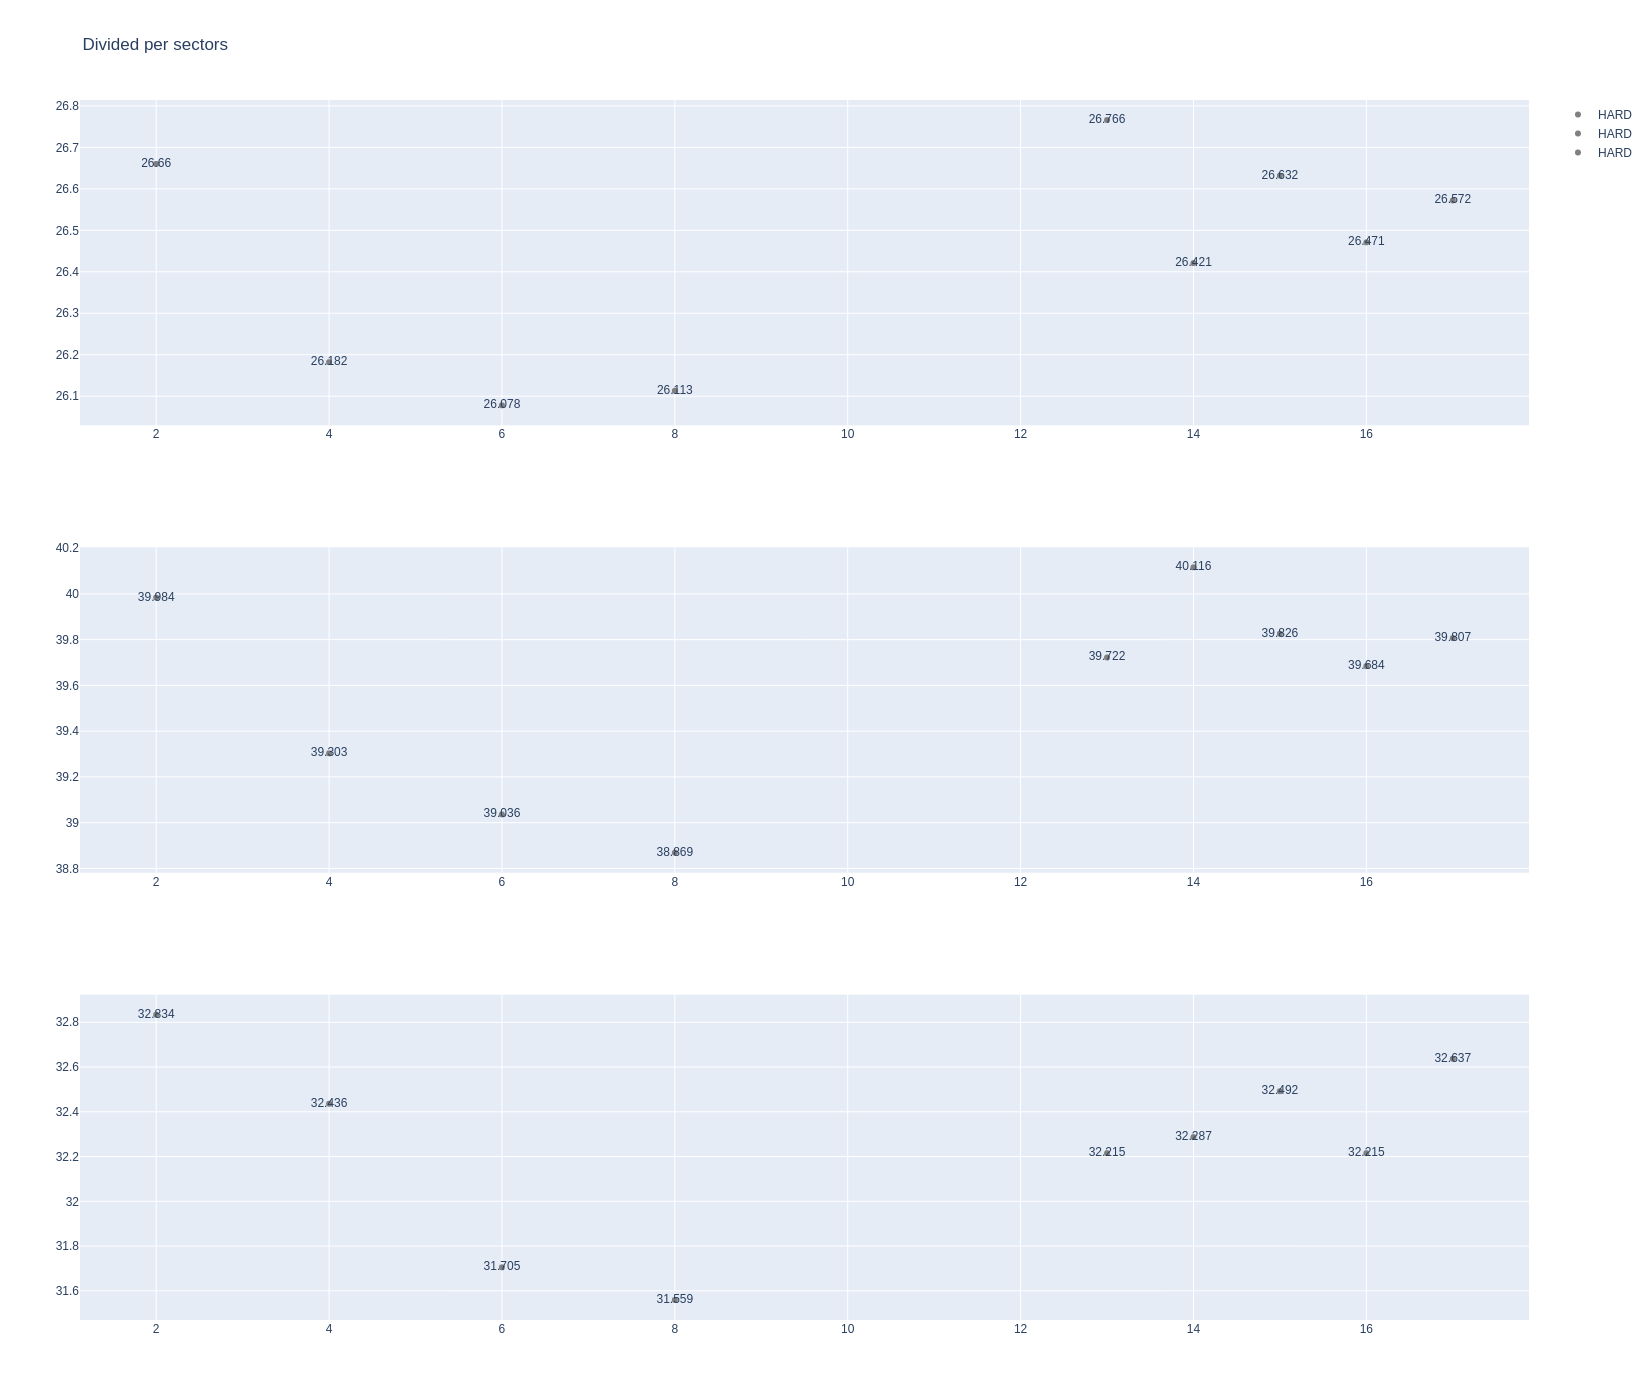

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [73]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1271         9878             1             55          1        9   
6          1271         9878             1             23          1        9   
31         1271         9878             2             23         10       19   
70         1271         9878             3             23         20       27   

   compound  tyre_age_at_start  
5      HARD                  0  
6      HARD                  0  
31     HARD                  9  
70     SOFT                  0

In [74]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
31   Alexander ALBON     HARD  2025-10-17T17:33:14.575000+00:00           2   
68   Alexander ALBON     HARD  2025-10-17T17:37:13.179000+00:00           4   
115  Alexander ALBON     HARD  2025-10-17T17:41:58.508000+00:00           6   
188  Alexander ALBON     HARD  2025-10-17T17:56:50.773000+00:00          11   
224  Alexander ALBON     HARD  2025-10-17T18:00:55.300000+00:00          13   
241  Alexander ALBON     HARD  2025-10-17T18:02:34.868000+00:00          14   
256  Alexander ALBON     HARD  2025-10-17T18:04:13.679000+00:00          15   
273  Alexander ALBON     HARD  2025-10-17T18:05:52.052000+00:00          16   
291  Alexander ALBON     HARD  2025-10-17T18:07:30.297000+00:00          17   
308  Alexander ALBON     HARD  2025-10-17T18:09:08.613000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
31              27.435             39.330             31.873        98.638  
68              25.948             39.096             31.333        96.377  
115             26.116             38.608             33.363        98.087  
188             25.906             39.134             34.507        99.547  
224             26.981             39.801             32.709        99.491  
241             26.669             39.738             32.368        98.775  
256             26.633             39.622             32.172        98.427  
273             26.495             39.634             32.099        98.228  
291             26.525             39.539             32.206        98.270  
308             26.430             39.631             32.286        98.347

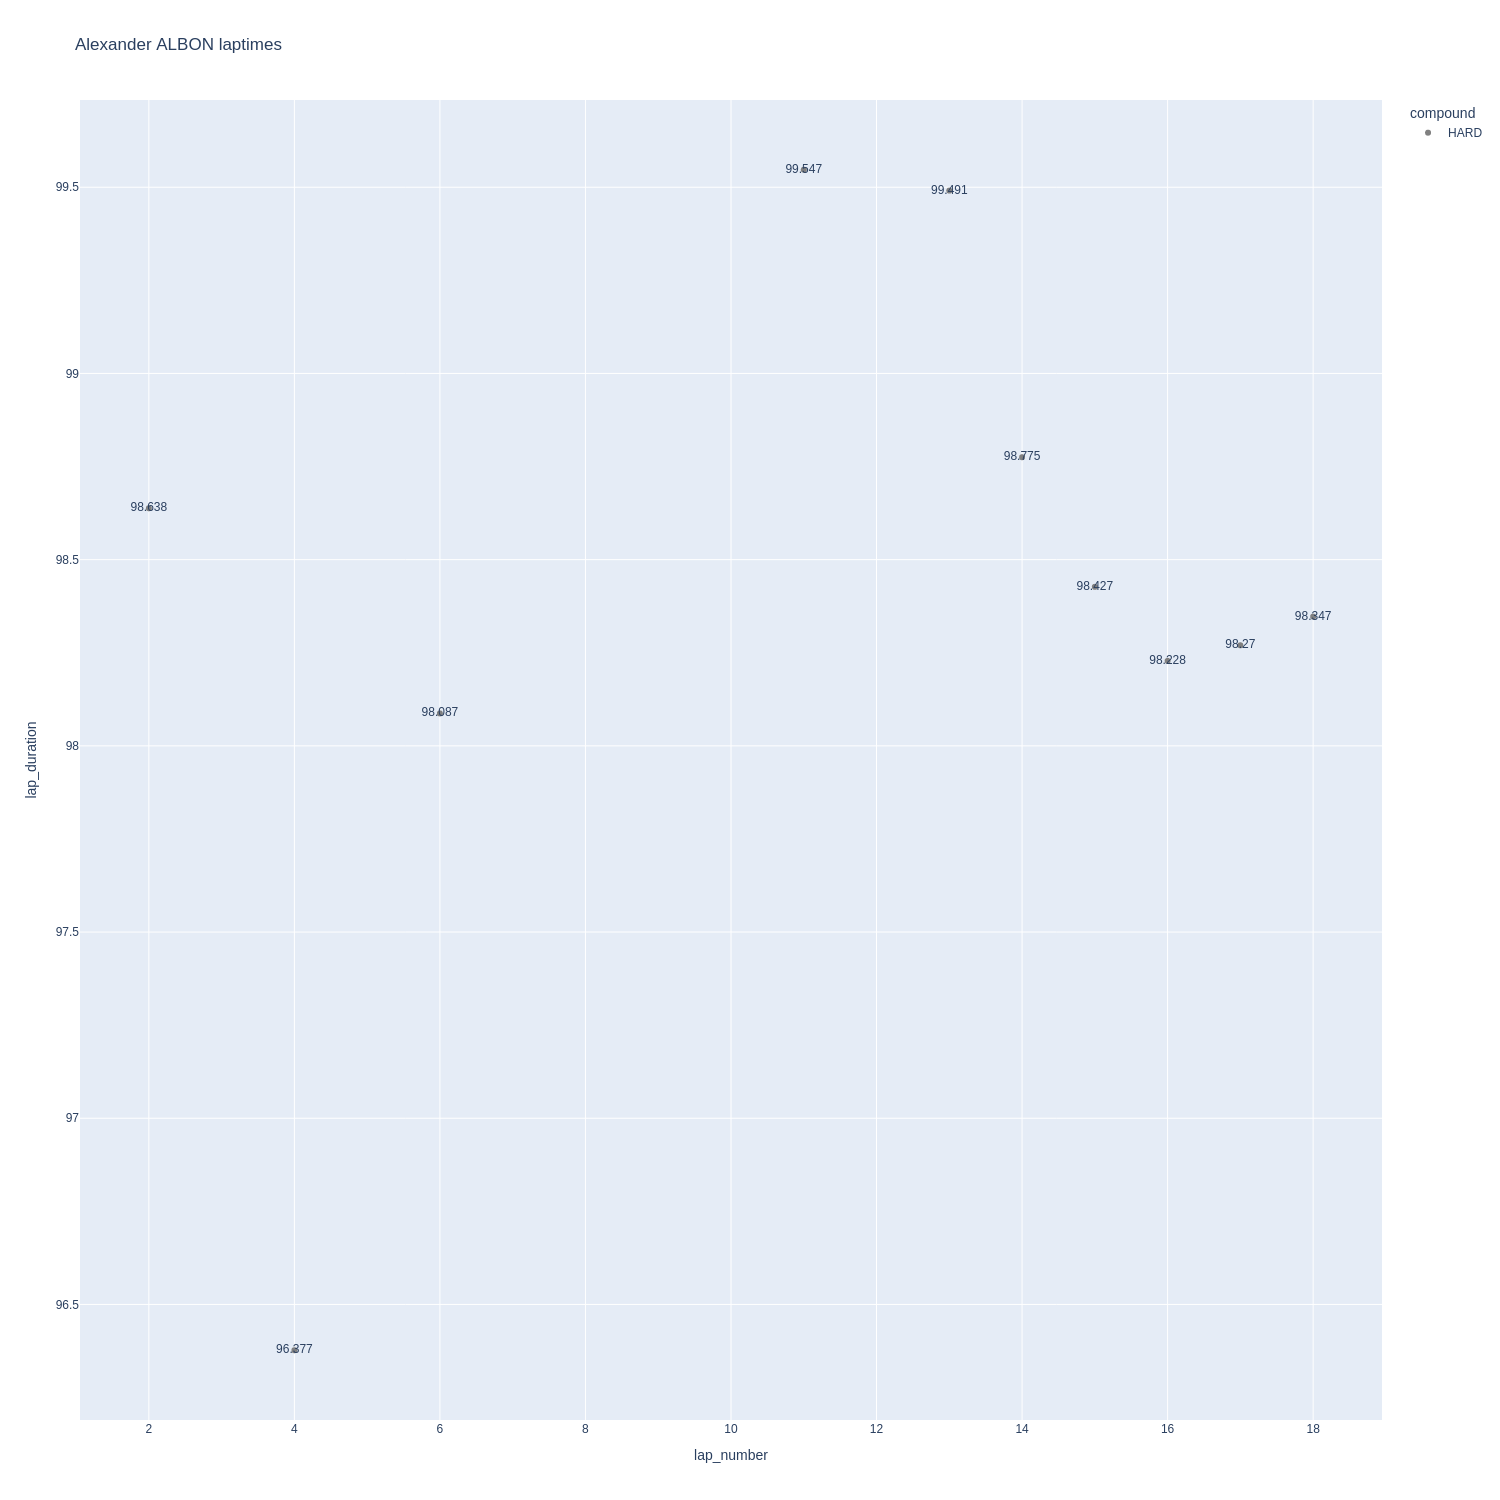

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

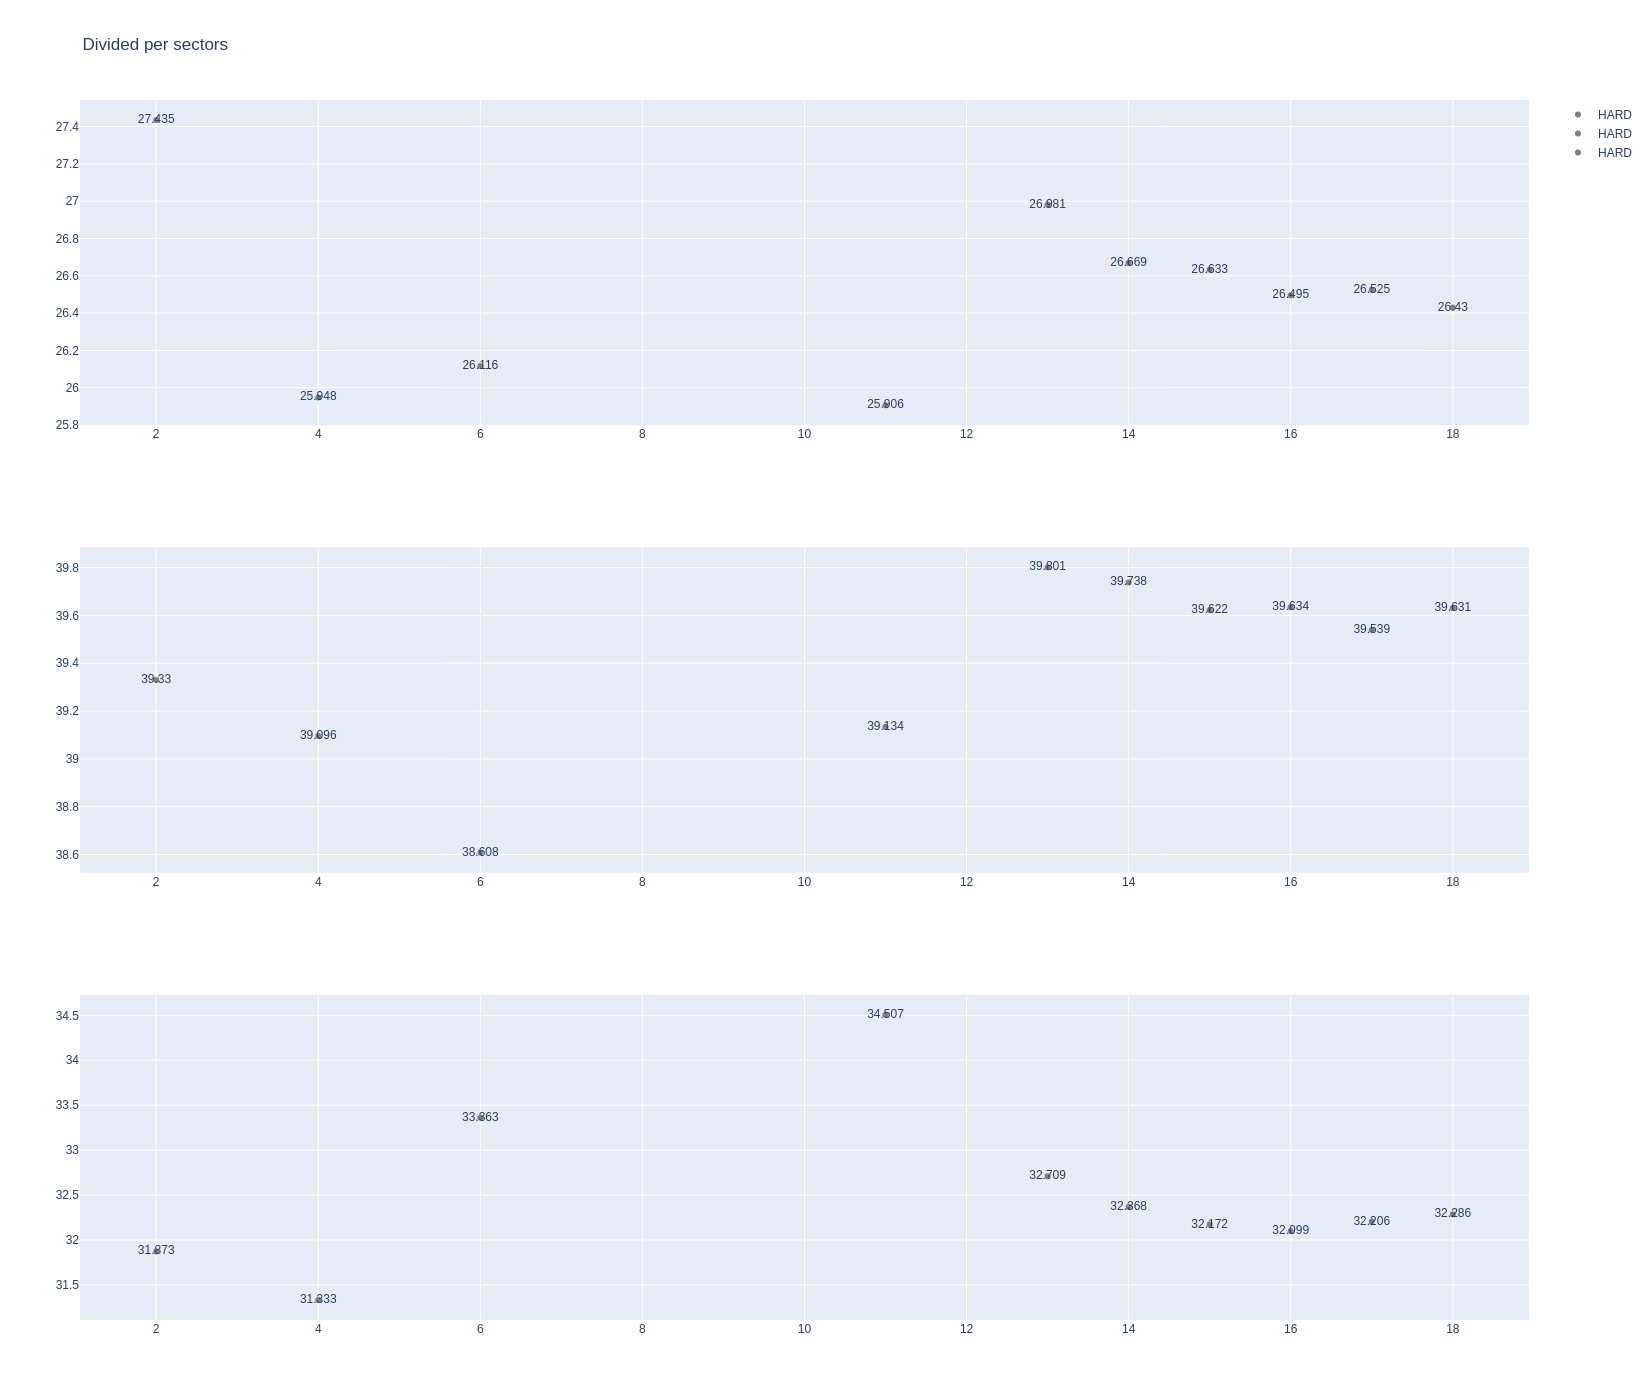

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [77]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
27  Carlos SAINZ     HARD  2025-10-17T17:32:47.005000+00:00           2   
67  Carlos SAINZ     HARD  2025-10-17T17:36:56.597000+00:00           4   

    duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
27             26.471             39.080             31.935        97.486  
67             25.997             38.828             31.305        96.130

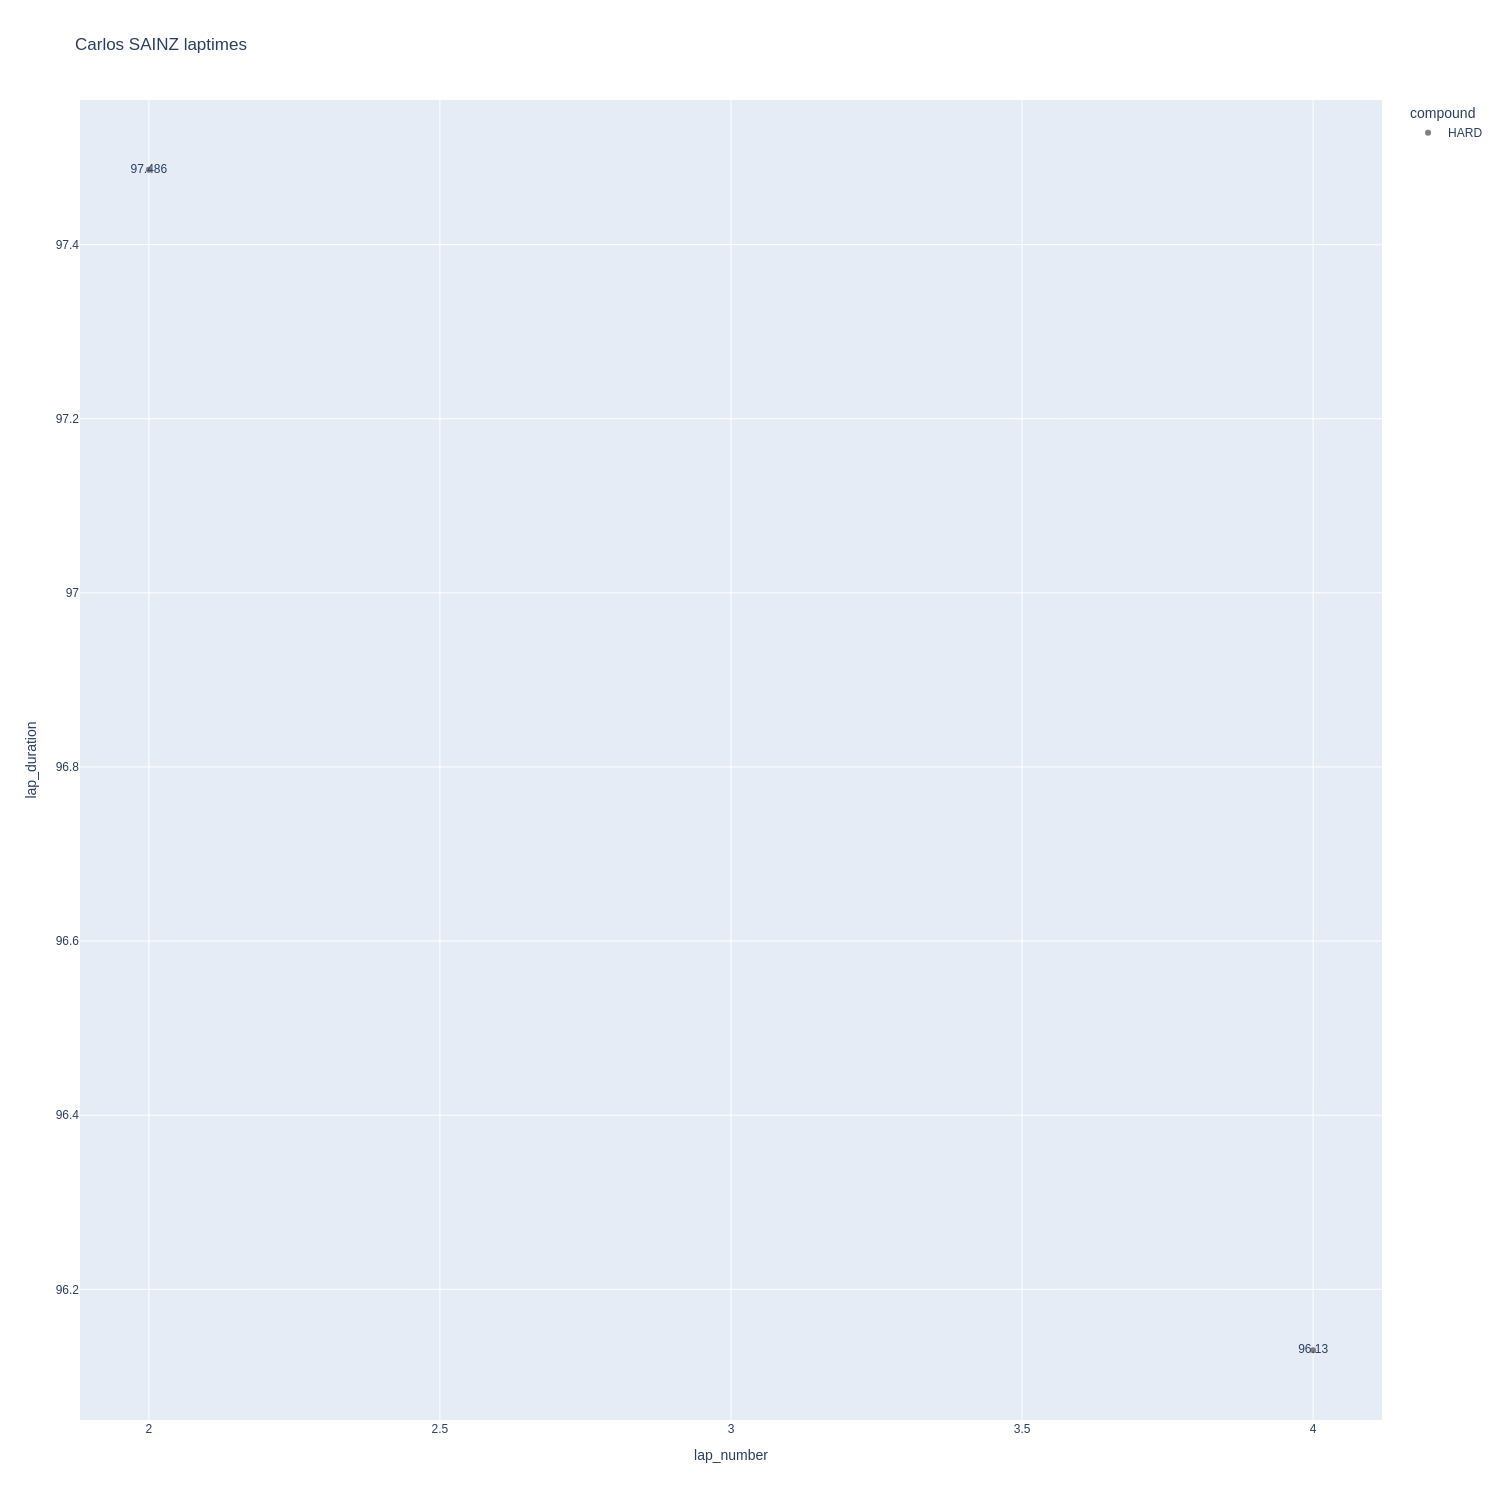

In [78]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

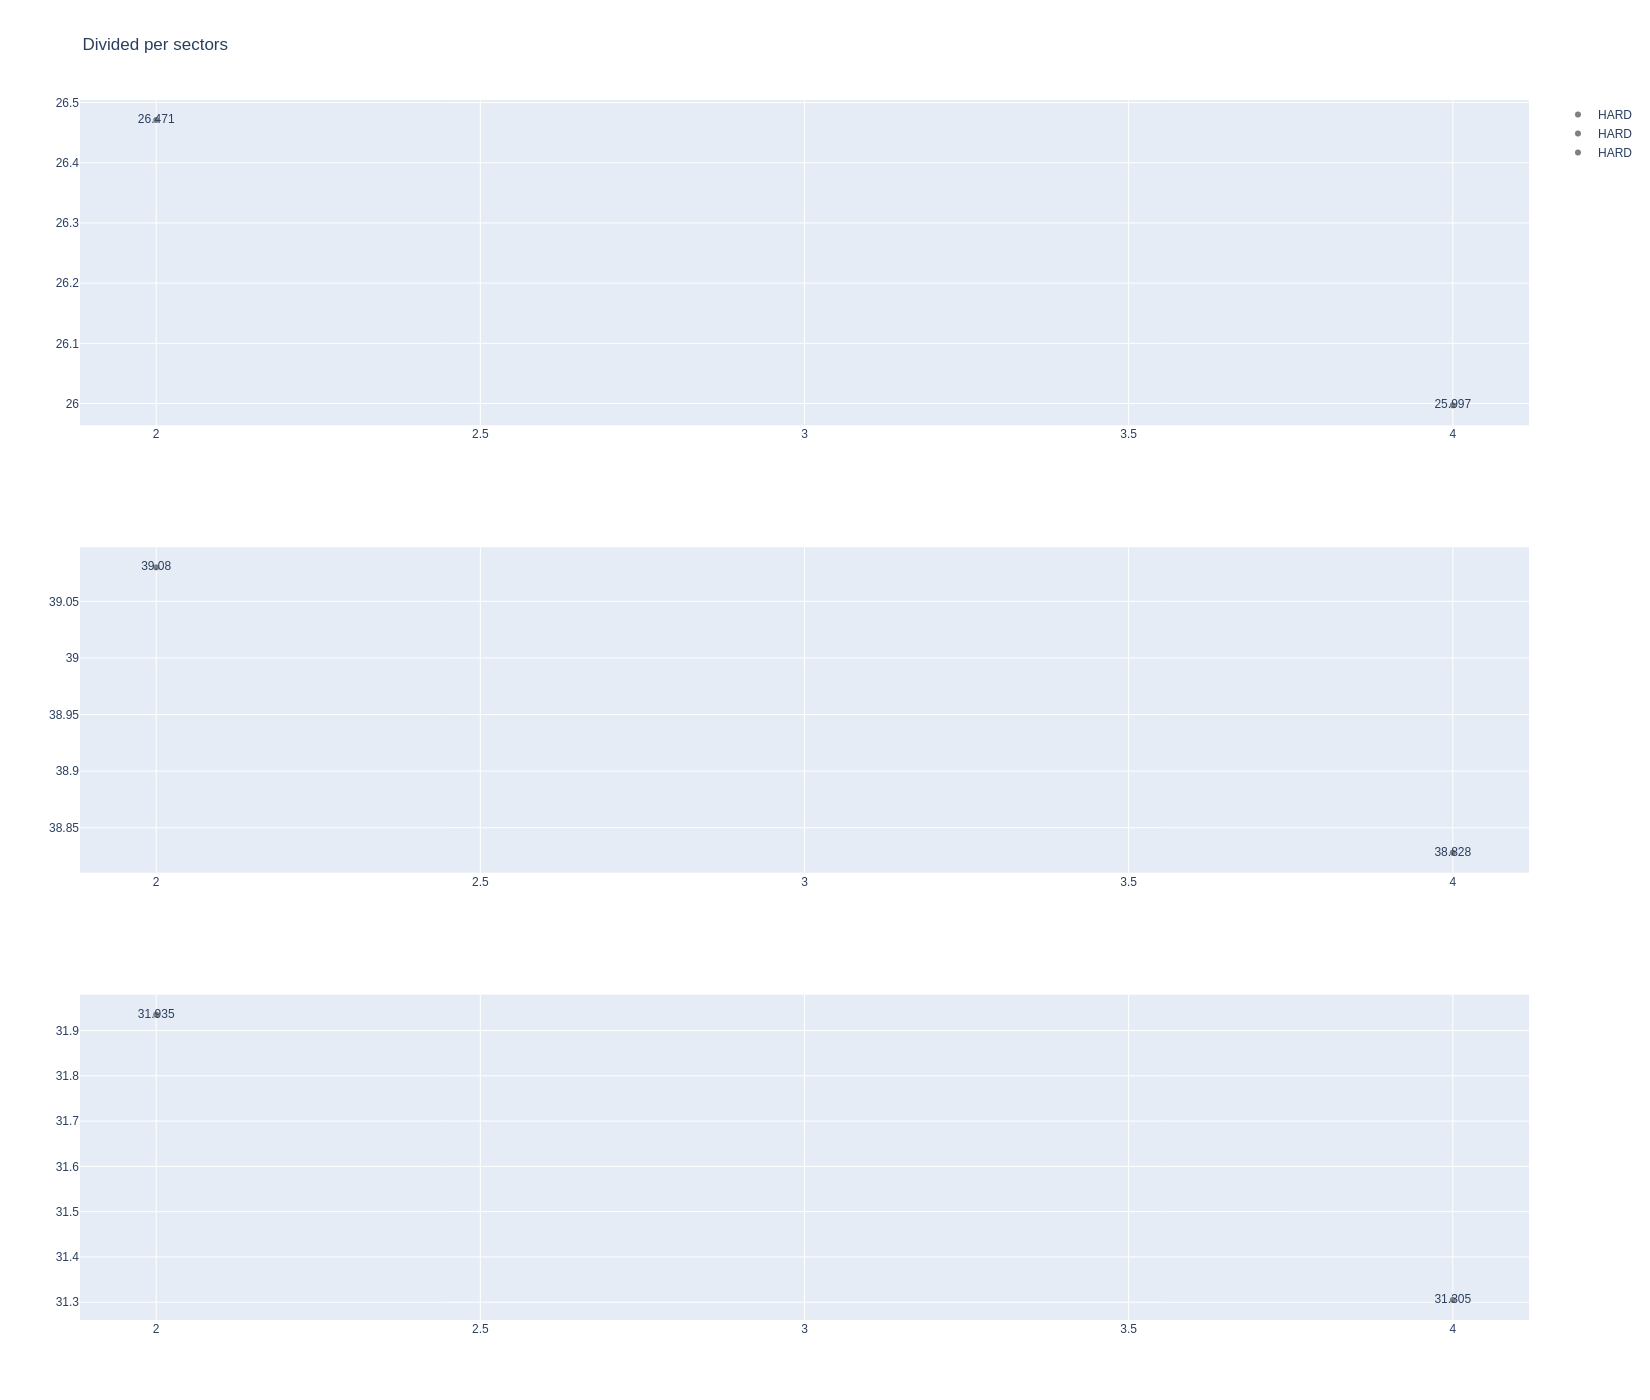

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [80]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
20         1271         9878             1              5          1        8   
21         1271         9878             1             27          1        8   
41         1271         9878             2              5          9       17   
44         1271         9878             2             27          9       17   
52         1271         9878             3             27         18       20   
66         1271         9878             3              5         18       24   
67         1271         9878             4             27         21       24   

   compound  tyre_age_at_start  
20     HARD                  0  
21     HARD                  0  
41     HARD                  8  
44     HARD                  8  
52     SOFT                  0  
66     SOFT                  0  
67     SOFT                  0

In [81]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
32   Nico HULKENBERG     HARD  2025-10-17T17:33:20.331000+00:00           2   
71   Nico HULKENBERG     HARD  2025-10-17T17:37:26.372000+00:00           4   
110  Nico HULKENBERG     HARD  2025-10-17T17:41:41.449000+00:00           6   
147  Nico HULKENBERG     HARD  2025-10-17T17:45:45.206000+00:00           8   
263  Nico HULKENBERG     HARD  2025-10-17T18:04:40.188000+00:00          12   
280  Nico HULKENBERG     HARD  2025-10-17T18:06:19.349000+00:00          13   
297  Nico HULKENBERG     HARD  2025-10-17T18:07:58.132000+00:00          14   
314  Nico HULKENBERG     HARD  2025-10-17T18:09:37.179000+00:00          15   
329  Nico HULKENBERG     HARD  2025-10-17T18:11:16.058000+00:00          16   
340  Nico HULKENBERG     HARD  2025-10-17T18:12:54.589000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
32              27.173             39.799             32.458        99.430  
71              26.358             39.295             31.641        97.294  
110             26.144             38.597             31.378        96.119  
147             26.016             38.651             35.016        99.683  
263             26.780             40.023             32.389        99.192  
280             26.603             39.811             32.412        98.826  
297             26.539             39.981             32.477        98.997  
314             26.803             39.628             32.454        98.885  
329             26.857             39.658             32.014        98.529  
340             26.417             39.535             33.659        99.611

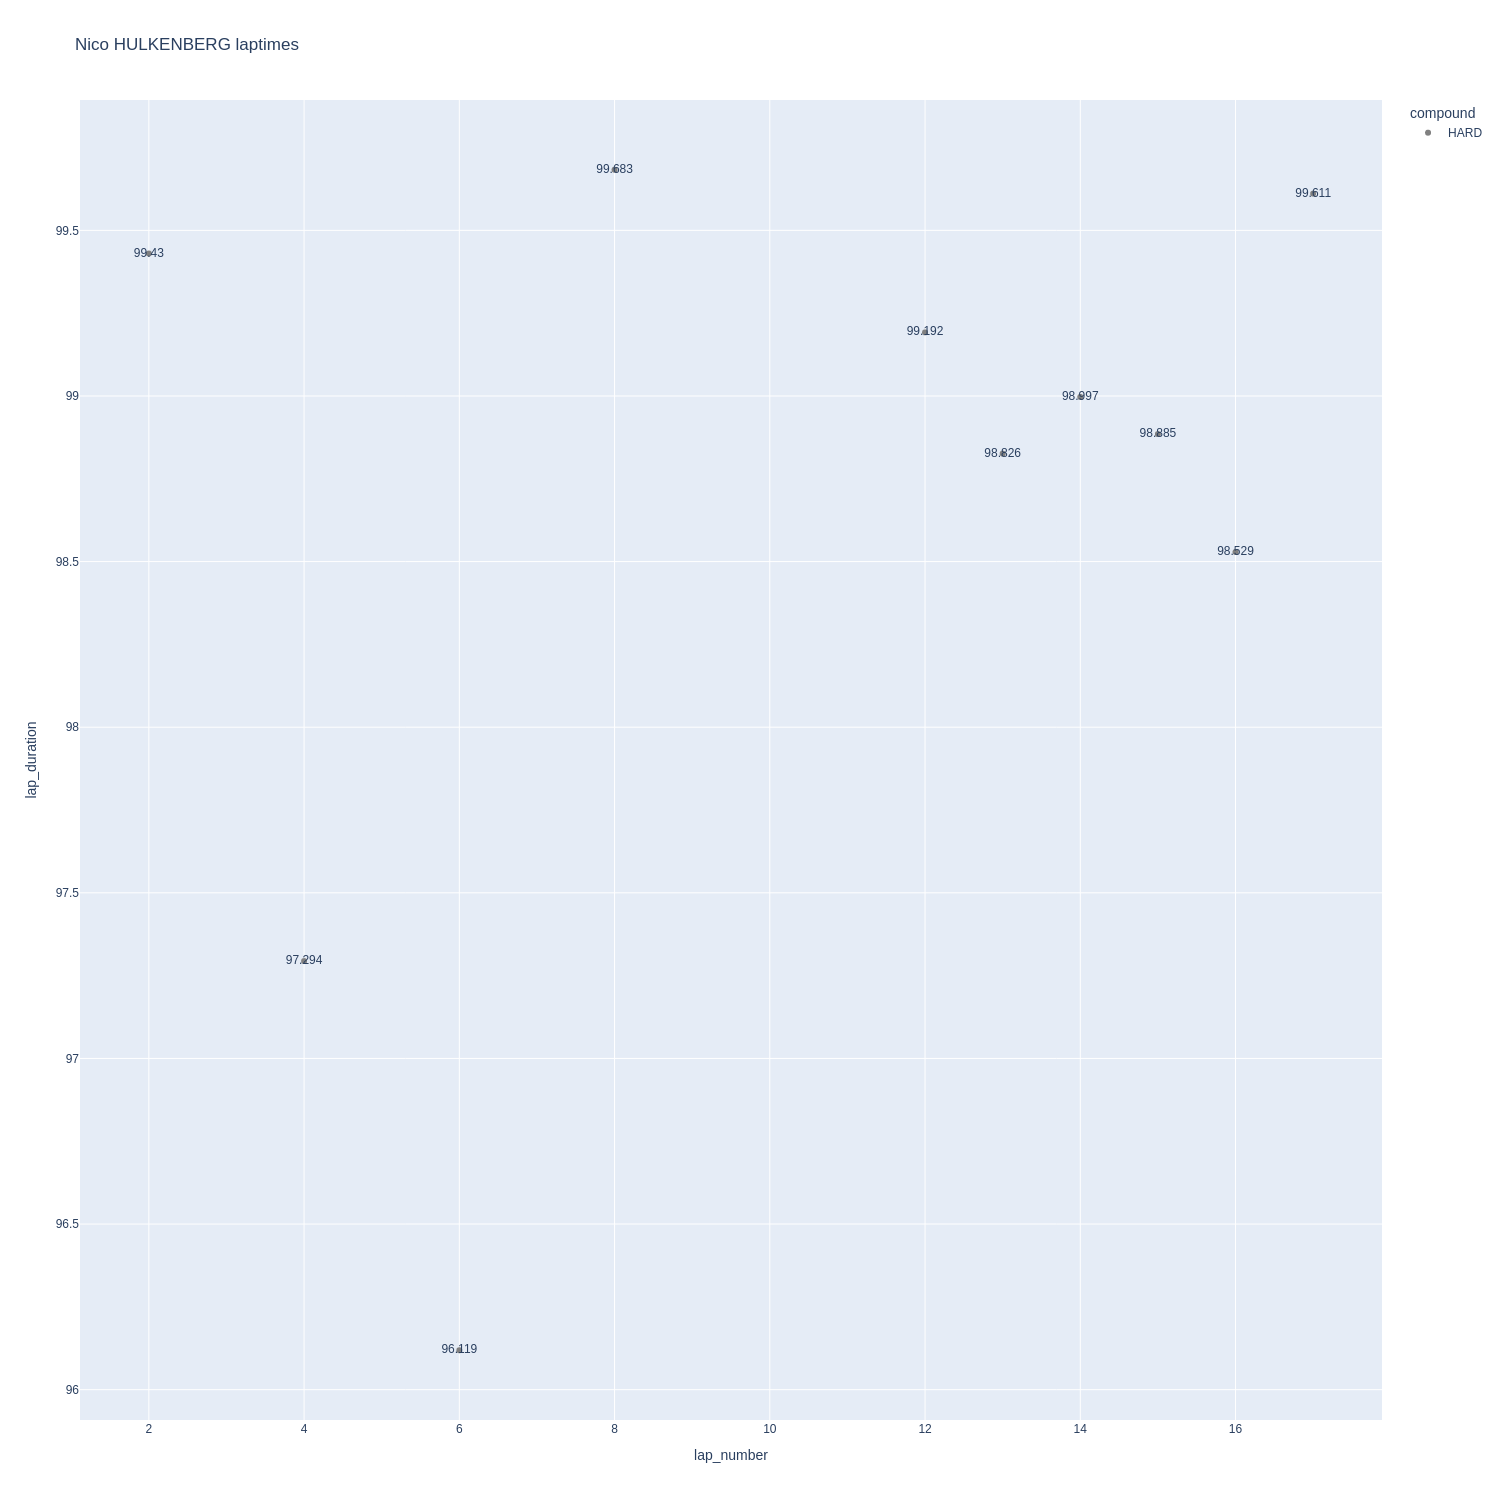

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

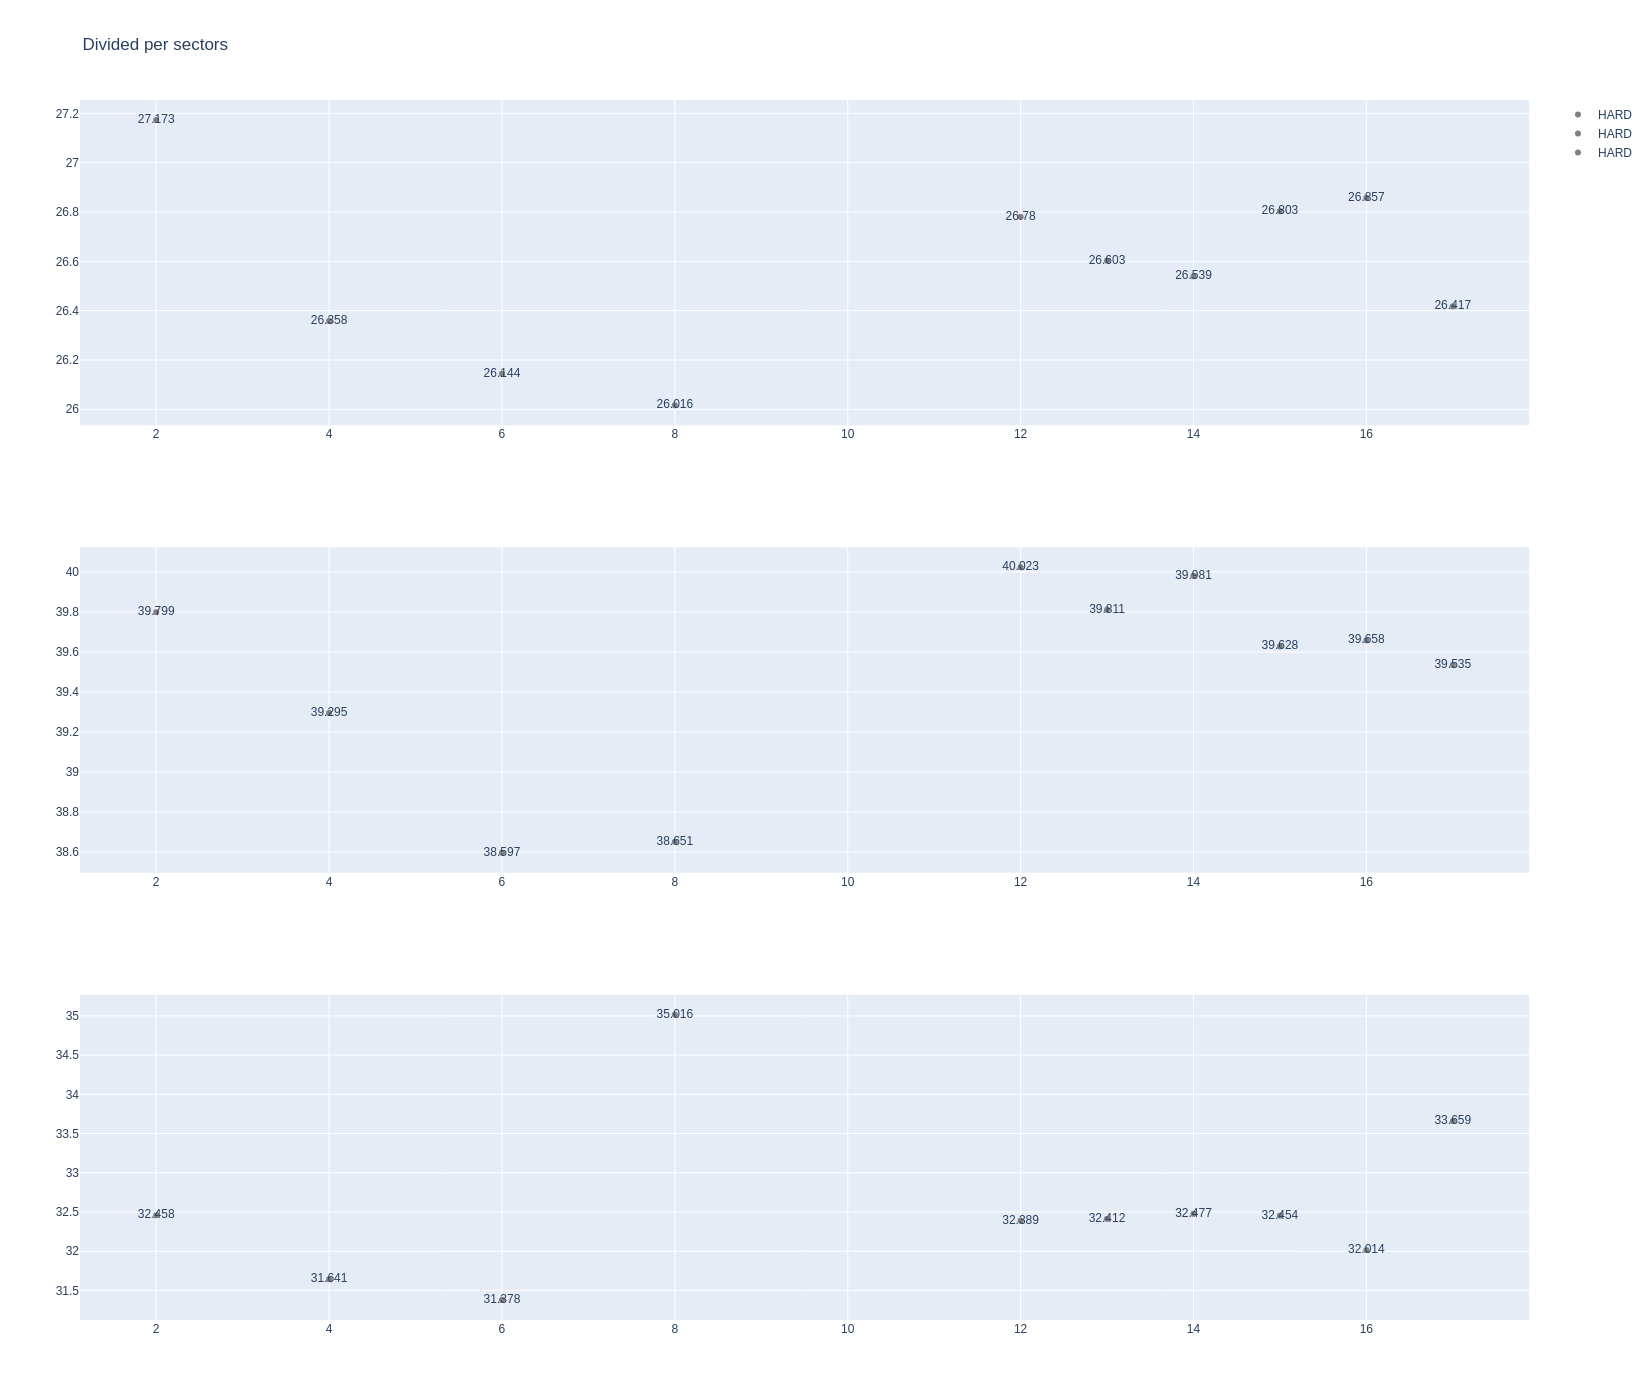

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [84]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
35   Gabriel BORTOLETO     HARD  2025-10-17T17:33:36.362000+00:00           2   
99   Gabriel BORTOLETO     HARD  2025-10-17T17:40:16.114000+00:00           5   
140  Gabriel BORTOLETO     HARD  2025-10-17T17:44:46.711000+00:00           7   
222  Gabriel BORTOLETO     HARD  2025-10-17T18:00:45.190000+00:00          10   
264  Gabriel BORTOLETO     HARD  2025-10-17T18:04:47.910000+00:00          12   
306  Gabriel BORTOLETO     HARD  2025-10-17T18:09:02.571000+00:00          14   
336  Gabriel BORTOLETO     HARD  2025-10-17T18:12:28.830000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
35              27.065             39.776             32.531        99.372  
99              26.412             38.996             32.182        97.590  
140             26.149             39.666             32.161        97.976  
222             26.228             39.083             31.860        97.171  
264             25.897             39.168             31.631        96.696  
306             26.001             38.701             31.696        96.398  
336             26.509             40.144             31.978        98.631

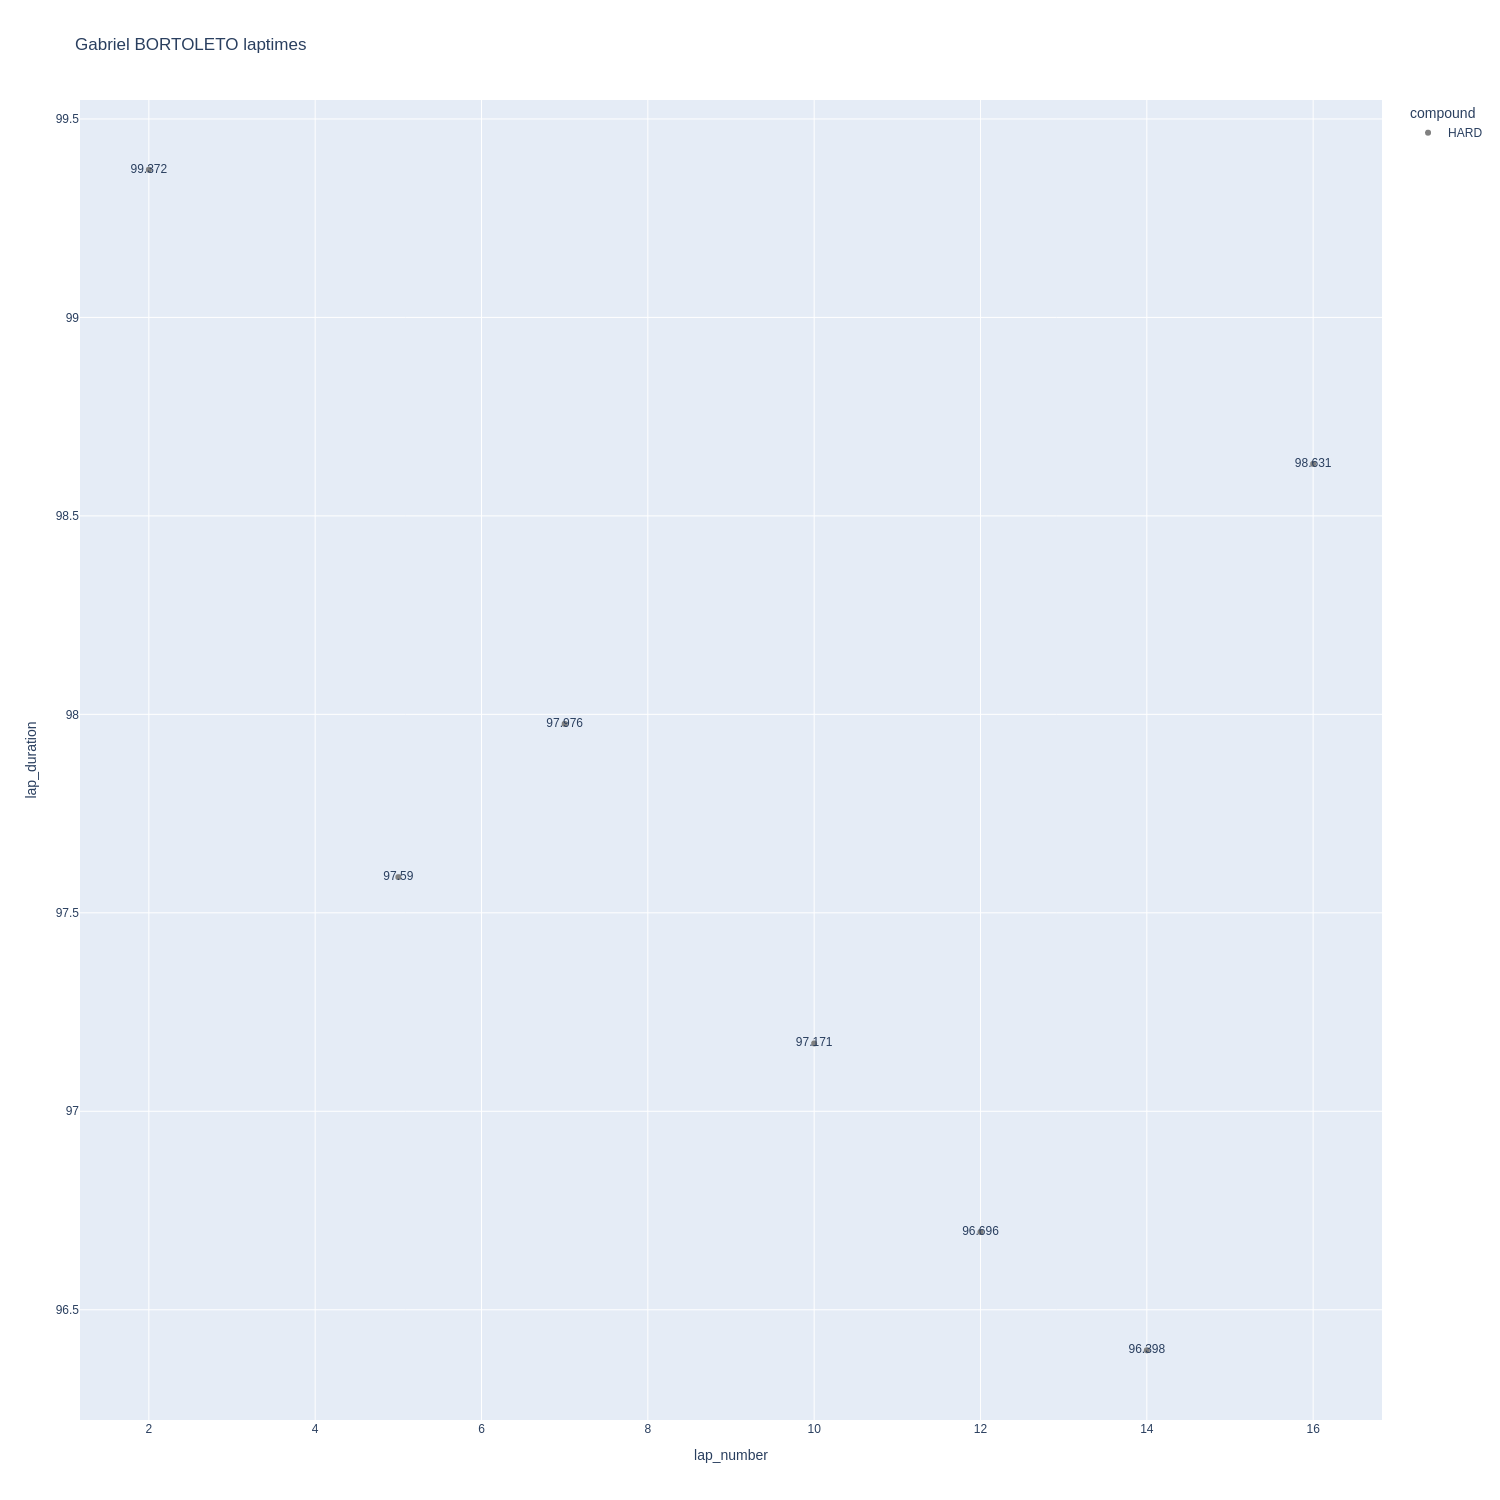

In [85]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

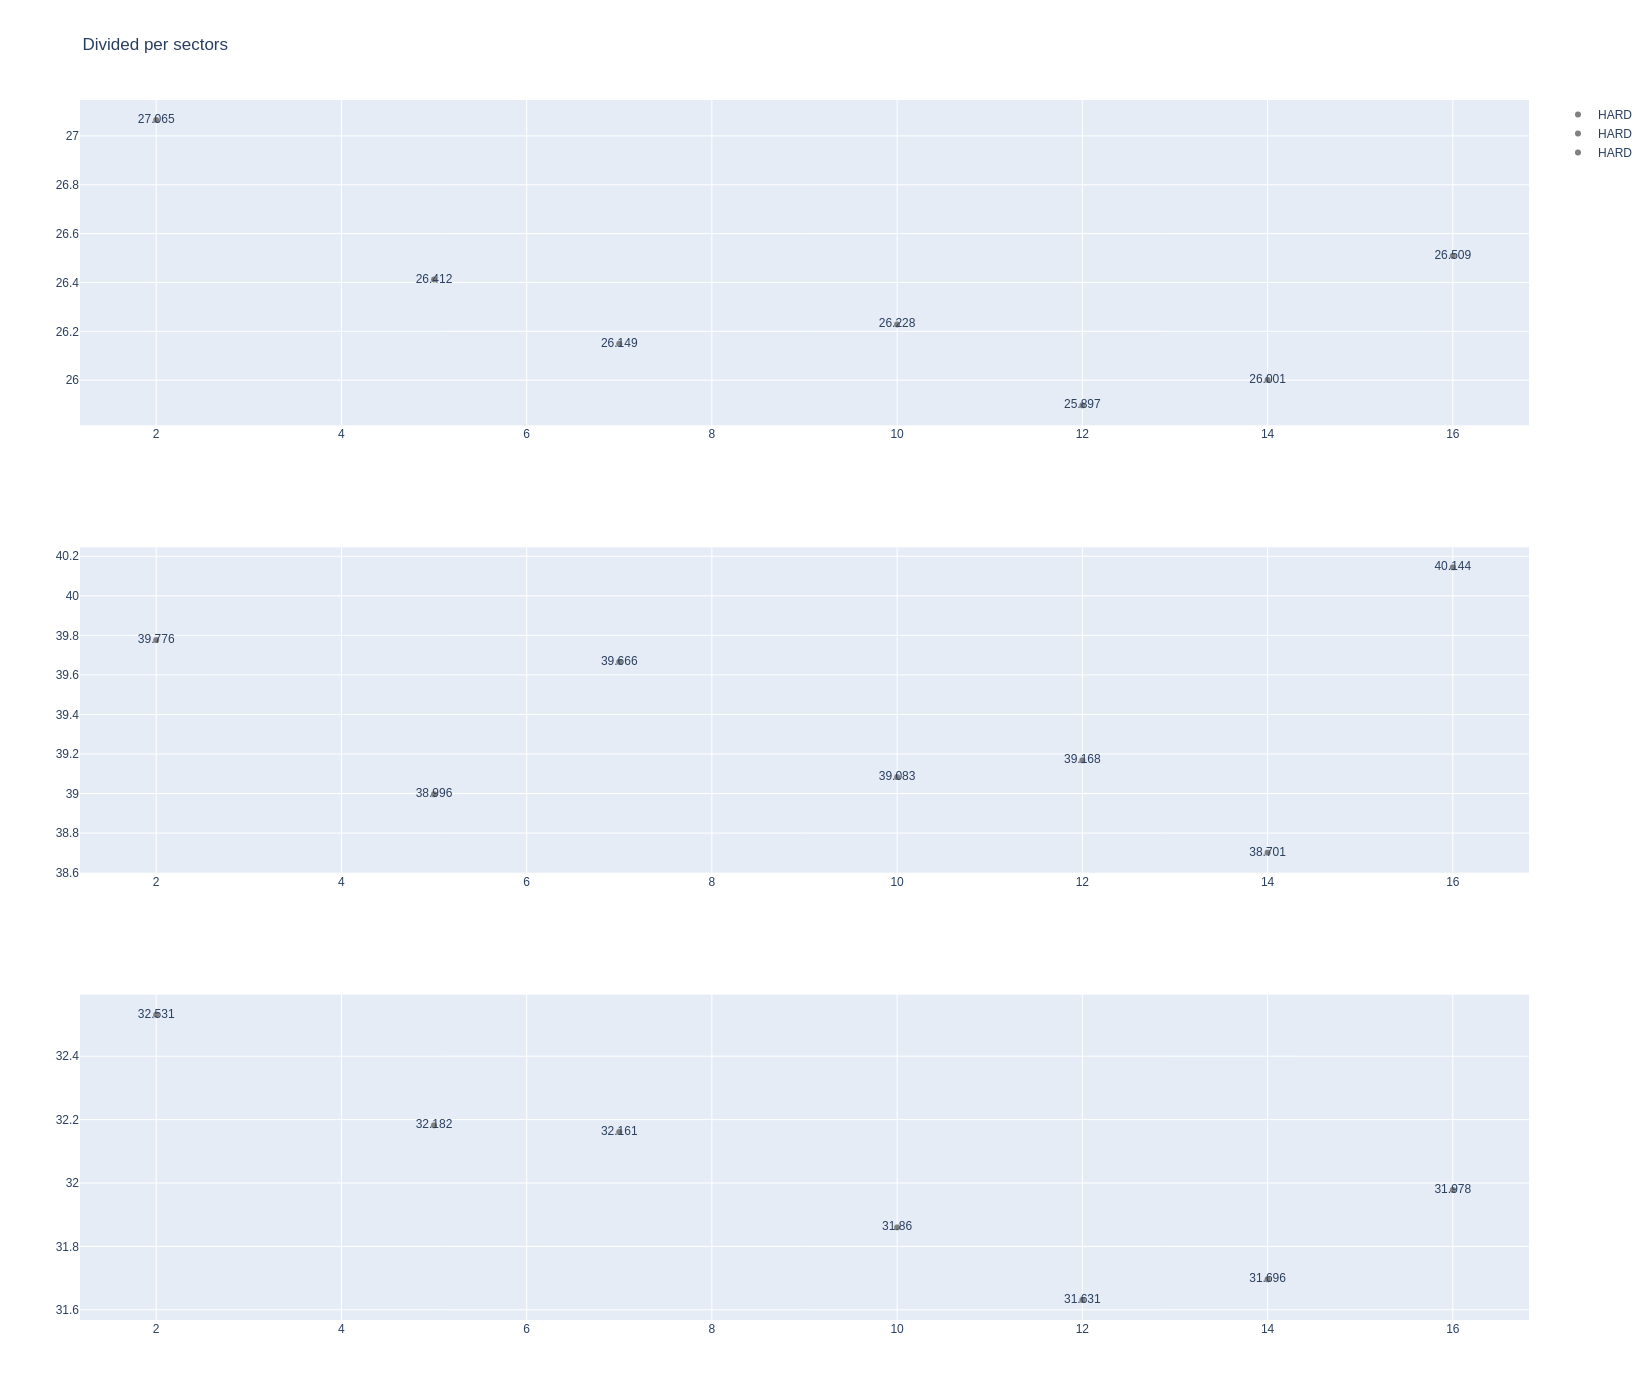

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver
It seems that SOFT could be used for 15-17 laps and it could be a good option to start. HARD is slow but it could be used for a medium stint(2/3) but it seems that MEDIUM is better
Haas, Aston and RB suffer in race pace

In [87]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [88]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [89]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
16       Carlos SAINZ     HARD     96.808000  26.234000  38.954000  31.620000
15     Lewis HAMILTON     HARD     96.946000  26.184750  38.905000  31.856250
7     Charles LECLERC     HARD     97.089833  26.065000  39.201000  31.823833
1        Lando NORRIS     HARD     97.189143  26.306286  39.183714  31.699143
2   Gabriel BORTOLETO     HARD     97.690571  26.323000  39.362000  32.005571
6     Fernando ALONSO     HARD     97.694222  26.358000  39.296000  32.040222
13       Esteban OCON     HARD     97.892200  26.382800  39.424100  32.085300
18      Oscar PIASTRI     HARD     97.903778  26.531444  39.402111  31.970222
17     George RUSSELL     HARD     98.038818  26.474727  39.452000  32.112091
8        Lance STROLL     HARD     98.090222  26.589000  39.325556  32.175667
4        Pierre GASLY     HARD     98.291333  26.432778  39.594111  32.264444
5      Kimi ANTONELLI     HARD     98.296778  26.636111  39.550556  32.110111
19     Oliver BEARMAN     HARD     98.319545  26.464000  39.601818  32.253727
10    Alexander ALBON     HARD     98.418700  26.513800  39.413300  32.491600
14   Franco COLAPINTO     HARD     98.497000  26.579625  39.668250  32.249125
12        Liam LAWSON     HARD     98.572167  26.668833  39.689167  32.214167
3        Isack HADJAR     HARD     98.614000  26.599750  39.691125  32.323125
11    Nico HULKENBERG     HARD     98.656600  26.569000  39.497800  32.589800
0      Max VERSTAPPEN     HARD     98.852500  26.733625  39.764000  32.354875
9        Yuki TSUNODA     HARD     98.871750  26.672250  39.812000  32.387500

##### Sorted by sector 1

In [90]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
7     Charles LECLERC     HARD  26.065000
15     Lewis HAMILTON     HARD  26.184750
16       Carlos SAINZ     HARD  26.234000
1        Lando NORRIS     HARD  26.306286
2   Gabriel BORTOLETO     HARD  26.323000
6     Fernando ALONSO     HARD  26.358000
13       Esteban OCON     HARD  26.382800
4        Pierre GASLY     HARD  26.432778
19     Oliver BEARMAN     HARD  26.464000
17     George RUSSELL     HARD  26.474727
10    Alexander ALBON     HARD  26.513800
18      Oscar PIASTRI     HARD  26.531444
11    Nico HULKENBERG     HARD  26.569000
14   Franco COLAPINTO     HARD  26.579625
8        Lance STROLL     HARD  26.589000
3        Isack HADJAR     HARD  26.599750
5      Kimi ANTONELLI     HARD  26.636111
12        Liam LAWSON     HARD  26.668833
9        Yuki TSUNODA     HARD  26.672250
0      Max VERSTAPPEN     HARD  26.733625

##### Sorted by sector 2

In [91]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
15     Lewis HAMILTON     HARD  38.905000
16       Carlos SAINZ     HARD  38.954000
1        Lando NORRIS     HARD  39.183714
7     Charles LECLERC     HARD  39.201000
6     Fernando ALONSO     HARD  39.296000
8        Lance STROLL     HARD  39.325556
2   Gabriel BORTOLETO     HARD  39.362000
18      Oscar PIASTRI     HARD  39.402111
10    Alexander ALBON     HARD  39.413300
13       Esteban OCON     HARD  39.424100
17     George RUSSELL     HARD  39.452000
11    Nico HULKENBERG     HARD  39.497800
5      Kimi ANTONELLI     HARD  39.550556
4        Pierre GASLY     HARD  39.594111
19     Oliver BEARMAN     HARD  39.601818
14   Franco COLAPINTO     HARD  39.668250
12        Liam LAWSON     HARD  39.689167
3        Isack HADJAR     HARD  39.691125
0      Max VERSTAPPEN     HARD  39.764000
9        Yuki TSUNODA     HARD  39.812000

##### Sorted by sector 3

In [92]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
16       Carlos SAINZ     HARD  31.620000
1        Lando NORRIS     HARD  31.699143
7     Charles LECLERC     HARD  31.823833
15     Lewis HAMILTON     HARD  31.856250
18      Oscar PIASTRI     HARD  31.970222
2   Gabriel BORTOLETO     HARD  32.005571
6     Fernando ALONSO     HARD  32.040222
13       Esteban OCON     HARD  32.085300
5      Kimi ANTONELLI     HARD  32.110111
17     George RUSSELL     HARD  32.112091
8        Lance STROLL     HARD  32.175667
12        Liam LAWSON     HARD  32.214167
14   Franco COLAPINTO     HARD  32.249125
19     Oliver BEARMAN     HARD  32.253727
4        Pierre GASLY     HARD  32.264444
3        Isack HADJAR     HARD  32.323125
0      Max VERSTAPPEN     HARD  32.354875
9        Yuki TSUNODA     HARD  32.387500
10    Alexander ALBON     HARD  32.491600
11    Nico HULKENBERG     HARD  32.589800

#### Long runs mean

In [93]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [94]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

Empty DataFrame
Columns: [driver, mean_lap_time]
Index: []

In [95]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

Empty DataFrame
Columns: [driver, mean_lap_time]
Index: []

In [96]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
16       C SAINZ         96.808
15    L HAMILTON         96.946
7      C LECLERC         97.090
1       L NORRIS         97.189
2    G BORTOLETO         97.691
6       F ALONSO         97.694
13        E OCON         97.892
18     O PIASTRI         97.904
17     G RUSSELL         98.039
8       L STROLL         98.090
4        P GASLY         98.291
5    K ANTONELLI         98.297
19     O BEARMAN         98.320
10       A ALBON         98.419
14   F COLAPINTO         98.497
12      L LAWSON         98.572
3       I HADJAR         98.614
11  N HULKENBERG         98.657
0   M VERSTAPPEN         98.852
9      Y TSUNODA         98.872

## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [98]:
libraryDataF1.obtain_information('race_control',session_key=9879)

meeting_key  session_key                       date driver_number  \
0          1271         9879  2025-10-17T21:12:46+00:00          None   
1          1271         9879  2025-10-17T21:15:13+00:00          None   
2          1271         9879  2025-10-17T21:30:00+00:00          None   
3          1271         9879  2025-10-17T21:35:06+00:00          None   
4          1271         9879  2025-10-17T21:42:00+00:00          None   
5          1271         9879  2025-10-17T21:42:06+00:00          None   
6          1271         9879  2025-10-17T21:45:55+00:00          None   
7          1271         9879  2025-10-17T21:46:13+00:00          None   
8          1271         9879  2025-10-17T21:49:00+00:00          None   
9          1271         9879  2025-10-17T21:59:00+00:00          None   
10         1271         9879  2025-10-17T21:59:09+00:00          None   
11         1271         9879  2025-10-17T21:59:12+00:00          None   
12         1271         9879  2025-10-17T22:02:43+00:00          None   
13         1271         9879  2025-10-17T22:03:18+00:00          None   
14         1271         9879  2025-10-17T22:04:03+00:00          None   
15         1271         9879  2025-10-17T22:06:00+00:00          None   
16         1271         9879  2025-10-17T22:14:00+00:00          None   
17         1271         9879  2025-10-17T22:14:09+00:00          None   
18         1271         9879  2025-10-17T22:17:08+00:00          None   
19         1271         9879  2025-10-17T22:17:13+00:00          None   
20         1271         9879  2025-10-17T22:24:28+00:00          None   
21         1271         9879  2025-10-17T22:24:31+00:00          None   

   lap_number category       flag  scope sector  \
0        None    Other       None   None   None   
1        None    Other       None   None   None   
2        None     Flag      GREEN  Track   None   
3        None    Other       None   None   None   
4        None     Flag  CHEQUERED  Track   None   
5        None    Other       None   None   None   
6        None    Other       None   None   None   
7        None    Other       None   None   None   
8        None     Flag      GREEN  Track   None   
9        None     Flag  CHEQUERED  Track   None   
10       None    Other       None   None   None   
11       None    Other       None   None   None   
12       None    Other       None   None   None   
13       None    Other       None   None   None   
14       None    Other       None   None   None   
15       None     Flag      GREEN  Track   None   
16       None     Flag  CHEQUERED  Track   None   
17       None    Other       None   None   None   
18       None    Other       None   None   None   
19       None    Other       None   None   None   
20       None     Flag  CHEQUERED  Track   None   
21       None     Flag  CHEQUERED  Track   None   

                                              message  
0             BLUE HEAD PADDING MATERIAL MUST BE USED  
1         RISK OF RAIN FOR F1 SPRINT QUALIFYING IS 0%  
2                         GREEN LIGHT - PIT EXIT OPEN  
3   CAR 5 (BOR) TIME 1:36.313 DELETED - TRACK LIMI...  
4                                      CHEQUERED FLAG  
5           FIRST CAR TO TAKE THE FLAG - CAR 18 (STR)  
6   FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 6 (H...  
7   FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 6 (H...  
8                         GREEN LIGHT - PIT EXIT OPEN  
9                                      CHEQUERED FLAG  
10  CAR 30 (LAW) TIME 1:34.316 DELETED - TRACK LIM...  
11          FIRST CAR TO TAKE THE FLAG - CAR 23 (ALB)  
12  FIA STEWARDS: SQ2 INCIDENT INVOLVING CARS 18 (...  
13  FIA STEWARDS: SQ2 INCIDENT INVOLVING CARS 18 (...  
14  CAR 18 (STR) LAP DELETED - TRACK LIMITS AT TUR...  
15                        GREEN LIGHT - PIT EXIT OPEN  
16                                     CHEQUERED FLAG  
17           FIRST CAR TO TAKE THE FLAG - CAR 4 (NOR)  
18  FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 6 (H...  
19  FIA STEWARDS: SQ2 INCIDENT

### Obtain setup

In [99]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9879)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9879)
drivers = libraryDataF1.obtain_information('drivers',session_key=9879)
libraryDataF1.obtain_drivers_colours(drivers)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted ,within the 107%, were deleted from dataset in order to obtain only the valid laps for the analysis.

In [100]:
laptimes_deleted = [96.313,94.316,]
driver_number_lap_deleted = [5,30]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [101]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

meeting_key  session_key  driver_number  lap_number  \
196         1271         9879              1          11   

                           date_start  duration_sector_1  duration_sector_2  \
196  2025-10-17T22:13:14.232000+00:00             24.891             37.159   

     duration_sector_3  i1_speed  i2_speed  is_pit_out_lap  lap_duration  \
196             30.093     240.0       193           False        92.143   

                        segments_sector_1  \
196  [2049, 2049, 2049, 2049, 2049, 2051]   

                                    segments_sector_2  \
196  [2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]   

                                    segments_sector_3  st_speed  
196  [2049, 2049, 2049, 2049, 2049, 2051, 2048, 2048]       327

The fastest lap is 92.143 seconds (1.32.143= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (98.59 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [102]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 98.59")

In [103]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
Session changes thank to the track improvement as we can watch with the Antonelli's laptime compared to Bearman. Ferrari showed an horrible pace and 6 miliseconds made Hamilton through to Q2.
Williams had a good pace but a bad strategy doing their fastest attemp so early was a bad decision. Hulkenberg is a beast and took advantage of the bad strategy of Mercedes and Williams

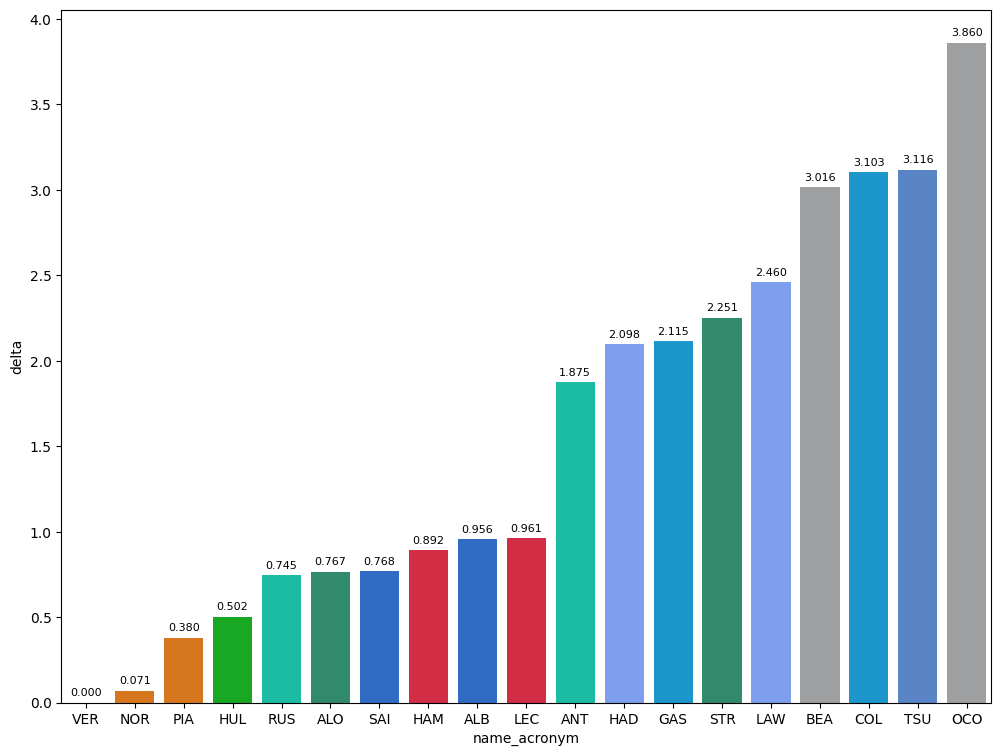

In [104]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [105]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [106]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2025-10-17T21:49:00+00:00'"
maximumDateQ2 = "date_start <'2025-10-17T22:06:00+00:00' and date_start >='2025-10-17T21:49:00+00:00'"
maximumDateQ3 = "date_start >'2025-10-17T22:06:00+00:00'"

### Speed trap

#### Maximum speed per drivers
In this section we can watch what setup strategy has decided. In case of Red Bull and Alpine they decided to gamble for a setup centered on straight. On the other hand, Ferrari and McLaren decided to take a different point of view.

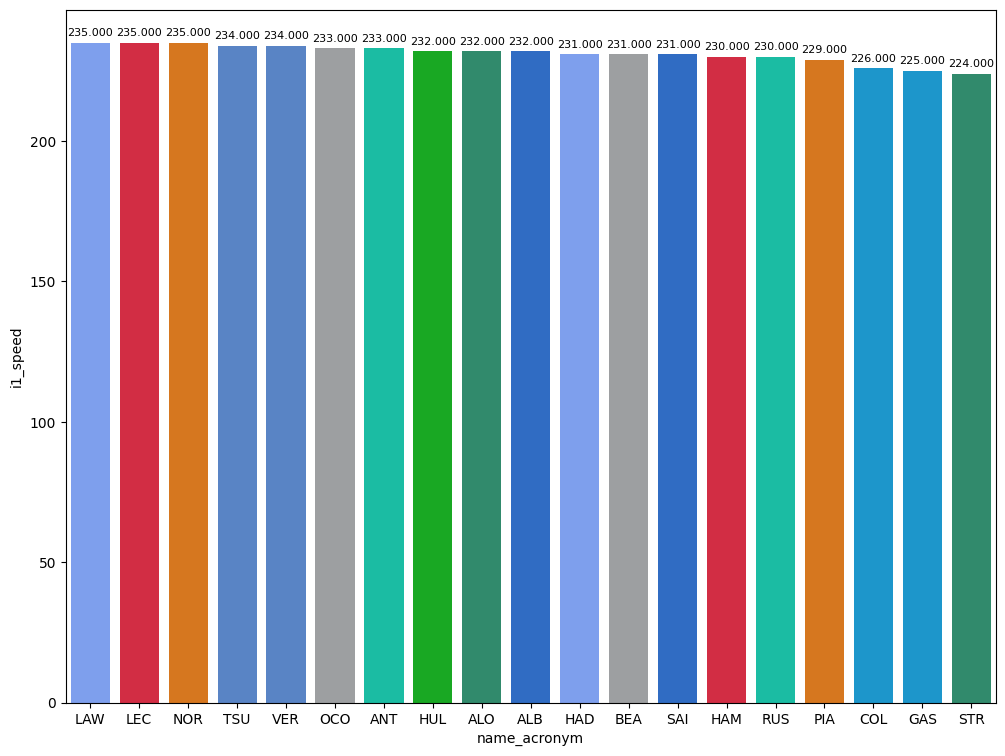

In [107]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

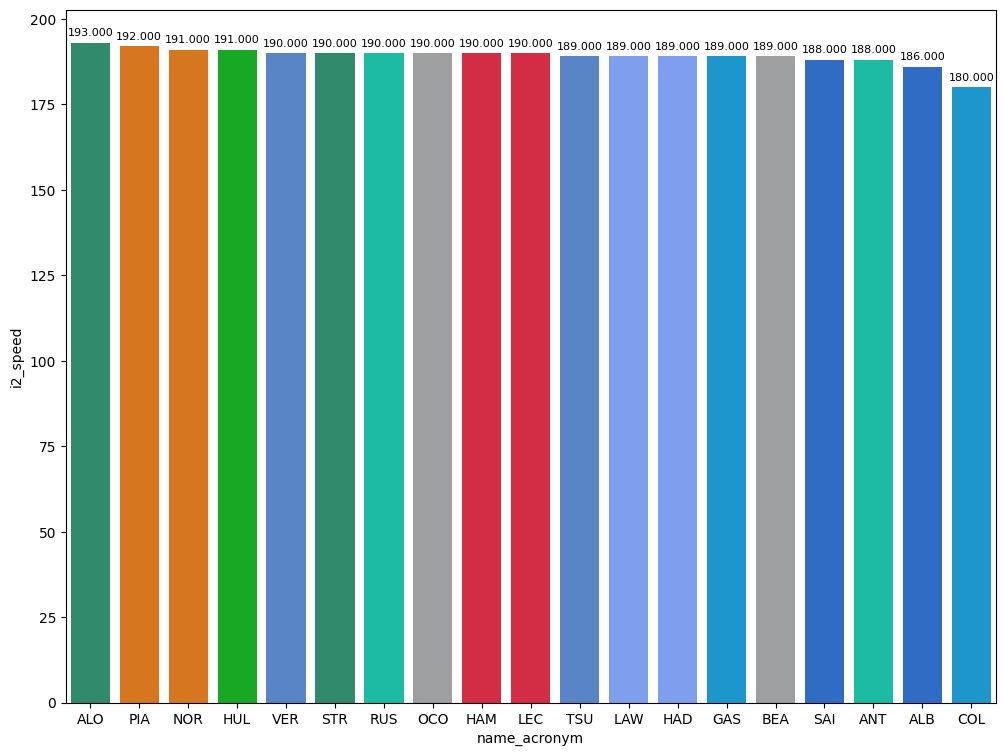

In [108]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

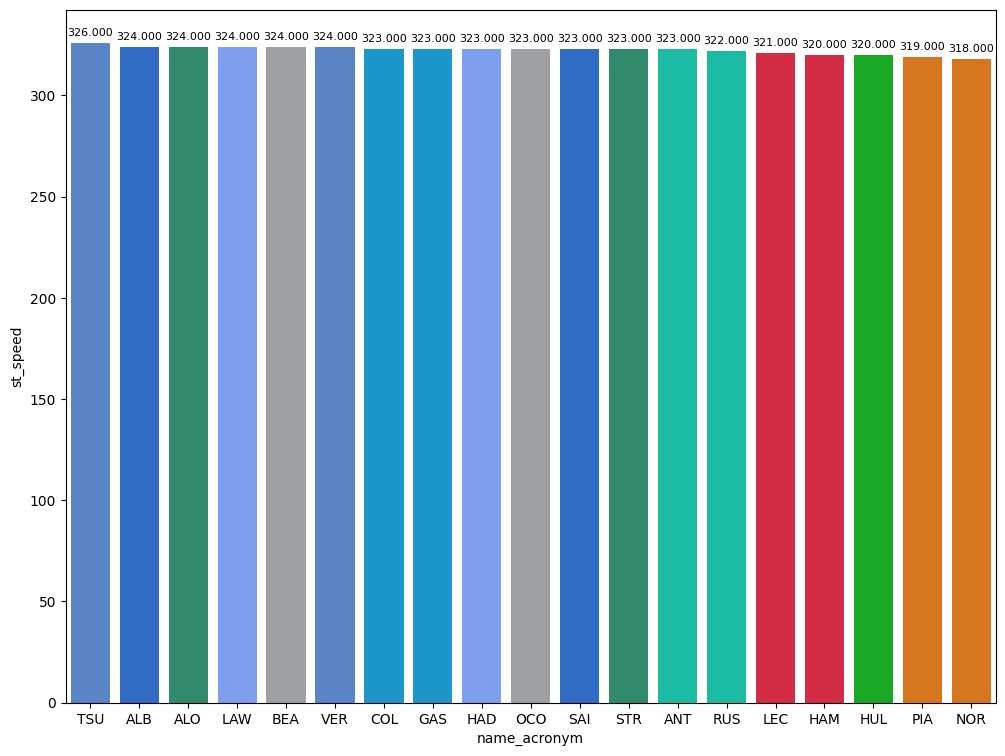

In [109]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Sprint Qualyfing 1

In [110]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Gasly did a mega sector 3 (9th fastest) and this gave him the pass to Q2. Bearman and Colapinto could have passed but the third sector was incredible gaining 3 tenths

In [111]:
#Reference
P15 = q1Data[14:15]
P15

meeting_key_x  session_key_x  driver_number  lap_number  \
48           1271           9879             10           5   

                          date_start  duration_sector_1  duration_sector_2  \
48  2025-10-17T21:41:35.687000+00:00             25.659             38.633   

    duration_sector_3  i1_speed  i2_speed  ...  broadcast_name     full_name  \
48             30.852     225.0       189  ...         P GASLY  Pierre GASLY   

   name_acronym team_name team_colour  first_name  last_name  \
48          GAS    Alpine      00A1E8      Pierre      Gasly   

                                         headshot_url country_code  \
48  https://media.formula1.com/d_driver_fallback_i...         None   

   isFastestLap  
48         True  

[1 rows x 28 columns]

In [112]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Pierre GASLY Sector 1:  25.659 Sector 2:  38.633 Sector 3:  30.852


In [113]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             87         0.015                0.168               -0.511   
1             43         0.102                0.111               -0.396   
2             22         0.115                0.255               -0.301   
3             31         0.859                0.428               -0.230   

   difference_sector_3 name_acronym  
0                0.358          BEA  
1                0.387          COL  
2                0.161          TSU  
3                0.661          OCO

#### Best sector per driver
S1: Williams was so strong in 1 sector and McLaren and Haas suffered.
S2: Alpine loses all the advantage in this sector even though its configuration. Also, Williams loses in this sector.
S3: Aston loses in this sector and Sauber is competitive here.

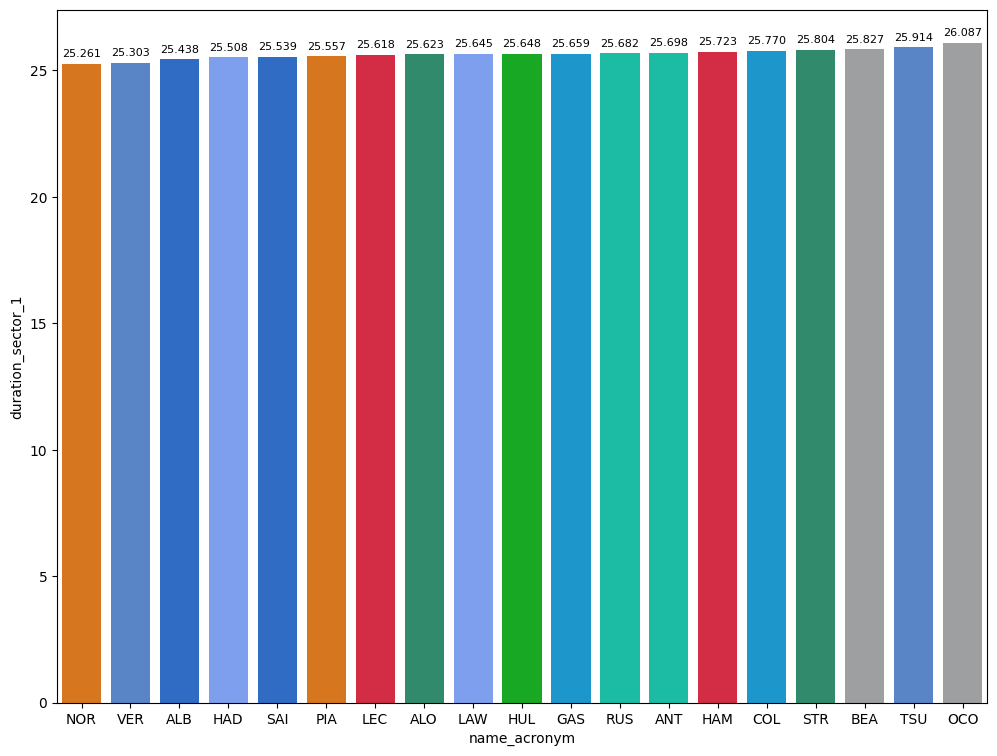

In [114]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

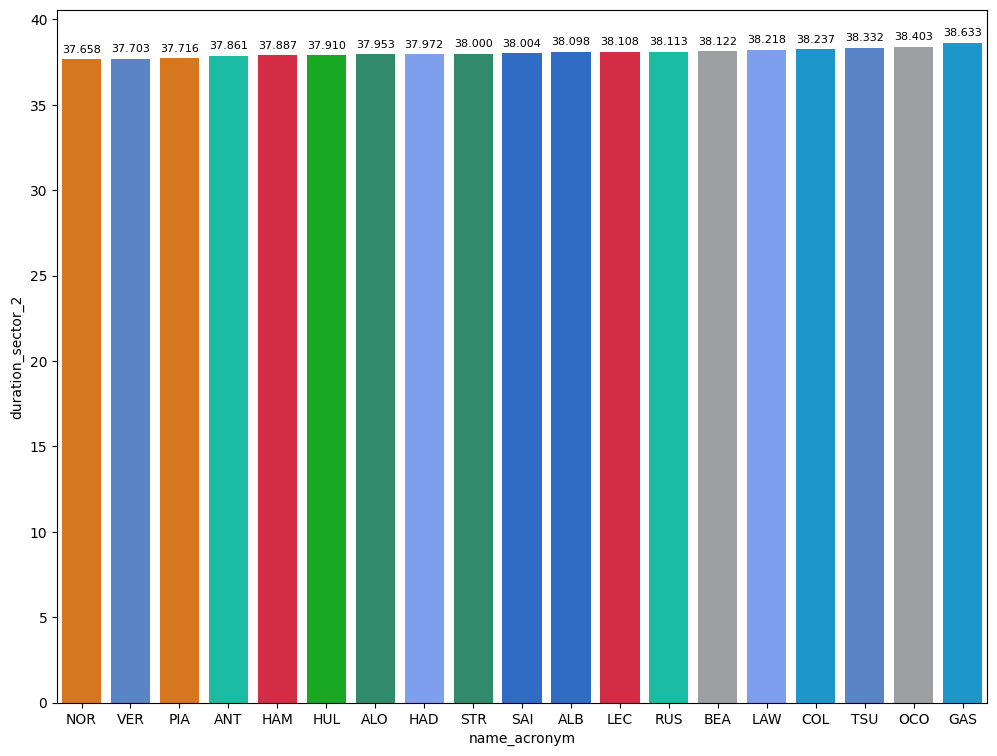

In [115]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

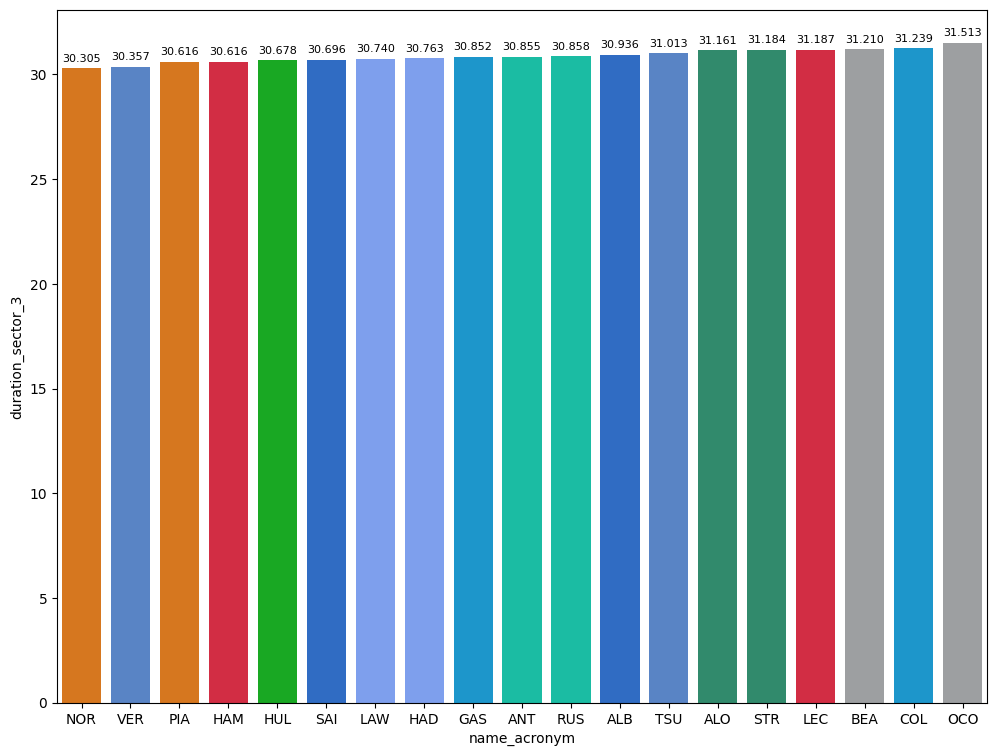

In [116]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 2

In [132]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Ferrari suffers a lot in SQ. Hamilton passed thanks to the last sector but the difference with his rivals was so close.

In [133]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Lewis HAMILTON Sector 1:  25.432 Sector 2:  37.87 Sector 3:  30.71


In [134]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             12         0.006                0.051                0.102   
1              6         0.229                0.073                0.060   
2             10         0.246               -0.026                0.178   
3             18         0.382                0.097                0.045   

   difference_sector_3 name_acronym  
0               -0.147          ANT  
1                0.096          HAD  
2                0.094          GAS  
3                0.240          STR

#### Best sector per driver
S1: Williams had a good pace in S1 being the fastest followed by Max.
S2: All the advantage that Williams won, they lost in thise sector. Ferrari saved the session thanks to this sector
S3: McLaren gained a bit of advantage in this sector and Aston suffered a lot

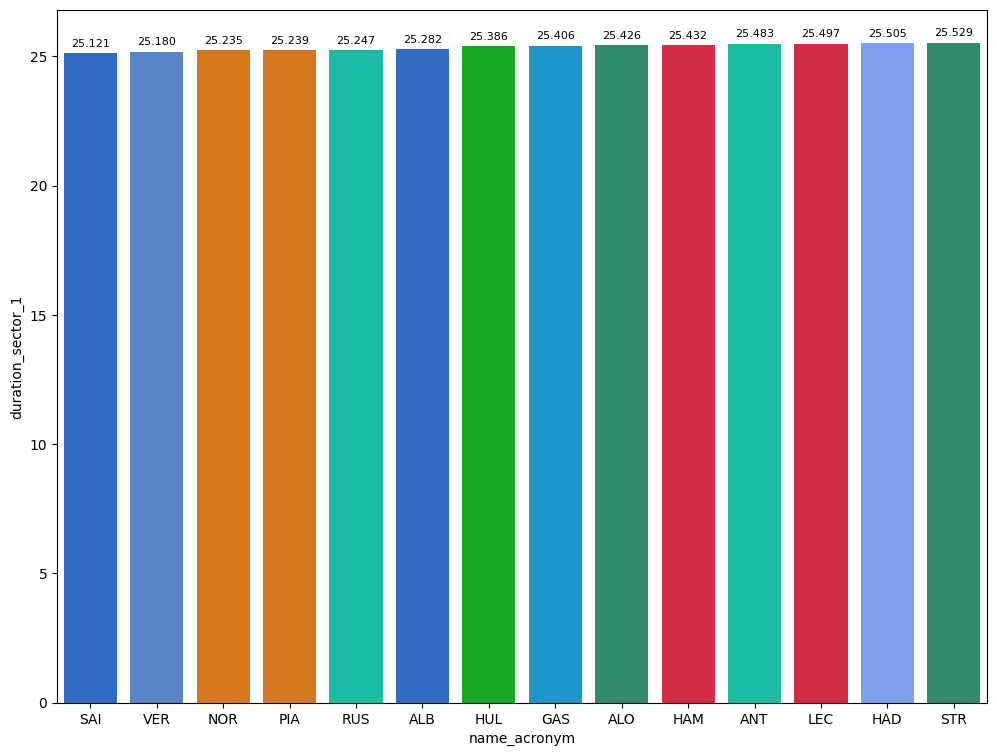

In [138]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

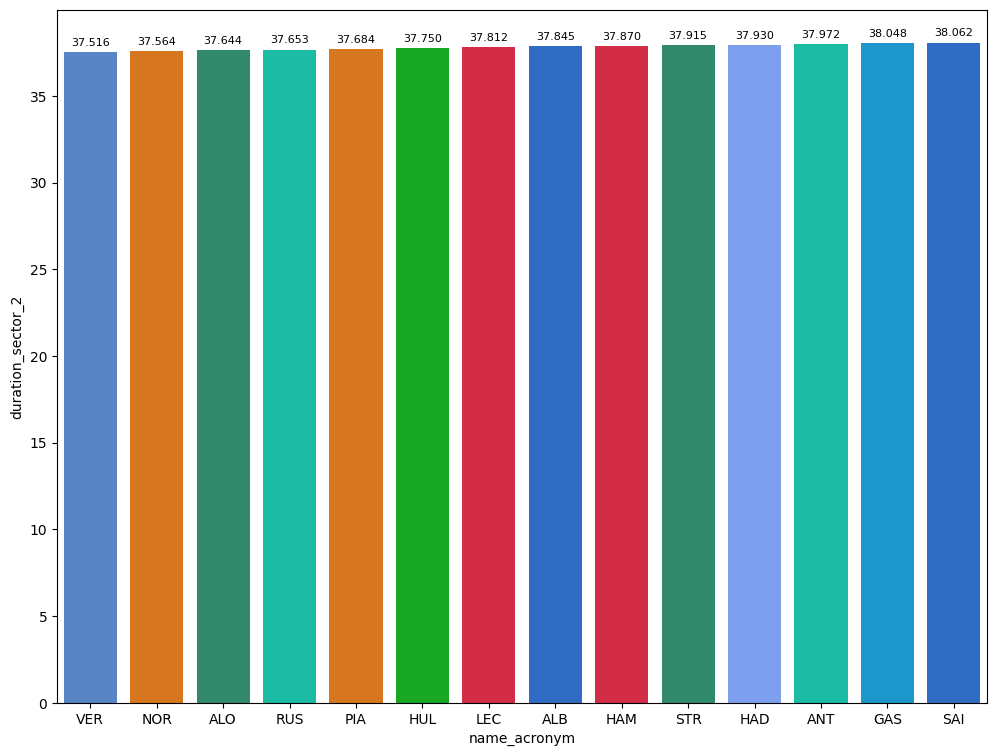

In [139]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

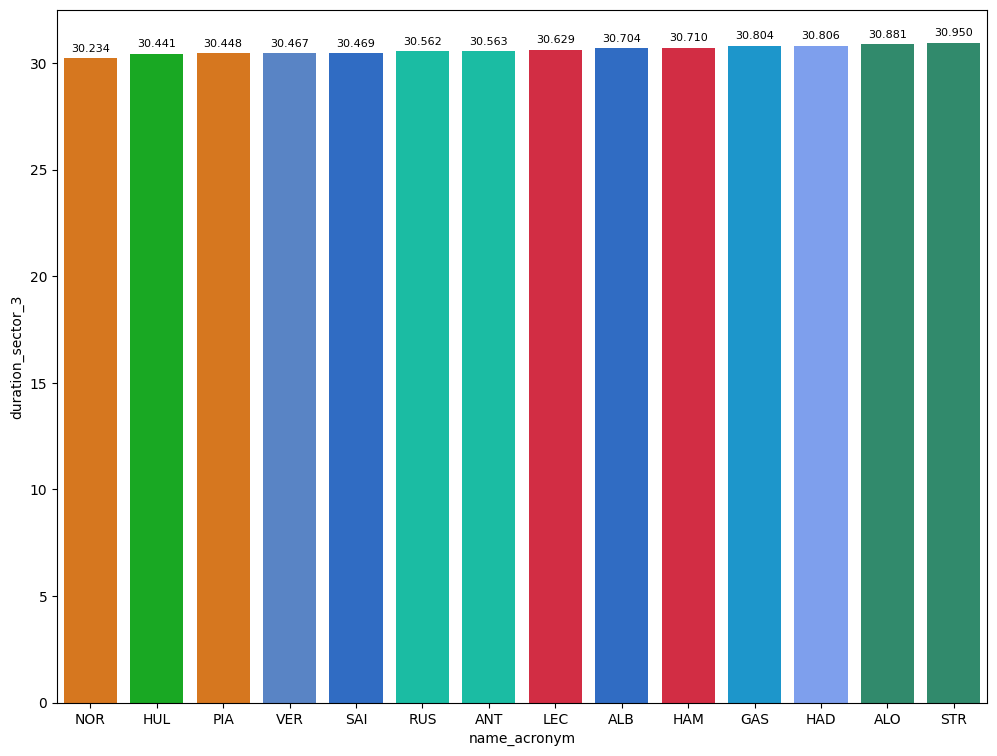

In [140]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Sprint Qualyfing 3

In [123]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

In [124]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Max VERSTAPPEN Sector 1:  24.891 Sector 2:  37.159 Sector 3:  30.093


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Max took an incredible pole thanks to his first sector where he was stronger than McLaren and even though they reverted his strong sector, Max was able to take the pole

In [125]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4         0.071                0.064               -0.025   
1             81         0.380                0.234                0.047   
2             27         0.502                0.205                0.177   
3             63         0.745                0.308                0.145   
4             14         0.767                0.340               -0.007   
5             55         0.768                0.216                0.360   
6             44         0.892                0.279                0.244   
7             23         0.956                0.217                0.330   
8             16         0.961                0.227                0.355   

   difference_sector_3 name_acronym  
0                0.032          NOR  
1                0.099          PIA  
2                0.120          HUL  
3                0.292          RUS  
4                0.434          ALO  
5                0.192          SAI  
6                0.369          HAM  
7                0.409          ALB  
8                0.379          LEC

#### Best sector per driver

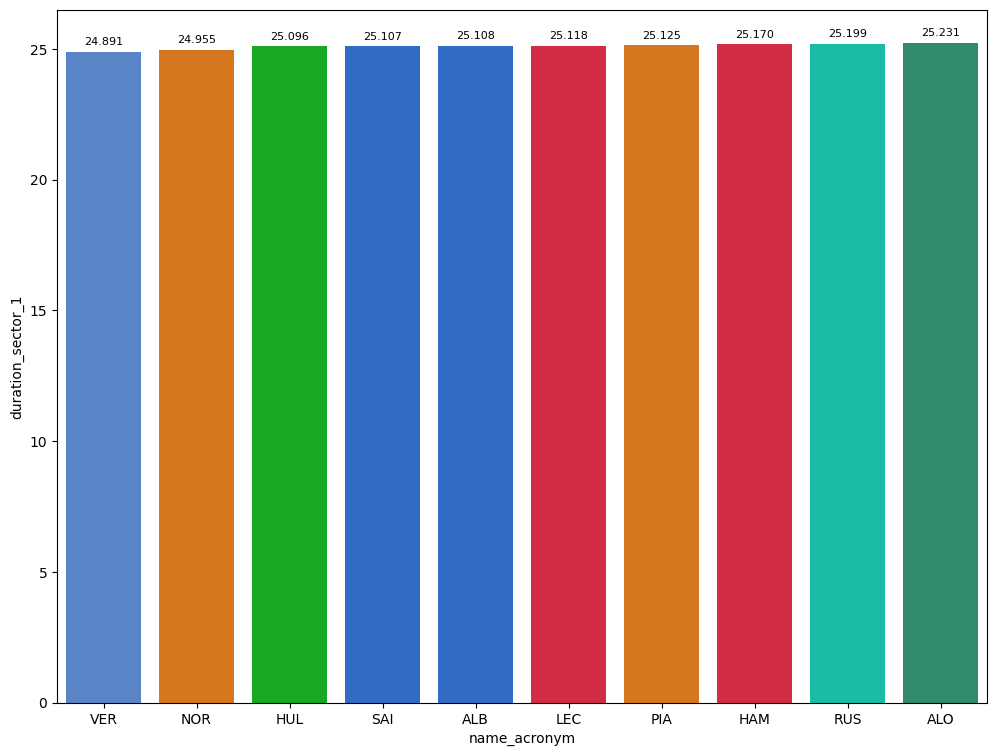

In [126]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

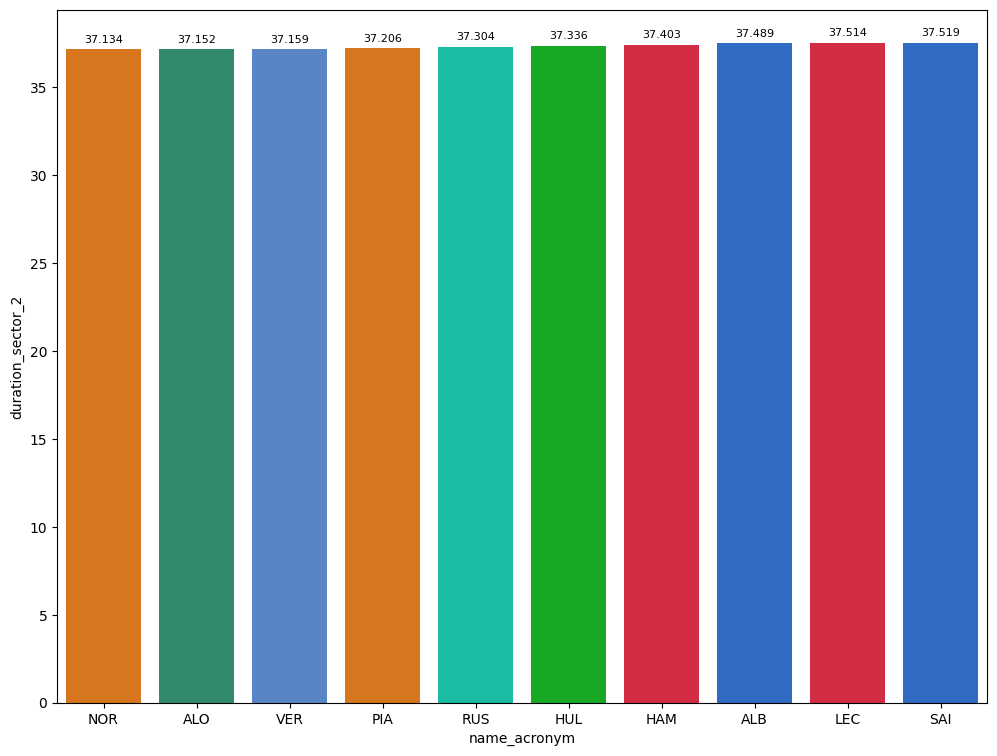

In [127]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

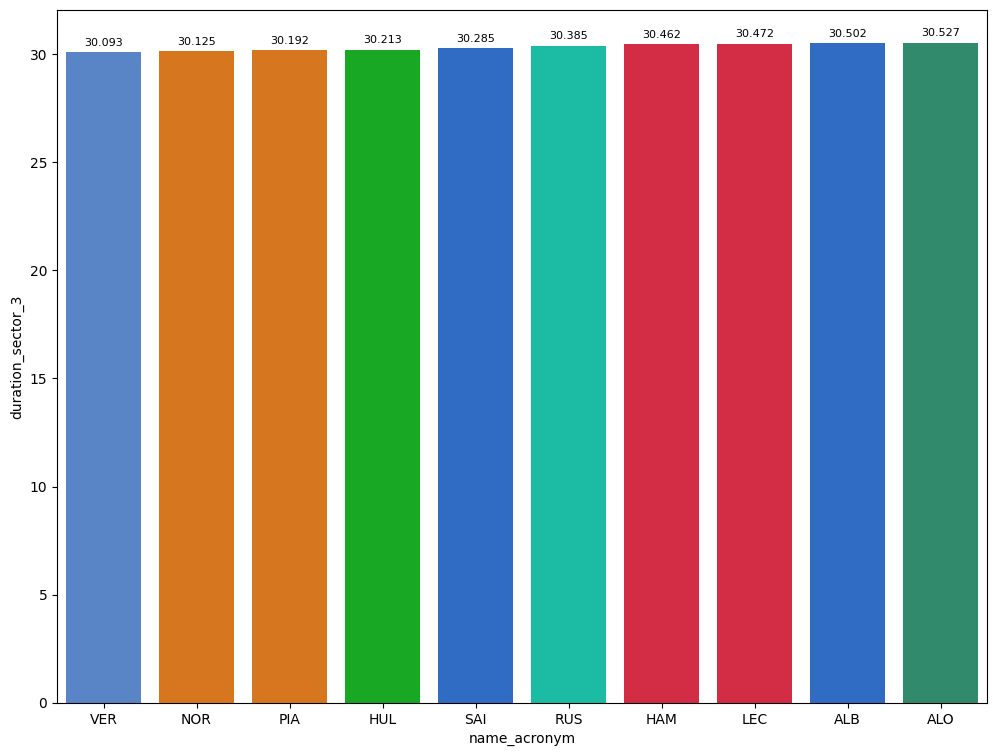

In [128]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

### Best sector in the session

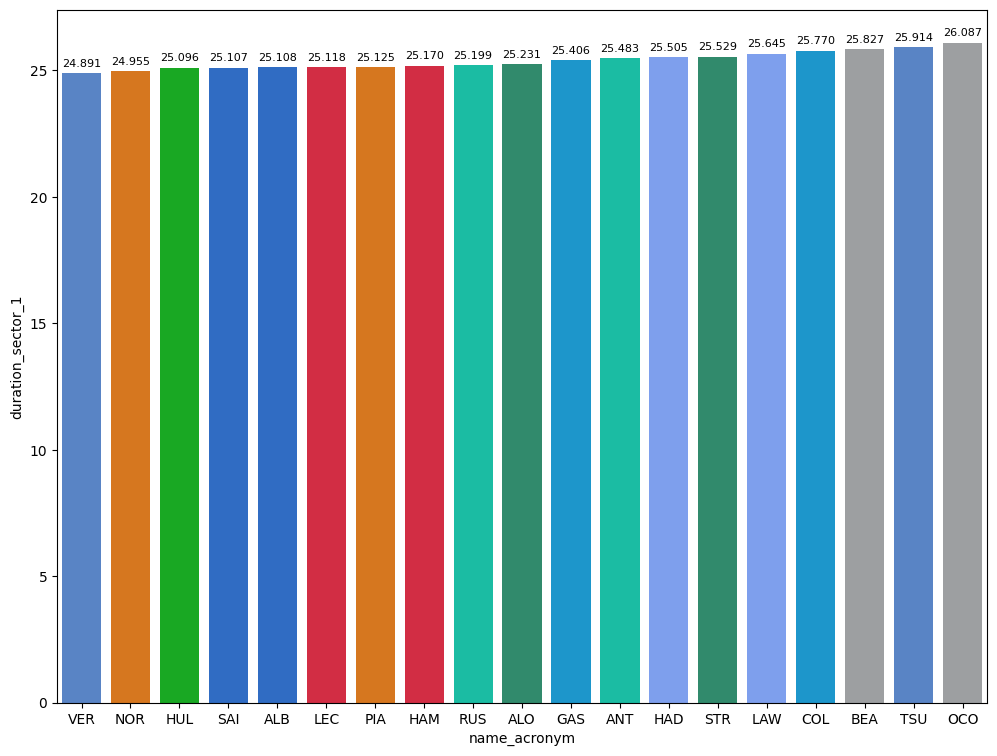

In [129]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

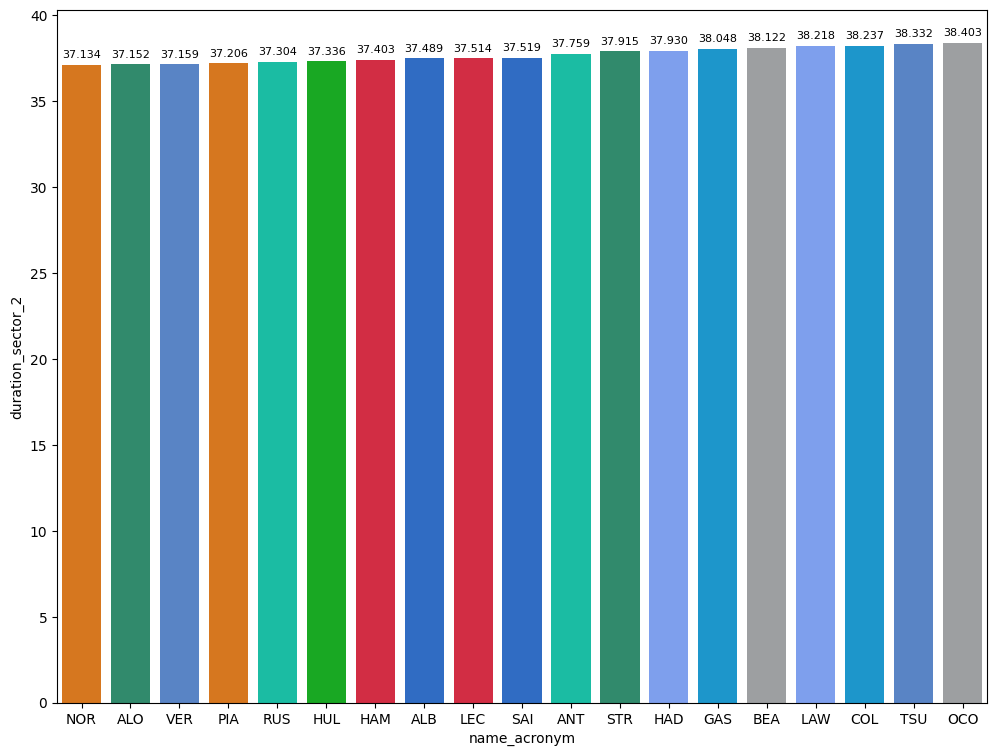

In [130]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

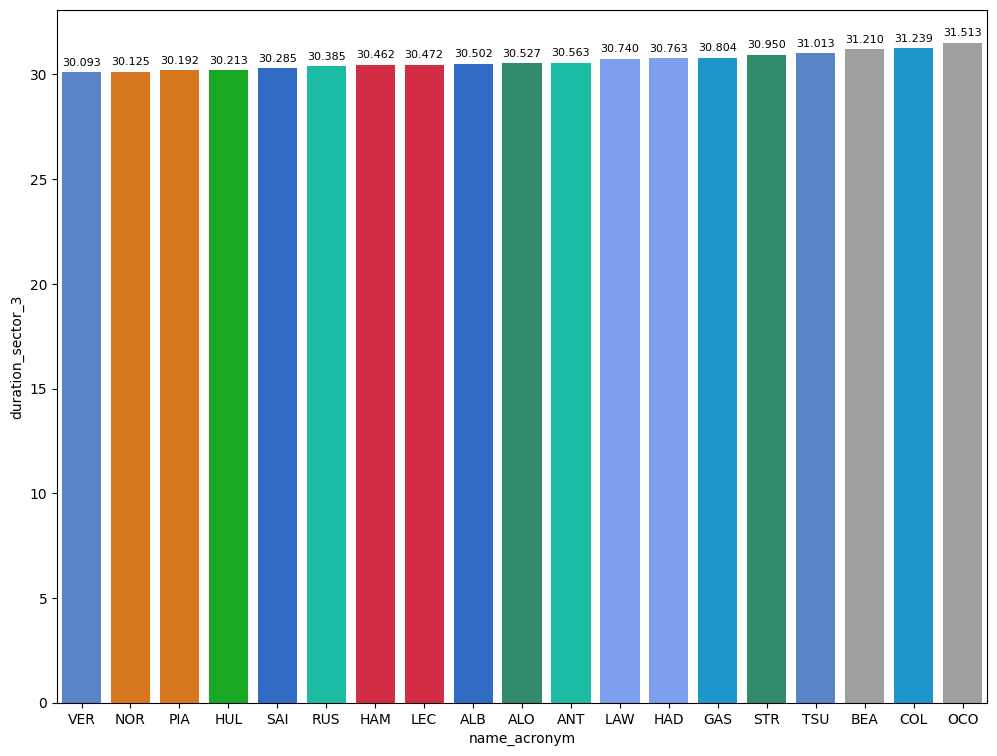

In [131]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9607)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9607)
drivers = libraryDataF1.obtain_information('drivers',session_key=9607)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice1],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice1,drivers,97,100)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Sprint

In [3]:
race = libraryDataF1.obtain_information('laps',session_key=9883)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9883)
drivers = libraryDataF1.obtain_information('drivers',session_key=9883)

HTTPError: HTTP Error 503: Service Unavailable

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

##### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

##### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

##### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 95").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 97
MAXIMUM_SECONDS = 101

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 12')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 6')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,6,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 31 or driver_number == 87')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 43')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 5 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9608)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9608)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9608)
drivers = libraryDataF1.obtain_information('drivers',session_key=9608)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 'Austin', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [95.950,94.913,95.112,93.974,94.002,94.005,93.260]
driver_number_lap_deleted = [10,16,24,22,31,10,11]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)

In this case, the fastest lap is 92.33 seconds (1.32.33= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 98.79 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 98.79")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-10-19T22:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-10-19T22:48:00+00:00' and date_start >'2024-10-19T22:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-10-19T22:48:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9617)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9617)
drivers = libraryDataF1.obtain_information('drivers',session_key=9617)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 97
MAXIMUM_SECONDS = 104

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9606)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration